# [RQ1]

In [45]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import scipy.stats as ss
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
import scipy.stats as ss
from scipy.stats import chi2_contingency
from scipy.stats import chi2

## Import the team data

In [88]:

team=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json")
pd.set_option('display.max_rows', 142)
pd.set_option('display.max_columns', 12)
#From index 98, the type is given as Nation. So we don't need that.
team.head()

city                      name  \
0                            Newcastle upon Tyne          Newcastle United   
1                                           Vigo             Celta de Vigo   
2                                      Barcelona                  Espanyol   
3                                Vitoria-Gasteiz     Deportivo Alav\u00e9s   
4                                       Valencia                   Levante   
5                                         Troyes                    Troyes   
6                                Getafe (Madrid)                    Getafe   
7                           M\u00f6nchengladbach       Borussia M'gladbach   
8                   Huddersfield, West Yorkshire         Huddersfield Town   
9                                         Bilbao             Athletic Club   
10                                        Madrid      Atl\u00e9tico Madrid   
11                                          Lyon        Olympique Lyonnais   
12                                         Paris                       PSG   
13                                      Valencia                  Valencia   
14                                        Madrid               Real Madrid   
15                                     Barcelona                 Barcelona   
16                    Las Palmas de Gran Canaria                Las Palmas   
17                                  Legan\u00e9s              Legan\u00e9s   
18                                       Ferrara                      SPAL   
19                                       Swansea              Swansea City   
20                                     Marseille       Olympique Marseille   
21                         La Chapelle-sur-Erdre                    Nantes   
22                                          Nice                      Nice   
23                                        Rennes                    Rennes   
24                                    Strasbourg                Strasbourg   
25                                         Eibar                     Eibar   
26                           Bournemouth, Dorset           AFC Bournemouth   
27                         Brighton, East Sussex    Brighton & Hove Albion   
28                                        Bremen             Werder Bremen   
29                                    Leverkusen          Bayer Leverkusen   
30                                      Dortmund         Borussia Dortmund   
31                                  M\u00fcnchen       Bayern M\u00fcnchen   
32                                     Stuttgart                 Stuttgart   
33                                 Gelsenkirchen                Schalke 04   
34                                        Milano                     Milan   
35                                        Angers                    Angers   
36                                        Torino                  Juventus   
37                                          Roma                      Roma   
38                                      Sassuolo                  Sassuolo   
39                           Burnley, Lancashire                   Burnley   
40                                    Le Haillan                  Bordeaux   
41                                      Hannover               Hannover 96   
42                                         Dijon                     Dijon   
43                                        Berlin                Hertha BSC   
44                                     Wolfsburg                 Wolfsburg   
45                                       Hamburg              Hamburger SV   
46                          Freiburg im Breisgau                  Freiburg   
47                                       Bologna                   Bologna   
48                                          Metz                      Metz   
49                                        Genova                 Sampdoria   
50                                        Verona                  

In [89]:
#convert the area from a series to a list
#Convert the list into a dataframe and concate the dataframe to the parent data i.e. team.
#Drop the column 'area'
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)
team=team[:98]
team.head()

city                      name   wyId  \
0            Newcastle upon Tyne          Newcastle United   1613   
1                           Vigo             Celta de Vigo    692   
2                      Barcelona                  Espanyol    691   
3                Vitoria-Gasteiz     Deportivo Alav\u00e9s    696   
4                       Valencia                   Levante    695   
5                         Troyes                    Troyes   3795   
6                Getafe (Madrid)                    Getafe    698   
7           M\u00f6nchengladbach       Borussia M'gladbach   2454   
8   Huddersfield, West Yorkshire         Huddersfield Town   1673   
9                         Bilbao             Athletic Club    678   
10                        Madrid      Atl\u00e9tico Madrid    679   
11                          Lyon        Olympique Lyonnais   3766   
12                         Paris                       PSG   3767   
13                      Valencia                  Valencia    674   
14                        Madrid               Real Madrid    675   
15                     Barcelona                 Barcelona    676   
16    Las Palmas de Gran Canaria                Las Palmas    714   
17                  Legan\u00e9s              Legan\u00e9s    712   
18                       Ferrara                      SPAL   3204   
19                       Swansea              Swansea City  10531   
20                     Marseille       Olympique Marseille   3771   
21         La Chapelle-sur-Erdre                    Nantes   3770   
22                          Nice                      Nice   3775   
23                        Rennes                    Rennes   3774   
24                    Strasbourg                Strasbourg   3779   
25                         Eibar                     Eibar    701   
26           Bournemouth, Dorset           AFC Bournemouth   1659   
27         Brighton, East Sussex    Brighton & Hove Albion   1651   
28                        Bremen             Werder Bremen   2443   
29                    Leverkusen          Bayer Leverkusen   2446   
30                      Dortmund         Borussia Dortmund   2447   
31                  M\u00fcnchen       Bayern M\u00fcnchen   2444   
32                     Stuttgart                 Stuttgart   2445   
33                 Gelsenkirchen                Schalke 04   2449   
34                        Milano                     Milan   3157   
35                        Angers                    Angers   3799   
36                        Torino                  Juventus   3159   
37                          Roma                      Roma   3158   
38                      Sassuolo                  Sassuolo   3315   
39           Burnley, Lancashire                   Burnley   1646   
40                    Le Haillan                  Bordeaux   3772   
41                      Hannover               Hannover 96   2455   
42                         Dijon                     Dijon   3804   
43                        Berlin                Hertha BSC   2457   
44                     Wolfsburg                 Wolfsburg   2451   
45                       Hamburg              Hamburger SV   2450   
46          Freiburg im Breisgau                  Freiburg   2453   
47                       Bologna                   Bologna   3166   
48                          Metz                      Metz   3777   
49                        Genova                 Sampdoria   3164   
50                        Verona                    Chievo   3165   
51                      Formello                     Lazio   3162   
52                         Udine                   Udinese   3163   
53                        Milano            Internazionale   3161   
54                     Leicester            Leicester City   1631   
55                        London           West Ham United   1633   
56                Stoke-on-Trent                Stoke City   1639   
57                     Ben

#### Note that column 2 and column 9 are both called 'name'

In [90]:
# changing column name: The column tht contains the country names is converted into "country"
t=list(team.columns)
t[5]='country'
t
team.columns=t
team.head()

city                      name   wyId  \
0            Newcastle upon Tyne          Newcastle United   1613   
1                           Vigo             Celta de Vigo    692   
2                      Barcelona                  Espanyol    691   
3                Vitoria-Gasteiz     Deportivo Alav\u00e9s    696   
4                       Valencia                   Levante    695   
5                         Troyes                    Troyes   3795   
6                Getafe (Madrid)                    Getafe    698   
7           M\u00f6nchengladbach       Borussia M'gladbach   2454   
8   Huddersfield, West Yorkshire         Huddersfield Town   1673   
9                         Bilbao             Athletic Club    678   
10                        Madrid      Atl\u00e9tico Madrid    679   
11                          Lyon        Olympique Lyonnais   3766   
12                         Paris                       PSG   3767   
13                      Valencia                  Valencia    674   
14                        Madrid               Real Madrid    675   
15                     Barcelona                 Barcelona    676   
16    Las Palmas de Gran Canaria                Las Palmas    714   
17                  Legan\u00e9s              Legan\u00e9s    712   
18                       Ferrara                      SPAL   3204   
19                       Swansea              Swansea City  10531   
20                     Marseille       Olympique Marseille   3771   
21         La Chapelle-sur-Erdre                    Nantes   3770   
22                          Nice                      Nice   3775   
23                        Rennes                    Rennes   3774   
24                    Strasbourg                Strasbourg   3779   
25                         Eibar                     Eibar    701   
26           Bournemouth, Dorset           AFC Bournemouth   1659   
27         Brighton, East Sussex    Brighton & Hove Albion   1651   
28                        Bremen             Werder Bremen   2443   
29                    Leverkusen          Bayer Leverkusen   2446   
30                      Dortmund         Borussia Dortmund   2447   
31                  M\u00fcnchen       Bayern M\u00fcnchen   2444   
32                     Stuttgart                 Stuttgart   2445   
33                 Gelsenkirchen                Schalke 04   2449   
34                        Milano                     Milan   3157   
35                        Angers                    Angers   3799   
36                        Torino                  Juventus   3159   
37                          Roma                      Roma   3158   
38                      Sassuolo                  Sassuolo   3315   
39           Burnley, Lancashire                   Burnley   1646   
40                    Le Haillan                  Bordeaux   3772   
41                      Hannover               Hannover 96   2455   
42                         Dijon                     Dijon   3804   
43                        Berlin                Hertha BSC   2457   
44                     Wolfsburg                 Wolfsburg   2451   
45                       Hamburg              Hamburger SV   2450   
46          Freiburg im Breisgau                  Freiburg   2453   
47                       Bologna                   Bologna   3166   
48                          Metz                      Metz   3777   
49                        Genova                 Sampdoria   3164   
50                        Verona                    Chievo   3165   
51                      Formello                     Lazio   3162   
52                         Udine                   Udinese   3163   
53                        Milano            Internazionale   3161   
54                     Leicester            Leicester City   1631   
55                        London           West Ham United   1633   
56                Stoke-on-Trent                Stoke City   1639   
57                     Ben

#### Adding necessary filters

In [91]:
#As this is premier league, we need information solely based on England.
team=team[(team['alpha3code']=='XEN')&(team['type']=='club')|(team['name']=='Swansea City')]
team.head()

city                    name   wyId  \
0            Newcastle upon Tyne        Newcastle United   1613   
8   Huddersfield, West Yorkshire       Huddersfield Town   1673   
19                       Swansea            Swansea City  10531   
26           Bournemouth, Dorset         AFC Bournemouth   1659   
27         Brighton, East Sussex  Brighton & Hove Albion   1651   
39           Burnley, Lancashire                 Burnley   1646   
54                     Leicester          Leicester City   1631   
55                        London         West Ham United   1633   
56                Stoke-on-Trent              Stoke City   1639   
60                       Watford                 Watford   1644   
65                     Liverpool                 Everton   1623   
66                 West Bromwich    West Bromwich Albion   1627   
67                    Manchester         Manchester City   1625   
68                        London       Tottenham Hotspur   1624   
70                        London          Crystal Palace   1628   
75        Southampton, Hampshire             Southampton   1619   
77                     Liverpool               Liverpool   1612   
78                        London                 Chelsea   1610   
79                    Manchester       Manchester United   1611   
84                        London                 Arsenal   1609   

                 officialName  type  country id alpha3code alpha2code  
0         Newcastle United FC  club  England  0        XEN             
8        Huddersfield Town FC  club  England  0        XEN             
19           Swansea City AFC  club    Wales  0        XWA             
26            AFC Bournemouth  club  England  0        XEN             
27  Brighton & Hove Albion FC  club  England  0        XEN             
39                 Burnley FC  club  England  0        XEN             
54          Leicester City FC  club  England  0        XEN             
55         West Ham United FC  club  England  0        XEN             
56              Stoke City FC  club  England  0        XEN             
60                 Watford FC  club  England  0        XEN             
65                 Everton FC  club  England  0        XEN             
66    West Bromwich Albion FC  club  England  0        XEN             
67         Manchester City FC  club  England  0        XEN             
68       Tottenham Hotspur FC  club  England  0        XEN             
70          Crystal Palace FC  club  England  0        XEN             
75             Southampton FC  club  England  0        XEN             
77               Liverpool FC  club  England  0        XEN             
78                 Chelsea FC  club  England  0        XEN             
79       Manchester United FC  club  England  0        XEN             
84                 Arsenal FC  club  England  0        XEN

#### Note that the index is not increasing by 1, instead it is 0, 8, 26 ...

#### This can be problematic in case this dataframe is merged/joined/concatinated to some other dataframe as these functions work on the basis of indices

In [92]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team=team.reset_index(drop=True)
team

city                    name   wyId  \
0            Newcastle upon Tyne        Newcastle United   1613   
1   Huddersfield, West Yorkshire       Huddersfield Town   1673   
2                        Swansea            Swansea City  10531   
3            Bournemouth, Dorset         AFC Bournemouth   1659   
4          Brighton, East Sussex  Brighton & Hove Albion   1651   
5            Burnley, Lancashire                 Burnley   1646   
6                      Leicester          Leicester City   1631   
7                         London         West Ham United   1633   
8                 Stoke-on-Trent              Stoke City   1639   
9                        Watford                 Watford   1644   
10                     Liverpool                 Everton   1623   
11                 West Bromwich    West Bromwich Albion   1627   
12                    Manchester         Manchester City   1625   
13                        London       Tottenham Hotspur   1624   
14                        London          Crystal Palace   1628   
15        Southampton, Hampshire             Southampton   1619   
16                     Liverpool               Liverpool   1612   
17                        London                 Chelsea   1610   
18                    Manchester       Manchester United   1611   
19                        London                 Arsenal   1609   

                 officialName  type  country id alpha3code alpha2code  
0         Newcastle United FC  club  England  0        XEN             
1        Huddersfield Town FC  club  England  0        XEN             
2            Swansea City AFC  club    Wales  0        XWA             
3             AFC Bournemouth  club  England  0        XEN             
4   Brighton & Hove Albion FC  club  England  0        XEN             
5                  Burnley FC  club  England  0        XEN             
6           Leicester City FC  club  England  0        XEN             
7          West Ham United FC  club  England  0        XEN             
8               Stoke City FC  club  England  0        XEN             
9                  Watford FC  club  England  0        XEN             
10                 Everton FC  club  England  0        XEN             
11    West Bromwich Albion FC  club  England  0        XEN             
12         Manchester City FC  club  England  0        XEN             
13       Tottenham Hotspur FC  club  England  0        XEN             
14          Crystal Palace FC  club  England  0        XEN             
15             Southampton FC  club  England  0        XEN             
16               Liverpool FC  club  England  0        XEN             
17                 Chelsea FC  club  England  0        XEN             
18       Manchester United FC  club  England  0        XEN             
19                 Arsenal FC  club  England  0        XEN

##  Import the matches data

In [93]:
matches= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_England.json')
pd.set_option('display.max_columns', 14)
matches.head()

status  roundId  gameweek  \
0    Played  4405654        38   
1    Played  4405654        38   
2    Played  4405654        38   
3    Played  4405654        38   
4    Played  4405654        38   
..      ...      ...       ...   
375  Played  4405654         1   
376  Played  4405654         1   
377  Played  4405654         1   
378  Played  4405654         1   
379  Played  4405654         1   

                                             teamsData  seasonId  \
0    {'1646': {'scoreET': 0, 'coachId': 8880, 'side...    181150   
1    {'1628': {'scoreET': 0, 'coachId': 8357, 'side...    181150   
2    {'1609': {'scoreET': 0, 'coachId': 7845, 'side...    181150   
3    {'1651': {'scoreET': 0, 'coachId': 8093, 'side...    181150   
4    {'1644': {'scoreET': 0, 'coachId': 93112, 'sid...    181150   
..                                                 ...       ...   
375  {'1623': {'scoreET': 0, 'coachId': 268779, 'si...    181150   
376  {'10531': {'scoreET': 0, 'coachId': 381291, 's...    181150   
377  {'1659': {'scoreET': 0, 'coachId': 8934, 'side...    181150   
378  {'1644': {'scoreET': 0, 'coachId': 71037, 'sid...    181150   
379  {'1609': {'scoreET': 0, 'coachId': 7845, 'side...    181150   

                 dateutc  winner                     venue     wyId  \
0    2018-05-13 14:00:00    1659                 Turf Moor  2500089   
1    2018-05-13 14:00:00    1628             Selhurst Park  2500090   
2    2018-05-13 14:00:00    1609  The John Smith's Stadium  2500091   
3    2018-05-13 14:00:00    1612                   Anfield  2500092   
4    2018-05-13 14:00:00    1611              Old Trafford  2500093   
..                   ...     ...                       ...      ...   
375  2017-08-12 14:00:00    1623             Goodison Park  2499723   
376  2017-08-12 14:00:00       0        St. Mary's Stadium  2499726   
377  2017-08-12 14:00:00    1627             The Hawthorns  2499728   
378  2017-08-12 11:30:00       0     Vicarage Road Stadium  2499727   
379  2017-08-11 18:45:00    1609          Emirates Stadium  2499719   

                                             label  \
0                 Burnley - AFC Bournemouth, 1 - 2   
1     Crystal Palace - West Bromwich Albion, 2 - 0   
2               Huddersfield Town - Arsenal, 0 - 1   
3        Liverpool - Brighton & Hove Albion, 4 - 0   
4               Manchester United - Watford, 1 - 0   
..                                             ...   
375                    Everton - Stoke City, 1 - 0   
376              Southampton - Swansea City, 0 - 0   
377  West Bromwich Albion - AFC Bournemouth, 1 - 0   
378                     Watford - Liverpool, 3 - 3   
379                Arsenal - Leicester City, 4 - 3   

                                    date  \
0       May 13, 2018 at 4:00:00 PM GMT+2   
1       May 13, 2018 at 4:00:00 PM GMT+2   
2       May 13, 2018 at 4:00:00 PM GMT+2   
3       May 13, 2018 at 4:00:00 PM GMT+2   
4       May 13, 2018 at 4:00:00 PM GMT+2   
..                                   ...   
375  August 12, 2017 at 4:00:00 PM GMT+2   
376  August 12, 2017 at 4:00:00 PM GMT+2   
377  August 12, 2017 at 4:00:00 PM GMT+2   
378  August 12, 2017 at 1:30:00 PM GMT+2   
379  August 11, 2017 at 8:45:00 PM GMT+2   

                                              referees duration  competitionId  
0    [{'refereeId': 385705, 'role': 'referee'}, {'r...  Regular            364  
1    [{'refereeId': 381851, 'role': 'referee'}, {'r...  Regular            364  
2    [{'refereeId': 384965, 'role': 'referee'}, {'r...  Regular            364  
3    [{'refereeId': 385704, 'role': 'referee'}, {'r...  Regular            364  
4    [{'refereeId': 381853, 'role': 'referee'}, {'r...  Regular            364  
..                                                 ...      ...            ...  
375  [{'refereeId': 385915, 'role': 'referee'}, {'r...  Regular            364  
376  [{'refereeId': 385916, 'role': 'referee'}, {'r...  Regular            364  
377  [{'refereeId':

#### ${\bullet}$ Split the columns 'label' to extract the information of the teams and scores of the match

In [94]:
results = matches.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results
# results.columns = ['result_home','result_away']
results = pd.concat([matches['gameweek'],results,matches.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results

gameweek goal_home goal_away             team_home  \
0          38         1         2               Burnley   
1          38         2         0        Crystal Palace   
2          38         0         1     Huddersfield Town   
3          38         4         0             Liverpool   
4          38         1         0     Manchester United   
..        ...       ...       ...                   ...   
375         1         1         0               Everton   
376         1         0         0           Southampton   
377         1         1         0  West Bromwich Albion   
378         1         3         3               Watford   
379         1         4         3               Arsenal   

                  team_away  
0           AFC Bournemouth  
1      West Bromwich Albion  
2                   Arsenal  
3    Brighton & Hove Albion  
4                   Watford  
..                      ...  
375              Stoke City  
376            Swansea City  
377         AFC Bournemouth  
378               Liverpool  
379          Leicester City  

[380 rows x 5 columns]

#### ${\bullet}$ Generating the points table for the entire league

In [95]:
results['points_home'] = 0
results['points_away'] = 0
for i in range(results.shape[0]):
    if results.loc[i,'goal_home']>results.loc[i,'goal_away']:
        results.loc[i,'points_home']=3
    elif results.loc[i,'goal_home']<results.loc[i,'goal_away']:
        results.loc[i,'points_away']=3
    else:
        results.loc[i,'points_home']=1
        results.loc[i,'points_away']=1

In [96]:
home = results[['gameweek','team_home','points_home']]
away = results[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table

gameweek                    team  points
0           1         AFC Bournemouth       0
1           1                 Arsenal       3
2           1  Brighton & Hove Albion       0
3           1                 Burnley       3
4           1                 Chelsea       0
..        ...                     ...     ...
755        38            Swansea City       0
756        38       Tottenham Hotspur       3
757        38                 Watford       0
758        38    West Bromwich Albion       0
759        38         West Ham United       3

[760 rows x 3 columns]

####  ${\bullet}$re-arranging the points table as a matrix containing the information of points of all teams over the weeks  

In [97]:
team_list = list(points_table.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table.loc[(points_table['gameweek']==week)&(points_table['team']==team),'points'])
table=points_byweek
table=table.sort_values(by=(38),ascending=False)
table=table.T
pd.set_option('display.max_columns', 20)
table.tail()

Manchester City  Manchester United  Tottenham Hotspur  Liverpool  Chelsea  \
0                 0                  0                  0          0        0   
1                 3                  3                  3          1        0   
2                 4                  6                  3          4        3   
3                 7                  9                  4          7        6   
4                10                 10                  7          7        9   
5                13                 13                  8          8       10   
6                16                 16                 11         11       13   
7                19                 19                 14         12       13   
8                22                 20                 17         13       13   
9                25                 20                 20         13       16   
10               28                 23                 20         16       19   
11               31                 23                 23         19       22   
12               34                 26                 23         22       25   
13               37                 29                 24         23       26   
14               40                 32                 24         26       29   
15               43                 35                 25         29       32   
16               46                 35                 28         30       32   
17               49                 38                 31         31       35   
18               52                 41                 31         34       38   
19               55                 42                 34         35       39   
20               58                 43                 37         38       42   
21               59                 44                 38         41       45   
22               62                 47                 41         44       46   
23               62                 50                 44         47       47   
24               65                 53                 45         47       50   
25               68                 53                 48         50       50   
26               69                 56                 49         51       50   
27               72                 56                 52         54       53   
28               75                 59                 55         57       53   
29               78                 62                 58         60       53   
30               81                 65                 61         60       56   
31               84                 66                 64         63       59   
32               87                 69                 67         66       59   
33               87                 72                 70         67       60   
34               90                 72                 70         70       63   
35               93                 75                 71         71       64   
36               96                 78                 74         72       67   
37               97                 78                 74         72       70   
38              100                 81                 77         75       70   

    Arsenal  Burnley  Everton  Leicester City  Newcastle United  \
0         0        0        0               0                 0   
1         3        3        3               0                 0   
2         3        3        4               3                 0   
3         3        4        4               3                 3   
4         6        7        4               3                 6   
5         7        8        4               4                 9   
6        10        9        7               4                 9   
7        13       12        7               5                10   
8        13       13        8               6                11   
9        16       13        8               9                14   
10       19       16      

# Reserach Question: Who wants to be a Champion?

####  ${\bullet}$Plotting the above table to observe the trend

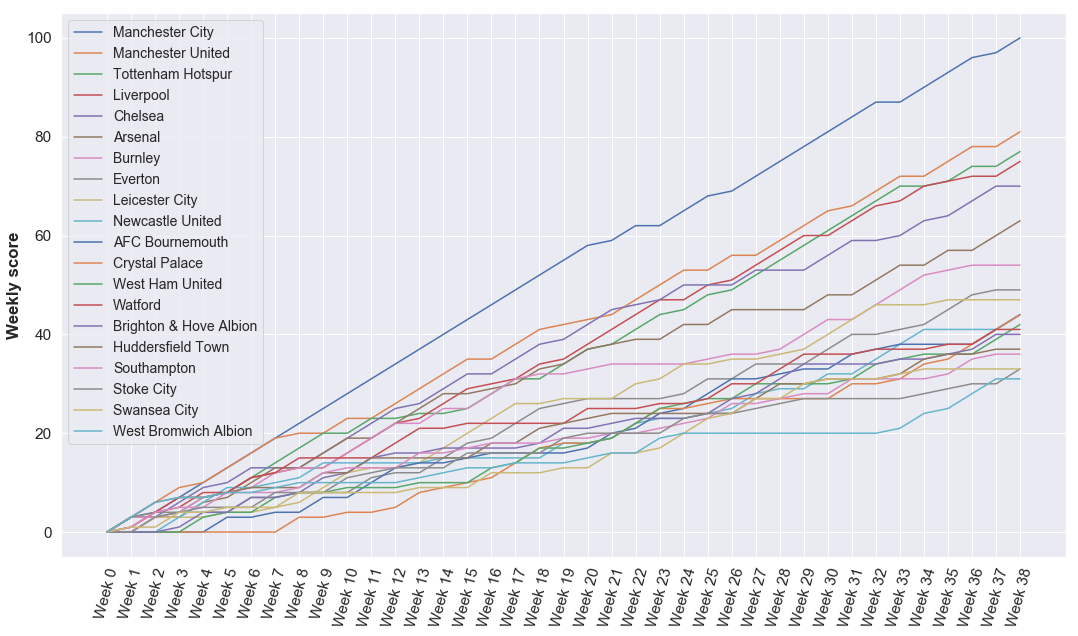

In [104]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

#### Finding the longest winning and losing streak:

##### Finding the longest winning streak:

##### To calculate the longest winning streak, we use the data set 'Points_table' to obtain the longest winning streak. The 'points_table' dataset has been declared previously in this analysis. If you see the dataset, the column gameweek is defined weekly, i.e. it shows the entire outcomes of the first week and move to the second week and so on. Here we just reconstruct the data and represent it team wise.

In [105]:
rest={}
for i in points_table.team.unique():
    t = list(points_table.where(points_table.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max
    


In [106]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

teams  winning_streak
10         Manchester City              18
16       Tottenham Hotspur               7
4                  Chelsea               4
8           Leicester City               4
9                Liverpool               4
11       Manchester United               4
12        Newcastle United               3
3                  Burnley               3
1                  Arsenal               3
18    West Bromwich Albion               2
17                 Watford               2
15            Swansea City               2
0          AFC Bournemouth               2
7        Huddersfield Town               2
6                  Everton               2
5           Crystal Palace               2
2   Brighton & Hove Albion               2
19         West Ham United               2
13             Southampton               1
14              Stoke City               1

##### Finding the longest losing streak:

##### To calculate the longest losing streak, we use the data set 'Points_table' to obtain the longest winning streak. The 'points_table' dataset has been declared previously in this analysis. If you see the dataset, the column gameweek is defined weekly, i.e. it shows the entire outcomes of the first week and move to the second week and so on. Here we just reconstruct the data and represent it team wise.

In [107]:
result={}
for i in points_table.team.unique():
    t = list(points_table.where(points_table.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [108]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

teams  losing_streak
18    West Bromwich Albion              8
5           Crystal Palace              7
7        Huddersfield Town              5
0          AFC Bournemouth              4
17                 Watford              4
15            Swansea City              4
14              Stoke City              4
12        Newcastle United              4
1                  Arsenal              3
13             Southampton              3
19         West Ham United              3
6                  Everton              3
3                  Burnley              3
2   Brighton & Hove Albion              3
8           Leicester City              2
4                  Chelsea              2
11       Manchester United              1
9                Liverpool              1
16       Tottenham Hotspur              1
10         Manchester City              1

### From the data and the plot we can see that the team which has the longest winning streak is Manchester city. Manchester city made a winning chain of 18 matches. On the other hand, the  team with highest losing streak is West Bromwich Albion.

# RQ 2

### We want to verify the common belief that playing home or away influences the result of a match for a team.

In [24]:
team=pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\teams.json")
team=team[:98]
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)
#Changing the officialName column's encoding, so that names are displayed correctly
a = []
for i in range(len(team.officialName)):
    a.append(team.officialName[i].encode('ascii').decode('unicode escape'))
team.officialName = a
team = team.drop(['city','name', 'type', 'alpha2code', 'alpha3code'], axis = 1)
team.head()

officialName  wyId   id
0           Newcastle United FC  1613    0
1       Real Club Celta de Vigo   692  724
2  Reial Club Deportiu Espanyol   691  724
3              Deportivo Alavés   696  724
4                    Levante UD   695  724

In [17]:
Matches = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\matches\matches_England.json")

Premier League Teams can be retrieved from the teams dataset with the value 'id' = 0

In [27]:
PLteams = pd.DataFrame(team[team.id == '0'])
teams = pd.DataFrame({'Name' : list(PLteams.officialName), 'ID' : list(PLteams['wyId'])})
team_data = Matches.teamsData
teams.head()

Name     ID
0        Newcastle United FC   1613
1       Huddersfield Town FC   1673
2           Swansea City AFC  10531
3            AFC Bournemouth   1659
4  Brighton & Hove Albion FC   1651

#### I've chosen to take the two top ranking teams, Manchester City and Manchester Utd., two mid-ranking, Newcastle Utd. and Leicester City and the bottom ranking team of the season, West Bromwich.

In [6]:
team5 = ['1625', '1611', '1613', '1631', '1627']
print(*[teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5], sep = '\n')

Manchester City FC
Manchester United FC
Newcastle United FC
Leicester City FC
West Bromwich Albion FC


In [7]:
# Defining a function to display the contingeny tables on the same line with html format
from IPython.display import display_html
def mydisplay(dfs, names=[]):
    html_str = ''
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center"><strong><em>{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:center"> {df.to_html(index=True)}</td>' 
                         for df in dfs) +
                 '</tr>') 
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)
    

frames = []
for t in team5:   
    a = []
    
    for i in range(len(Matches)):
         if t in list(Matches['teamsData'][i].keys()) :
                
            if str(Matches.winner[i]) == t:
                a.append([team_data[i][t]['side'], 'win'])
                
            elif str(Matches.winner[i]) == '0':
                a.append([team_data[i][t]['side'], 'draw'])
                
            else:
                a.append([team_data[i][t]['side'], 'lose'])
                
    frame = pd.DataFrame(a, columns = ['side', 'result']) 
    
    frames.append(pd.crosstab(frame.side, frame.result))
    
mydisplay(frames, names= [teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5])

Manchester City FC Manchester United FC Newcastle United FC Leicester City FC West Bromwich Albion FC 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 2 
 1 
 16 
 
 
 home 
 2 
 1 
 16 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 5 
 10 
 
 
 home 
 2 
 2 
 15 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 11 
 4 
 
 
 home 
 4 
 7 
 8 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 5 
 9 
 5 
 
 
 home 
 6 
 6 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 12 
 3 
 
 
 home 
 9 
 7 
 3

In [8]:
frames = []
Total = []
for t in team5:   
    a = []
    othteam = set(team5)
    othteam.remove(t)
    for i in range(len(Matches)):
         if t in list(Matches['teamsData'][i].keys()) and len(othteam.intersection(set(Matches['teamsData'][i].keys()))) == 0:
            if str(Matches.winner[i]) == t:
                a.append([team_data[i][t]['side'], 'win'])
                Total.append([team_data[i][t]['side'], 'win'])
            elif str(Matches.winner[i]) == '0':
                a.append([team_data[i][t]['side'], 'draw'])
                Total.append([team_data[i][t]['side'], 'draw'])
            else:
                a.append([team_data[i][t]['side'], 'lose'])
                Total.append([team_data[i][t]['side'], 'lose'])
    
    frame = pd.DataFrame(a, columns = ['side', 'result']) 
    frames.append(pd.crosstab(frame.side, frame.result))
mydisplay(frames, names= [teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5])


Manchester City FC Manchester United FC Newcastle United FC Leicester City FC West Bromwich Albion FC 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 2 
 1 
 12 
 
 
 home 
 2 
 0 
 13 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 4 
 8 
 
 
 home 
 2 
 0 
 13 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 9 
 3 
 
 
 home 
 4 
 4 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 5 
 7 
 3 
 
 
 home 
 4 
 4 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 11 
 1 
 
 
 home 
 8 
 4 
 3

In [9]:
Tot = pd.DataFrame(Total, columns=['side', 'result'])
cont_tab = pd.crosstab(Tot.side, Tot.result, margins= True)
cont_tab

result  draw  lose  win  All
side                        
away      16    32   27   75
home      20    12   43   75
All       36    44   70  150

## Chi-Squared Test

### A chi-squared test with significance level $\alpha = 0.05$ will now be performed on the contingency table $Side$ x $Result$

#### H0 : The null Hypothesis is that there's no statistically significant relationship between the side on which a team plays and the result of the match

#### H1: The alternative hypotesis is that there's significant relationship between the side of a team and its result in a match

Appending all observed frequencies to a single vector

In [10]:
f_obs = np.append(cont_tab.iloc[0][0:3].values, cont_tab.iloc[1][0:3].values)
f_obs

array([16, 32, 27, 20, 12, 43], dtype=int64)

Getting the marginal frequencies for rows (Side)

In [11]:
row_sums = cont_tab.iloc[0:2,3].values
row_sums

array([75, 75], dtype=int64)

Marginal frequencies for columns (Result)

In [12]:
col_sums = cont_tab.iloc[2,0:3].values
col_sums

array([36, 44, 70], dtype=int64)

Expected frequencies under Indipendence Hypothesis

In [13]:
total = cont_tab.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

[18.0, 22.0, 35.0, 18.0, 22.0, 35.0]

$\chi^2$ statistic

In [14]:
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

Chi-squared Statistic: 13.192496392496395


In [15]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof))

Degrees of Freedom: 2


In [16]:

percentile = ss.chi2.ppf(0.95, 2)
print('Chi-squared Statistic: {}'.format(round(chi_squared_statistic, 2)),
      '\n95th Percentile of Chi-squared distribution: {}'.format(round(percentile, 2)))

Chi-squared Statistic: 13.19 
95th Percentile of Chi-squared distribution: 5.99


#### Since the Chi-squared statistic obtained from our calculation is bigger than the 95th percentile of the $\chi^2_2$, we can conlude that the null hypotesis must be rejected. There is a relationship between the side on which a team plays and its result in a match, and we can infer, by looking at the following barplot, that playing home influences positively a team's chances of winning a match (likewise, playing away increases chances of losing).

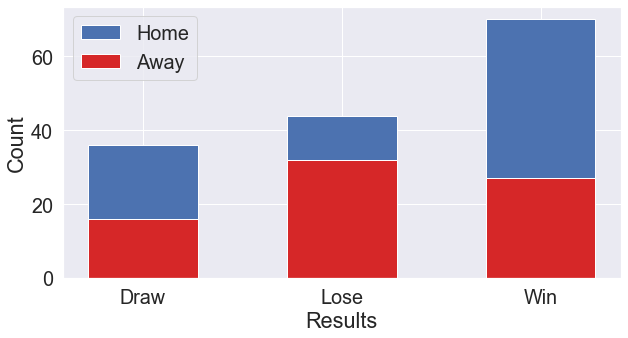

In [17]:

#Assigns the frequency values
awaycount = cont_tab.iloc[0][0:3].values
homecount = cont_tab.iloc[1][0:3].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
results = ["Draw","Lose","Win"]
p1 = plt.bar(results, awaycount, 0.55, color='#d62728')
p2 = plt.bar(results, homecount, 0.55, bottom=awaycount)
plt.legend((p2[0], p1[0]), ('Home','Away'))
plt.xlabel('Results')
plt.ylabel('Count')
plt.show()

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import scipy.stats as ss
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [15]:
#Import the data: Teams
team=pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\teams.json")
pd.set_option('display.max_rows', 142)
pd.set_option('display.max_columns', 12)
#From index 98, the type is given as Nation. So we don't need that.
team=team[:98]
#convert the area from a series to a list
#Convert the list into a dataframe and concatenate the dataframe to the parent data i.e. team.
#Drop the column 'area'
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)
#Changing the officialName column's encoding, so that names are displayed correctly
a = []
for i in range(len(team.officialName)):
    a.append(team.officialName[i].encode('ascii').decode('unicode escape'))
team.officialName = a
team = team.drop(['city','name', 'type', 'alpha2code', 'alpha3code'], axis = 1)
team.head()

officialName  wyId   id
0           Newcastle United FC  1613    0
1       Real Club Celta de Vigo   692  724
2  Reial Club Deportiu Espanyol   691  724
3              Deportivo Alavés   696  724
4                    Levante UD   695  724

# RQ 2 - Bonus 

### Validation of the $Side*Result$ dependency found for Premier League teams with two other countries' leagues.

We want to evaluate the genrality of the dependecy between the side and the result of a match. We will try to demonstrate that the "home/away" rule is still valid over other leagues (or maybe it isn't), by executing the same type of analysis, i.e. taking 5 teams in the same way we have chosen the ones from Premier League, and elaborating a $\chi^2$ test of independence over the contingenty tables $Side$ x $Result$. 

In [11]:
eng_matches = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\matches\matches_England.json")
ita_matches = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\matches\matches_Italy.json")
spa_matches = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\matches\matches_Spain.json")

Premier League Teams can be retrieved from the dataframe team with the value 'id' = 0, Serie A teams with the 'id' = 380 and Liga teams wtih 'id' = 724. 

In [22]:
PLteams = pd.DataFrame(team[team.id == '0'])
pl_teams = pd.DataFrame({'Name' : list(PLteams.officialName), 'ID' : list(PLteams['wyId'])})
pl_team_data = eng_matches.teamsData

Ligateams = pd.DataFrame(team[team.id == '724'])
liga_teams = pd.DataFrame({'Name' : list(Ligateams.officialName), 'ID' : list(Ligateams['wyId'])})
liga_team_data = spa_matches.teamsData

Ateams = pd.DataFrame(team[team.id == '380'])
a_teams = pd.DataFrame({'Name' : list(Ateams.officialName), 'ID' : list(Ateams['wyId'])})
a_team_data = ita_matches.teamsData

#### I've chosen to take the two top ranking teams, Manchester City and Manchester Utd., two mid-ranking, Newcastle Utd. and Leicester City and the bottom ranking team of the season, West Bromwich.

In [24]:
pl_team5 = ['1625', '1611', '1613', '1631', '1627']
print(*[pl_teams[pl_teams['ID'] == int(t)].Name.iloc[0] for t in pl_team5], sep = '\n')

Manchester City FC
Manchester United FC
Newcastle United FC
Leicester City FC
West Bromwich Albion FC


#### Following the same pattern for Serie A, we take the first two teams, Juventus and Napoli, two mid-ranking teams, Sampdoria and Sassuolo, and the bottom ranking team, Benevento.

In [26]:
a_team5 = ['3159', '3187', '3164', '3315', '3219']
print(*[a_teams[a_teams['ID'] == int(t)].Name.iloc[0] for t in a_team5], sep = '\n')

Juventus FC
SSC Napoli
UC Sampdoria
US Sassuolo Calcio
Benevento Calcio


#### Same for La Liga

In [28]:
liga_team5 = ['676', '679', '756', '691', '683']
print(*[liga_teams[liga_teams['ID'] == int(t)].Name.iloc[0] for t in liga_team5], sep = '\n')

FC Barcelona
Club Atlético de Madrid
Girona FC
Reial Club Deportiu Espanyol
Málaga Club de Fútbol


In [29]:
# Defining a function to display the contingeny tables on the same line with html format
from IPython.display import display_html
def mydisplay(dfs, names=[]):
    html_str = ''
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center"><strong><em>{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:center"> {df.to_html(index=True)}</td>' 
                         for df in dfs) +
                 '</tr>') 
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)

For each team in the 5 teams we have chosen, we gather data about results and side, and represent them in contingency tables. The matchess between a team and the other teams of the five we have chosen will be dropped, because they would influence the chi-squared test of independence (since the result and side of one team is certainly dependent with the result and side of the opponent). This will be repeated for the other two leagues in the exact same way.

In [38]:
team5 = pl_team5
Matches = eng_matches
teams =  pl_teams
team_data = pl_team_data
frames = []
Total = []
for t in team5:   
    a = []
    othteam = set(team5)
    othteam.remove(t)
    for i in range(len(Matches)):
         if t in list(Matches['teamsData'][i].keys()) and len(othteam.intersection(set(Matches['teamsData'][i].keys()))) == 0:
            if str(Matches.winner[i]) == t:
                a.append([team_data[i][t]['side'], 'win'])
                Total.append([team_data[i][t]['side'], 'win'])
            elif str(Matches.winner[i]) == '0':
                a.append([team_data[i][t]['side'], 'draw'])
                Total.append([team_data[i][t]['side'], 'draw'])
            else:
                a.append([team_data[i][t]['side'], 'lose'])
                Total.append([team_data[i][t]['side'], 'lose'])
    
    frame = pd.DataFrame(a, columns = ['side', 'result']) 
    frames.append(pd.crosstab(frame.side, frame.result))
mydisplay(frames, names= [teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5])
pl_tot = Total

Manchester City FC Manchester United FC Newcastle United FC Leicester City FC West Bromwich Albion FC 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 2 
 1 
 12 
 
 
 home 
 2 
 0 
 13 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 4 
 8 
 
 
 home 
 2 
 0 
 13 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 9 
 3 
 
 
 home 
 4 
 4 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 5 
 7 
 3 
 
 
 home 
 4 
 4 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 11 
 1 
 
 
 home 
 8 
 4 
 3

In [39]:
team5 = liga_team5
Matches = spa_matches
teams =  liga_teams
team_data = liga_team_data
frames = []
Total = []
for t in team5:   
    a = []
    othteam = set(team5)
    othteam.remove(t)
    for i in range(len(Matches)):
         if t in list(Matches['teamsData'][i].keys()) and len(othteam.intersection(set(Matches['teamsData'][i].keys()))) == 0:
            if str(Matches.winner[i]) == t:
                a.append([team_data[i][t]['side'], 'win'])
                Total.append([team_data[i][t]['side'], 'win'])
            elif str(Matches.winner[i]) == '0':
                a.append([team_data[i][t]['side'], 'draw'])
                Total.append([team_data[i][t]['side'], 'draw'])
            else:
                a.append([team_data[i][t]['side'], 'lose'])
                Total.append([team_data[i][t]['side'], 'lose'])
    
    frame = pd.DataFrame(a, columns = ['side', 'result']) 
    frames.append(pd.crosstab(frame.side, frame.result))
mydisplay(frames, names= [teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5])
liga_tot = Total

FC Barcelona Club Atlético de Madrid Girona FC Reial Club Deportiu Espanyol Málaga Club de Fútbol 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 1 
 10 
 
 
 home 
 3 
 0 
 12 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 2 
 10 
 
 
 home 
 4 
 0 
 11 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 6 
 5 
 
 
 home 
 2 
 6 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 8 
 6 
 1 
 
 
 home 
 5 
 4 
 6 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 2 
 12 
 1 
 
 
 home 
 2 
 9 
 4

In [40]:
team5 = a_team5
Matches = ita_matches
teams =  a_teams
team_data = a_team_data
frames = []
Total = []
for t in team5:   
    a = []
    othteam = set(team5)
    othteam.remove(t)
    for i in range(len(Matches)):
         if t in list(Matches['teamsData'][i].keys()) and len(othteam.intersection(set(Matches['teamsData'][i].keys()))) == 0:
            if str(Matches.winner[i]) == t:
                a.append([team_data[i][t]['side'], 'win'])
                Total.append([team_data[i][t]['side'], 'win'])
            elif str(Matches.winner[i]) == '0':
                a.append([team_data[i][t]['side'], 'draw'])
                Total.append([team_data[i][t]['side'], 'draw'])
            else:
                a.append([team_data[i][t]['side'], 'lose'])
                Total.append([team_data[i][t]['side'], 'lose'])
    
    frame = pd.DataFrame(a, columns = ['side', 'result']) 
    frames.append(pd.crosstab(frame.side, frame.result))
mydisplay(frames, names= [teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5])
a_tot = Total

Juventus FC SSC Napoli UC Sampdoria US Sassuolo Calcio Benevento Calcio 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 0 
 11 
 
 
 home 
 1 
 1 
 13 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 1 
 11 
 
 
 home 
 3 
 1 
 11 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 8 
 4 
 
 
 home 
 3 
 2 
 10 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 7 
 5 
 
 
 home 
 5 
 7 
 3 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 0 
 14 
 1 
 
 
 home 
 2 
 9 
 4

In this contingency tables showed for each league, there can be already sensed some kind of relationship between the side and results of a team, although in Serie A this relationship looks a bit weak. In fact, Juve and Napoli had basically same results while playing home or away, and Sassuolo had even better results when playing away than playing home. Only Sampdoria and Benevento's results look influenced by the side. Since the purpose of this analysis is to verify if the "home/away" rule that was valid in Premier League is valid as a general rule, we should get this first outlook as an hint that Serie A is a very different league from Premier league (in fact, every league is different), so the same rule might not apply. We will test this suspicion through a repetition and a final comparison of the Chi-squared test for each league, and to do so we must build the total contingency tables for each country's first division.

In [71]:
tables = []
for Total in [pl_tot, liga_tot, a_tot]:
    Tot = pd.DataFrame(Total, columns=['side', 'result'])
    cont_tab = pd.crosstab(Tot.side, Tot.result, margins= False)
    tables.append(cont_tab)
mydisplay(tables, names= ['Premier League', 'La Liga', 'Serie A'])

Premier League La Liga Serie A 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 16 
 32 
 27 
 
 
 home 
 20 
 12 
 43 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 21 
 27 
 27 
 
 
 home 
 16 
 19 
 40 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 13 
 30 
 32 
 
 
 home 
 14 
 20 
 41

## Chi-Squared Test

### A chi-squared test with significance level $\alpha = 0.05$ will now be performed on the contingency tables $Side$ x $Result$ for each country's first division

#### H0 : The null Hypothesis is that there's no statistically significant relationship between the side on which a team plays and the result of the match

#### H1: The alternative hypotesis is that there's significant relationship between the side of a team and its result in a match

In [115]:
i = 0
for table in tables:
    names= ['Premier League', 'La Liga', 'Serie A']
    print('----- ',names[i], '\n')
    stat, p, dof, expected = chi2_contingency(table)
    print('dof=%d \n' % dof)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, \ncritical=%.3f, stat=%.3f\n' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    print('\n')
    i += 1

-----  Premier League 

dof=2 

probability=0.950, 
critical=5.991, stat=13.192

Dependent (reject H0)
significance=0.050, p=0.001


-----  La Liga 

dof=2 

probability=0.950, 
critical=5.991, stat=4.589

Independent (fail to reject H0)
significance=0.050, p=0.101


-----  Serie A 

dof=2 

probability=0.950, 
critical=5.991, stat=3.147

Independent (fail to reject H0)
significance=0.050, p=0.207




### As the above results show, our suspicion was well-founded. Both Serie A and Liga's teams gave independence as result of the chi-squared test over their contingency tables $Side$ x $Result$. This means that for those teams, there's no significant relationship between the side on which a team plays and his result in a match. So we have two counter-examples to the rule we found confirmed by the teams we had chosen in Premier League. This doesn't give us any certainty, but only tells us that the "home/away" rule is not always valid for all countries' leagues (and for each season, since of course team's results may vary over the years), and is not as general as intuition or tradition may suggest.

We will show the barplots for each country's first division, to visualize the relationship we have found in Premier League, and the independence between side and result for Liga and Serie A.

In [135]:
tables[0].keys()

Index(['draw', 'lose', 'win'], dtype='object', name='result')

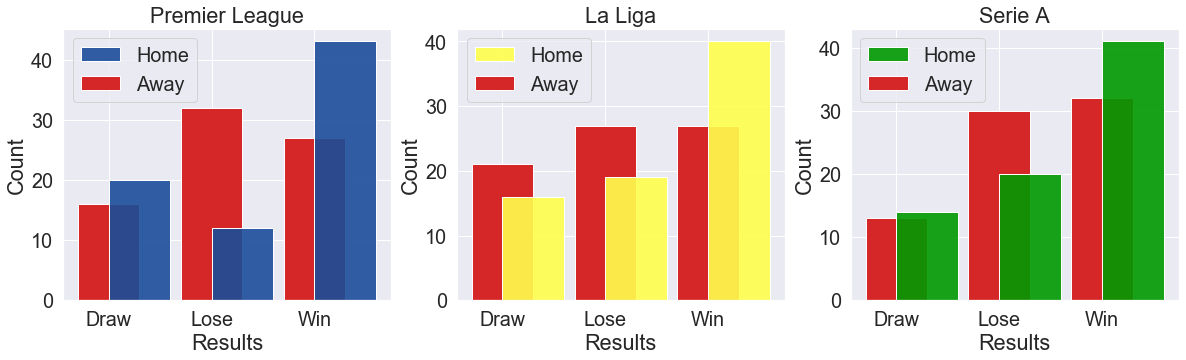

In [162]:
#Premier League

awaycount = tables[0].iloc[0][0:3].values
homecount = tables[0].iloc[1][0:3].values

fig = plt.figure(figsize=(20, 5))
ax=fig.add_subplot(1,3,1)
sns.set(font_scale=1.8)
results = ["Draw","Lose","Win"]
p1 = plt.bar(results, awaycount, 0.6, color='#d62728')
p2 = plt.bar(results, homecount, 0.6, align = 'edge', color = (0.1,0.3,0.6,0.9))
plt.legend((p2[0], p1[0]), ('Home','Away'))
plt.xlabel('Results')
plt.ylabel('Count')
plt.title('Premier League')

#La Liga

awaycount = tables[1].iloc[0][0:3].values
homecount = tables[1].iloc[1][0:3].values

ax=fig.add_subplot(1,3,2)
results = ["Draw","Lose","Win"]
p1 = plt.bar(results, awaycount, 0.6, color='#d62728')
p2 = plt.bar(results, homecount, 0.6, align='edge', color = (1,1,0.3,0.9))
plt.legend((p2[0], p1[0]), ('Home','Away'))
plt.xlabel('Results')
plt.ylabel('Count')
plt.title('La Liga')

#Serie A

awaycount = tables[2].iloc[0][0:3].values
homecount = tables[2].iloc[1][0:3].values

ax=fig.add_subplot(1,3,3)
results = ["Draw","Lose","Win"]
p1 = plt.bar(results, awaycount, 0.6, color='#d62728')
p2 = plt.bar(results, homecount, 0.6, align = 'edge', color = (0,0.6,0,0.9))
plt.legend((p2[0], p1[0]), ('Home','Away'))
plt.xlabel('Results')
plt.ylabel('Count')
plt.title('Serie A')
plt.show()

### The plots show what we anticipated: The results depend clearly from the side for Premier league teams, as the difference between home and away results are pronounced, while in the barplots for Serie A and Liga these diifferences still exist, but are less marked.  There's no evidence that the same $Side*Results$ relationship exists in these leagues (relying on the data that were used to run the analysis).

# RQ 3

Since we want to find the 10 teams who had the youngest coaches during the whole season, we need to check all of the mathces to see if any team had more than one coach during the season. If that is the case, we will keep only the youngest

#### This information can be found in the teamsData column of Matches dataframe, with the coachId entry

In [3]:
team=pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\teams.json")
team=team[:98]
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)
#Changing the officialName column's encoding, so that names are displayed correctly
a = []
for i in range(len(team.officialName)):
    a.append(team.officialName[i].encode('ascii').decode('unicode escape'))
team.officialName = a
team = team.drop(['city','name', 'type', 'alpha2code', 'alpha3code'], axis = 1)
team.head()

officialName  wyId   id
0           Newcastle United FC  1613    0
1       Real Club Celta de Vigo   692  724
2  Reial Club Deportiu Espanyol   691  724
3              Deportivo Alavés   696  724
4                    Levante UD   695  724

In [24]:
Matches = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\matches\matches_England.json")
PLteams = pd.DataFrame(team[team.id == '0'])
teams = pd.DataFrame({'Name' : list(PLteams.officialName), 'ID' : list(PLteams['wyId'])})
team_data = Matches.teamsData
teams.set_index('ID', inplace = True)

In [27]:
d = dict()
for t in teams.index:
        d[str(t)] = set()
for i in range(len(Matches)):
    data = pd.DataFrame({'Coach': pd.DataFrame(team_data[i].values())['coachId'], 
                         'Team' : pd.DataFrame(team_data[i].values())['teamId']})
    for t in data.Team:
    #in some matches the coachId is '0', meaning that there's no information, and these values should be removed
        if int(data.Coach[data.Team == t]) != 0:
            d[str(t)].add(int(data.Coach[data.Team == t])) 

#### Just a basic visualization of coach changes for all teams

Making all rows of the same length to avoid creation of NaN values in the dataframe, for a better visualization

In [28]:
dnew = d.copy()
for i in dnew.keys():
    dnew[i] = list(dnew[i])
    if len(dnew[i]) < 3:
        for _ in range(3-len(dnew[i])):
            dnew[i].append('-')
a = teams.join(pd.DataFrame(dnew.values(), index=map(int, d.keys())))
a

Name       0       1     2
ID                                                    
1613         Newcastle United FC  531745  210700     -
1673        Huddersfield Town FC   18572       -     -
10531           Swansea City AFC  381291   32573     -
1659             AFC Bournemouth    8934       -     -
1651   Brighton & Hove Albion FC    8093       -     -
1646                  Burnley FC    8880       -     -
1631           Leicester City FC  209010  333782  8214
1633          West Ham United FC    8235  269869     -
1639               Stoke City FC    8329    9054     -
1644                  Watford FC   93112   71037     -
1623                  Everton FC  434992  268779  8541
1627     West Bromwich Albion FC  149026    7973  9454
1625          Manchester City FC  267136       -     -
1624        Tottenham Hotspur FC    3782  292863     -
1628           Crystal Palace FC    8357  268775     -
1619              Southampton FC  254174    9054     -
1612                Liverpool FC   14791       -     -
1610                  Chelsea FC  272869   20454     -
1611        Manchester United FC    3295       -     -
1609                  Arsenal FC    7845       -     -

### Now the coaches database must be imported, to match the IDs of Premier league coaches in the dictionary with their corresponding birth dates contained in the database

In [29]:
coaches = pd.read_json(r'C:\Users\simon\Desktop\ADM\ADM Homework 2\coaches.json').drop(['firstName', 'lastName', 'middleName', 'passportArea', 'birthArea'], axis = 1)

#### There's a problem with one of the coaches wyId. It came out that 3782 is not a valid coach ID. In fact, by checking the team to which this ID is associated, Tottenham FC, we can be sure that there should be only one coach wyID (292863), the one associated with Mauricio Pochettino, the only manager of Tottenham since 2014.

In [30]:
coaches[coaches.wyId == 3782]

Empty DataFrame
Columns: [birthDate, currentTeamId, shortName, wyId]
Index: []

In [31]:
coaches[coaches.wyId == 292863]

birthDate  currentTeamId      shortName    wyId
90  1972-03-02           1624  M. Pochettino  292863

#### Changing the dictionary entry of Tottenham FC

In [32]:
d['1624'] = {292863}

In [33]:
for i in d.keys():
    bd = []
    for v in d[i]:
        bd.append(coaches.birthDate[coaches.wyId == v].iloc[0])
    bd.sort()
    print(bd)


['1960-04-16', '1973-02-19']
['1971-10-19']
['1965-12-04', '1972-01-08']
['1977-11-29']
['1958-12-11']
['1971-06-28']
['1961-09-02', '1963-10-26', '1975-12-04']
['1963-04-25', '1968-09-11']
['1963-11-01', '1969-08-07']
['1970-05-01', '1977-07-12']
['1954-10-19', '1963-03-21', '1973-10-16']
['1958-01-16', '1959-05-02', '1961-07-18']
['1971-01-18']
['1972-03-02']
['1947-08-09', '1970-05-15']
['1963-11-01', '1971-10-05']
['1967-06-16']
['1969-07-31', '1969-07-31']
['1963-01-26']
['1949-10-22']


#### It also came out that Chelsea FC has two coach wyIDs associated to the same manager, Antonio Conte, hence the list with the same date repeated twice. This wouldn't affect our analysis since the two entries in the coaches database are identical, but one of the two wyIDs will be removed to avoid redundancy.

In [34]:
coaches[coaches.wyId == 272869]

birthDate  currentTeamId shortName    wyId
198  1969-07-31              0  A. Conte  272869

In [35]:
coaches[coaches.wyId == 20454]

birthDate  currentTeamId shortName   wyId
8  1969-07-31              0  A. Conte  20454

In [36]:
d['1610'].remove(20454)

#### We can now assign the highest value of the sorted bd (birth date) list to each team's entry in the dictionary, so that we only keep the youngest coach for every team.

In [37]:
dnew = dict()
for i in d.keys():
    bd = []
    for v in d[i]:
        bd.append(coaches.birthDate[coaches.wyId == v].iloc[0])
    bd.sort()
    dnew[i] = bd[-1]
dnew  

{'1613': '1973-02-19',
 '1673': '1971-10-19',
 '10531': '1972-01-08',
 '1659': '1977-11-29',
 '1651': '1958-12-11',
 '1646': '1971-06-28',
 '1631': '1975-12-04',
 '1633': '1968-09-11',
 '1639': '1969-08-07',
 '1644': '1977-07-12',
 '1623': '1973-10-16',
 '1627': '1961-07-18',
 '1625': '1971-01-18',
 '1624': '1972-03-02',
 '1628': '1970-05-15',
 '1619': '1971-10-05',
 '1612': '1967-06-16',
 '1610': '1969-07-31',
 '1611': '1963-01-26',
 '1609': '1949-10-22'}

In [38]:
ordered_DF = pd.DataFrame({'teamID' : list(dnew.keys()), 'Team_Name' : list(teams['Name']),
              'Coach_Birthday' : list(dnew.values())}).sort_values(by = 'Coach_Birthday', ascending=False)

In [39]:
ordered_DF.reset_index(drop = True, inplace=True)

### The top 10 teams with the youngest coaches feature in the following table

In [40]:
ordered_DF[0:10]

teamID             Team_Name Coach_Birthday
0   1659       AFC Bournemouth     1977-11-29
1   1644            Watford FC     1977-07-12
2   1631     Leicester City FC     1975-12-04
3   1623            Everton FC     1973-10-16
4   1613   Newcastle United FC     1973-02-19
5   1624  Tottenham Hotspur FC     1972-03-02
6  10531      Swansea City AFC     1972-01-08
7   1673  Huddersfield Town FC     1971-10-19
8   1619        Southampton FC     1971-10-05
9   1646            Burnley FC     1971-06-28

### Now we want to visualize the distribution of coach ages for the Premier League teams of the 2017/2018 season through a boxplot.

In [41]:
allcoachesPL = []
for v in d.values():
    allcoachesPL += list(v)
    

In [42]:
alldates = []
for c in allcoachesPL:
    alldates.append(coaches.birthDate[coaches.wyId == c].iloc[0])    

#### To get the ages of the PL coaches, 2017-12-31 is taken as reference, because it falls in the middle of the 2017/2018 season and makes calculation easier.

In [43]:
ages = [2017 - int(i[0:4]) for i in alldates]


## Boxplot of the coach ages distribution

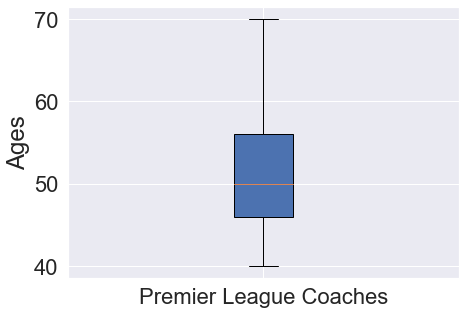

In [46]:
fig = plt.figure(figsize=(7, 5))
sns.set(font_scale=2)
plt.boxplot(ages, labels = ['Premier League Coaches'], patch_artist=True)
plt.ylabel('Ages')
plt.show()
plt.close()

# [RQ4]

In [109]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Research Question: Find the top 10 players with the highest ratio between completed passes and attempted passes.

#### Import the players dataset

In [110]:
players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

passportArea  weight  \
0     {'name': 'Turkey', 'id': '792', 'alpha3code': ...      78   
1     {'name': 'Senegal', 'id': '686', 'alpha3code':...      73   
2     {'name': 'France', 'id': '250', 'alpha3code': ...      72   
3     {'name': 'Senegal', 'id': '686', 'alpha3code':...      82   
4     {'name': 'France', 'id': '250', 'alpha3code': ...      84   
...                                                 ...     ...   
3598  {'name': 'Tunisia', 'id': 788, 'alpha3code': '...      72   
3599  {'name': 'Peru', 'id': 604, 'alpha3code': 'PER...      76   
3600  {'name': 'Peru', 'id': 604, 'alpha3code': 'PER...      78   
3601  {'name': 'Morocco', 'id': 504, 'alpha3code': '...      70   
3602  {'name': 'Panama', 'id': 591, 'alpha3code': 'P...       0   

              firstName middleName             lastName currentTeamId  \
0                 Harun                           Tekin          4502   
1                Malang                            Sarr          3775   
2                  Over                        Mandanda          3772   
3     Alfred John Momar                         N'Diaye           683   
4              Ibrahima                     Konat\u00e9          2975   
...                 ...        ...                  ...           ...   
3598                Ali                    Ma\u00e2loul         16041   
3599     Carlos Alberto             C\u00e1ceda Oyaguez         15591   
3600  Miguel Gianpierre                   Araujo Blanco         12072   
3601         Ahmed Reda                       Tagnaouti         16183   
3602            Ricardo                   Guardia Avila         62943   

       birthDate  height                                               role  \
0     1989-06-17     187  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
1     1999-01-23     182  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
2     1998-10-26     176  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
3     1990-03-06     187  {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...   
4     1999-05-25     192  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
...          ...     ...                                                ...   
3598  1990-01-01     175  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
3599  1991-09-27     183  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
3600  1994-10-24     179  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
3601  1996-04-05     182  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
3602  1997-02-04       0  {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...   

                                              birthArea    wyId   foot  \
0     {'name': 'Turkey', 'id': '792', 'alpha3code': ...   32777  right   
1     {'name': 'France', 'id': '250', 'alpha3code': ...  393228   left   
2     {'name': 'France', 'id': '250', 'alpha3code': ...  393230          
3     {'name': 'France', 'id': '250', 'alpha3code': ...   32793  right   
4     {'name': 'France', 'id': '250', 'alpha3code': ...  393247  right   
...                                                 ...     ...    ...   
3598  {'name': 'Tunisia', 'id': 788, 'alpha3code': '...  120839   left   
3599  {'name': 'Peru', 'id': 604, 'alpha3code': 'PER...  114736  right   
3600  {'name': 'Peru', 'id': 604, 'alpha3code': 'PER...  114908  right   
3601  {'name': 'Morocco', 'id': 504, 'alpha3code': '...  285583  right   
3602  {'name': 'Panama', 'id': 591, 'alpha3code': 'P...  361536   left   

            shortName currentNationalTeamId  
0            H. Tekin                  4687  
1             M. Sarr                  4423  
2         O. Mandanda                  null  
3          A. N'Diaye                 19314  
4      I. Konat\u00e9                  null  
...               ...                   ...  
3598  A. Ma\u00e2loul                  null  
3599   C. C\u00e1ceda                  null  
3600        M. Araujo                  null  
3601     A. Tagnaouti                  null  
3602         R. A

#### Import the event data for England

In [111]:
events=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_England.json")
pd.set_option('display.max_columns', 15)
events.head()

eventId           subEventName  \
0             8            Simple pass   
1             8              High pass   
2             8              Head pass   
3             8              Head pass   
4             8            Simple pass   
...         ...                    ...   
643145        5  Ball out of the field   
643146        3                 Corner   
643147        1               Air duel   
643148        1               Air duel   
643149       10                   Shot   

                                                     tags  playerId  \
0                                          [{'id': 1801}]     25413   
1                                          [{'id': 1801}]    370224   
2                                          [{'id': 1801}]      3319   
3                                          [{'id': 1801}]    120339   
4                                          [{'id': 1801}]    167145   
...                                                   ...       ...   
643145                                                 []         0   
643146           [{'id': 302}, {'id': 801}, {'id': 1801}]     70965   
643147                        [{'id': 701}, {'id': 1802}]      7919   
643148                        [{'id': 703}, {'id': 1801}]      8005   
643149  [{'id': 403}, {'id': 201}, {'id': 1216}, {'id'...      8005   

                                         positions  matchId     eventName  \
0         [{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]  2499719          Pass   
1         [{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]  2499719          Pass   
2         [{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]  2499719          Pass   
3         [{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]  2499719          Pass   
4         [{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]  2499719          Pass   
...                                            ...      ...           ...   
643145   [{'y': 32, 'x': 0}, {'y': 100, 'x': 100}]  2500098  Interruption   
643146  [{'y': 100, 'x': 100}, {'y': 47, 'x': 88}]  2500098     Free Kick   
643147    [{'y': 53, 'x': 12}, {'y': 50, 'x': 14}]  2500098          Duel   
643148    [{'y': 47, 'x': 88}, {'y': 50, 'x': 86}]  2500098          Duel   
643149      [{'y': 50, 'x': 86}, {'y': 0, 'x': 0}]  2500098          Shot   

        teamId matchPeriod     eventSec subEventId         id  
0         1609          1H     2.758649         85  177959171  
1         1609          1H     4.946850         83  177959172  
2         1609          1H     6.542188         82  177959173  
3         1609          1H     8.143395         82  177959174  
4         1609          1H    10.302366         85  177959175  
...        ...         ...          ...        ...        ...  
643145    1623          2H  2796.732525         50  251596409  
643146    1633          2H  2829.821084         30  251596232  
643147    1623          2H  2831.211419         10  251596410  
643148    1633          2H  2832.434399         10  251596234  
643149    1633          2H  2834.127168        100  251596236  

[643150 rows x 12 columns]

#### As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes. 

In [112]:
events['eventName']=events['eventName'].astype(str)
events=events[(events.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)
events

eventId subEventName                                       tags  \
0             8  Simple pass                             [{'id': 1801}]   
1             8    High pass                             [{'id': 1801}]   
2             8    Head pass                             [{'id': 1801}]   
3             8    Head pass                             [{'id': 1801}]   
4             8  Simple pass                             [{'id': 1801}]   
...         ...          ...                                        ...   
643134        8  Simple pass                             [{'id': 1801}]   
643135        8  Simple pass                             [{'id': 1801}]   
643141        8  Simple pass                             [{'id': 1801}]   
643142        8    High pass                             [{'id': 1801}]   
643143        8        Cross  [{'id': 402}, {'id': 2101}, {'id': 1802}]   

        playerId                                 positions  matchId eventName  \
0          25413  [{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]  2499719      Pass   
1         370224  [{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]  2499719      Pass   
2           3319  [{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]  2499719      Pass   
3         120339  [{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]  2499719      Pass   
4         167145  [{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]  2499719      Pass   
...          ...                                       ...      ...       ...   
643134      8313  [{'y': 63, 'x': 65}, {'y': 96, 'x': 61}]  2500098      Pass   
643135    379209  [{'y': 96, 'x': 61}, {'y': 85, 'x': 40}]  2500098      Pass   
643141      8561  [{'y': 70, 'x': 59}, {'y': 89, 'x': 53}]  2500098      Pass   
643142     20620  [{'y': 89, 'x': 53}, {'y': 72, 'x': 99}]  2500098      Pass   
643143     14703    [{'y': 72, 'x': 99}, {'y': 0, 'x': 0}]  2500098      Pass   

        teamId matchPeriod     eventSec subEventId         id  
0         1609          1H     2.758649         85  177959171  
1         1609          1H     4.946850         83  177959172  
2         1609          1H     6.542188         82  177959173  
3         1609          1H     8.143395         82  177959174  
4         1609          1H    10.302366         85  177959175  
...        ...         ...          ...        ...        ...  
643134    1633          2H  2760.286946         85  251596219  
643135    1633          2H  2763.698599         85  251596221  
643141    1633          2H  2783.137836         85  251596225  
643142    1633          2H  2785.702032         83  251596226  
643143    1633          2H  2789.232666         80  251596229  

[328657 rows x 12 columns]

#### Splitting the column 'Tags' that is a dictionary

In [113]:
TAG1=[]
for i in range(len(events.tags)):
    try:
        TAG1.append(str(events.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events.tags)):
    try:
        TAG2.append(str(events.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events.tags)):
    try:
        TAG3.append(str(events.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events.tags)):
    try:
        TAG4.append(str(events.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events=[events,TAG]
events=pd.concat(mix_events,  axis=1,  sort=False).reindex(events.index)
events=events.drop('tags',axis=1)
events.head()

eventId subEventName  playerId  \
0           8.0  Simple pass   25413.0   
1           8.0    High pass  370224.0   
2           8.0    Head pass    3319.0   
3           8.0    Head pass  120339.0   
4           8.0  Simple pass  167145.0   
...         ...          ...       ...   
643134      8.0  Simple pass    8313.0   
643135      8.0  Simple pass  379209.0   
643141      8.0  Simple pass    8561.0   
643142      8.0    High pass   20620.0   
643143      8.0        Cross   14703.0   

                                       positions    matchId eventName  teamId  \
0       [{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]  2499719.0      Pass  1609.0   
1       [{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]  2499719.0      Pass  1609.0   
2       [{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]  2499719.0      Pass  1609.0   
3       [{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]  2499719.0      Pass  1609.0   
4       [{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]  2499719.0      Pass  1609.0   
...                                          ...        ...       ...     ...   
643134  [{'y': 63, 'x': 65}, {'y': 96, 'x': 61}]  2500098.0      Pass  1633.0   
643135  [{'y': 96, 'x': 61}, {'y': 85, 'x': 40}]  2500098.0      Pass  1633.0   
643141  [{'y': 70, 'x': 59}, {'y': 89, 'x': 53}]  2500098.0      Pass  1633.0   
643142  [{'y': 89, 'x': 53}, {'y': 72, 'x': 99}]  2500098.0      Pass  1633.0   
643143    [{'y': 72, 'x': 99}, {'y': 0, 'x': 0}]  2500098.0      Pass  1633.0   

       matchPeriod     eventSec subEventId           id  Tag1   Tag2   Tag3  \
0               1H     2.758649         85  177959171.0  1801  Notag  Notag   
1               1H     4.946850         83  177959172.0  1801  Notag  Notag   
2               1H     6.542188         82  177959173.0  1801  Notag  Notag   
3               1H     8.143395         82  177959174.0  1801  Notag  Notag   
4               1H    10.302366         85  177959175.0  1801  Notag  Notag   
...            ...          ...        ...          ...   ...    ...    ...   
643134          2H  2760.286946         85  251596219.0   NaN    NaN    NaN   
643135          2H  2763.698599         85  251596221.0   NaN    NaN    NaN   
643141          2H  2783.137836         85  251596225.0   NaN    NaN    NaN   
643142          2H  2785.702032         83  251596226.0   NaN    NaN    NaN   
643143          2H  2789.232666         80  251596229.0   NaN    NaN    NaN   

         Tag4  
0       Notag  
1       Notag  
2       Notag  
3       Notag  
4       Notag  
...       ...  
643134    NaN  
643135    NaN  
643141    NaN  
643142    NaN  
643143    NaN  

[328657 rows x 15 columns]

#### Counting the number of passes with respect to the player id

In [114]:
passes=events
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player['Numberofpasses'] = passes_player.groupby('PlayerId')['PlayerId'].transform('count')
passes_player

PlayerId  Numberofpasses
0        25413.0             657
1       370224.0             574
2         3319.0            1790
3       120339.0             834
4       167145.0            1877
...          ...             ...
328652    8313.0            1203
328653  379209.0             549
328654    8561.0            1245
328655   20620.0             725
328656   14703.0             689

[328657 rows x 2 columns]

#### In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [168]:
#calculating mean and standard deviation
Mean=passes_player.Numberofpasses.mean()
stdv=passes_player.Numberofpasses.std()
Mean=int(mean)
stdv=int(stdv)
#calculating lower bound
lower_bound=Mean-(sd*1.5)
ID_passes_threshold=[]
frequency_passes_threshold=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player.Numberofpasses)):
    frequency_passes.append(float(passes_player.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold.append(int(frequency_passes[i]))
        ID_passes_threshold.append(int(ID_passes[i]))


In [169]:
lower_bound

102.71506385279235

In [170]:
passes_threshold=pd.DataFrame(ID_passes_threshold, columns=['PlayerId'])
passes_threshold.insert(1, "Numberofpasses",frequency_passes_threshold, True)
passes_threshold.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold

PlayerId  Numberofpasses
0          25413             657
1         370224             574
2           3319            1790
3         120339             834
4         167145            1877
...          ...             ...
233759    486252             226
234345     40765             104
256227     40787             140
261443    240032             167
276787      8392             106

[411 rows x 2 columns]

In [171]:
events_tag2=events.loc[events['Tag2'] == '1801']
events_tag1=events.loc[events['Tag1']=='1801']
events_tag3=events.loc[events['Tag3']=='1801']
events_tag4=events.loc[events['Tag4']=='1801']
events_tag=[events_tag1,events_tag2,events_tag3,events_tag4]
success=pd.concat(events_tag, axis=0)
success.head()

eventId subEventName  playerId  \
0           8.0  Simple pass   25413.0   
1           8.0    High pass  370224.0   
2           8.0    Head pass    3319.0   
3           8.0    Head pass  120339.0   
4           8.0  Simple pass  167145.0   
...         ...          ...       ...   
328196      8.0        Cross    8976.0   
328283      8.0        Cross  346101.0   
328286      8.0        Cross   15808.0   
328426      8.0        Cross  346101.0   
328646      8.0        Cross   77557.0   

                                       positions    matchId eventName  \
0       [{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]  2499719.0      Pass   
1       [{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]  2499719.0      Pass   
2       [{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]  2499719.0      Pass   
3       [{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]  2499719.0      Pass   
4       [{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]  2499719.0      Pass   
...                                          ...        ...       ...   
328196  [{'y': 14, 'x': 95}, {'y': 54, 'x': 90}]  2499913.0      Pass   
328283  [{'y': 88, 'x': 89}, {'y': 30, 'x': 96}]  2499913.0      Pass   
328286  [{'y': 29, 'x': 96}, {'y': 57, 'x': 94}]  2499913.0      Pass   
328426  [{'y': 93, 'x': 78}, {'y': 52, 'x': 88}]  2499913.0      Pass   
328646  [{'y': 93, 'x': 91}, {'y': 61, 'x': 89}]  2499913.0      Pass   

         teamId matchPeriod     eventSec subEventId           id  Tag1   Tag2  \
0        1609.0          1H     2.758649         85  177959171.0  1801  Notag   
1        1609.0          1H     4.946850         83  177959172.0  1801  Notag   
2        1609.0          1H     6.542188         82  177959173.0  1801  Notag   
3        1609.0          1H     8.143395         82  177959174.0  1801  Notag   
4        1609.0          1H    10.302366         85  177959175.0  1801  Notag   
...         ...         ...          ...        ...          ...   ...    ...   
328196  10531.0          1H  2186.328315         80  217543225.0   401    801   
328283   1612.0          1H  2415.680872         80  217543075.0   402    801   
328286   1612.0          1H  2422.205856         80  217543079.0   401    801   
328426   1612.0          2H   129.777831         80  217543342.0   402    801   
328646  10531.0          2H   894.779661         80  217543713.0   302    402   

         Tag3   Tag4  
0       Notag  Notag  
1       Notag  Notag  
2       Notag  Notag  
3       Notag  Notag  
4       Notag  Notag  
...       ...    ...  
328196   1801   1801  
328283   1801   1801  
328286   1801   1801  
328426   1801   1801  
328646   1801   1801  

[141130 rows x 15 columns]

In [172]:
SUCCESS=[]
for i in range(len(success.playerId)):
    SUCCESS.append(success.playerId.iloc[i])
success_new=pd.DataFrame(SUCCESS , columns=['PlayerId'])
success_new['Numberofpasses'] = success_new.groupby('PlayerId')['PlayerId'].transform('count')
success_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_new

PlayerId  Numberofpasses
0        25413.0             298
1       370224.0             185
2         3319.0            1012
3       120339.0             205
4       167145.0             937
...          ...             ...
124506  281135.0              31
124769  274488.0              17
126226   25604.0              17
127966  171283.0              48
137275    9179.0               1

[451 rows x 2 columns]

In [173]:
final_passes=pd.merge(success_new, passes_threshold, on='PlayerId')
final_passes=final_passes.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes

PlayerId  AccuratePassesNumber  TotalPassesNumber
0     25413.0                   298                657
1    370224.0                   185                574
2      3319.0                  1012               1790
3    120339.0                   205                834
4    167145.0                   937               1877
..        ...                   ...                ...
385    8135.0                    42                487
386  397174.0                    44                337
387   61961.0                    24                223
388    7961.0                    31                251
389  171283.0                    48                577

[390 rows x 3 columns]

In [293]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
engteams = teams[(teams["alpha3code"]=="XEN") & (teams["type"]=="club") | (teams["teamname"]=="Swansea City")]
engplayer = players.merge(engteams, left_on="currentTeamId", right_on="wyId")
engplayer=engplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

engplayer=engplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
engplayer=engplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes=pd.merge(engplayer, final_passes, on='PlayerId')
final_player_passes

birthDate  PlayerId         shortName          officialName  \
0    1989-03-02        36   T. Alderweireld  Tottenham Hotspur FC   
1    1987-04-24        48     J. Vertonghen  Tottenham Hotspur FC   
2    1992-02-14        54        C. Eriksen  Tottenham Hotspur FC   
3    1990-07-02      8292           D. Rose  Tottenham Hotspur FC   
4    1993-07-28      8717           H. Kane  Tottenham Hotspur FC   
..          ...       ...               ...                   ...   
335  1990-08-12    189821      M. Zeegelaar            Watford FC   
336  1989-08-12      7929      T. Cleverley            Watford FC   
337  1991-06-26     10663           A. Gray            Watford FC   
338  1993-01-01     28292  A. Doucour\u00e9            Watford FC   
339  1995-04-17      8981         W. Hughes            Watford FC   

     AccuratePassesNumber  TotalPassesNumber  
0                     598                898  
1                    1129               2370  
2                     869               2196  
3                     142                392  
4                     246                594  
..                    ...                ...  
335                   154                436  
336                   830               1081  
337                   143                271  
338                  1010               2178  
339                   112                396  

[340 rows x 6 columns]

In [294]:
Efficiency=[]
for i in range(len(final_player_passes.AccuratePassesNumber)):
    total=final_player_passes.TotalPassesNumber.iloc[i]
    accurate=final_player_passes.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency.append(Ratio)
Efficiency=pd.DataFrame(Efficiency)

In [295]:
final_player_passes.insert(4,'Efficiency',Efficiency)
final_player_ratio=final_player_passes
final_player_ratio

birthDate  PlayerId         shortName          officialName  Efficiency  \
0    1989-03-02        36   T. Alderweireld  Tottenham Hotspur FC    0.665924   
1    1987-04-24        48     J. Vertonghen  Tottenham Hotspur FC    0.476371   
2    1992-02-14        54        C. Eriksen  Tottenham Hotspur FC    0.395719   
3    1990-07-02      8292           D. Rose  Tottenham Hotspur FC    0.362245   
4    1993-07-28      8717           H. Kane  Tottenham Hotspur FC    0.414141   
..          ...       ...               ...                   ...         ...   
335  1990-08-12    189821      M. Zeegelaar            Watford FC    0.353211   
336  1989-08-12      7929      T. Cleverley            Watford FC    0.767808   
337  1991-06-26     10663           A. Gray            Watford FC    0.527675   
338  1993-01-01     28292  A. Doucour\u00e9            Watford FC    0.463728   
339  1995-04-17      8981         W. Hughes            Watford FC    0.282828   

     AccuratePassesNumber  TotalPassesNumber  
0                     598                898  
1                    1129               2370  
2                     869               2196  
3                     142                392  
4                     246                594  
..                    ...                ...  
335                   154                436  
336                   830               1081  
337                   143                271  
338                  1010               2178  
339                   112                396  

[340 rows x 7 columns]

In [296]:
final_player_ratio.to_json(r'C:\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw2\final_player_ratio.json')

In [297]:
bestefficiency=final_player_ratio.nlargest(10, ['Efficiency']) 
bestefficiency=bestefficiency.reset_index()
bestefficiency=bestefficiency.drop(columns=['index','PlayerId'])
bestefficiency=bestefficiency.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


birthDate     shortName          officialName  Efficiency  \
0  1996-02-02      H. Winks  Tottenham Hotspur FC    0.904459   
1  1986-06-26   J. Puncheon     Crystal Palace FC    0.877193   
2  1987-02-14       S. Dann     Crystal Palace FC    0.828729   
3  1988-03-06   S. Mignolet          Liverpool FC    0.786047   
4  1985-07-17     M. Britos            Watford FC    0.771739   
5  1994-12-12   N. Chalobah            Watford FC    0.770588   
6  1989-08-12  T. Cleverley            Watford FC    0.767808   
7  1988-07-03       W. Reid    West Ham United FC    0.757342   
8  1986-04-30     R. Elliot   Newcastle United FC    0.756184   
9  1990-01-05    V.Lindelof      Swansea City AFC    0.741056   

   AccuratePassesNumber  TotalPassesNumber  
0                   568                628  
1                   200                228  
2                   450                543  
3                   338                430  
4                   284                368  
5                   131                170  
6                   830               1081  
7                   490                647  
8                   214                283  
9                   435                587

#### The above table shows the top 10 most efficient players. We can observe that the highest efficiency is 90.44% in the premier league dataset.

# [RQ6]

In [184]:
import datetime as DT
import io
import numpy as np
import json
import pandas as pd
import requests
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [185]:
players=pd.read_json(r'C:\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw2\players.json')
players.head()

passportArea  weight  \
0     {'name': 'Turkey', 'id': '792', 'alpha3code': ...      78   
1     {'name': 'Senegal', 'id': '686', 'alpha3code':...      73   
2     {'name': 'France', 'id': '250', 'alpha3code': ...      72   
3     {'name': 'Senegal', 'id': '686', 'alpha3code':...      82   
4     {'name': 'France', 'id': '250', 'alpha3code': ...      84   
...                                                 ...     ...   
3598  {'name': 'Tunisia', 'id': 788, 'alpha3code': '...      72   
3599  {'name': 'Peru', 'id': 604, 'alpha3code': 'PER...      76   
3600  {'name': 'Peru', 'id': 604, 'alpha3code': 'PER...      78   
3601  {'name': 'Morocco', 'id': 504, 'alpha3code': '...      70   
3602  {'name': 'Panama', 'id': 591, 'alpha3code': 'P...       0   

              firstName middleName             lastName currentTeamId  \
0                 Harun                           Tekin          4502   
1                Malang                            Sarr          3775   
2                  Over                        Mandanda          3772   
3     Alfred John Momar                         N'Diaye           683   
4              Ibrahima                     Konat\u00e9          2975   
...                 ...        ...                  ...           ...   
3598                Ali                    Ma\u00e2loul         16041   
3599     Carlos Alberto             C\u00e1ceda Oyaguez         15591   
3600  Miguel Gianpierre                   Araujo Blanco         12072   
3601         Ahmed Reda                       Tagnaouti         16183   
3602            Ricardo                   Guardia Avila         62943   

       birthDate  height                                               role  \
0     1989-06-17     187  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
1     1999-01-23     182  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
2     1998-10-26     176  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
3     1990-03-06     187  {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...   
4     1999-05-25     192  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
...          ...     ...                                                ...   
3598  1990-01-01     175  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
3599  1991-09-27     183  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
3600  1994-10-24     179  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
3601  1996-04-05     182  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
3602  1997-02-04       0  {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...   

                                              birthArea    wyId   foot  \
0     {'name': 'Turkey', 'id': '792', 'alpha3code': ...   32777  right   
1     {'name': 'France', 'id': '250', 'alpha3code': ...  393228   left   
2     {'name': 'France', 'id': '250', 'alpha3code': ...  393230          
3     {'name': 'France', 'id': '250', 'alpha3code': ...   32793  right   
4     {'name': 'France', 'id': '250', 'alpha3code': ...  393247  right   
...                                                 ...     ...    ...   
3598  {'name': 'Tunisia', 'id': 788, 'alpha3code': '...  120839   left   
3599  {'name': 'Peru', 'id': 604, 'alpha3code': 'PER...  114736  right   
3600  {'name': 'Peru', 'id': 604, 'alpha3code': 'PER...  114908  right   
3601  {'name': 'Morocco', 'id': 504, 'alpha3code': '...  285583  right   
3602  {'name': 'Panama', 'id': 591, 'alpha3code': 'P...  361536   left   

            shortName currentNationalTeamId  
0            H. Tekin                  4687  
1             M. Sarr                  4423  
2         O. Mandanda                  null  
3          A. N'Diaye                 19314  
4      I. Konat\u00e9                  null  
...               ...                   ...  
3598  A. Ma\u00e2loul                  null  
3599   C. C\u00e1ceda                  null  
3600        M. Araujo                  null  
3601     A. Tagnaouti                  null  
3602         R. A

In [186]:
#Dropping unnecessary columns
players_imp=players.drop(columns=['passportArea','weight','firstName','middleName','lastName','currentTeamId','height','role','birthArea','wyId','foot','currentNationalTeamId'])
players_imp
players_shortname=players_imp.drop(columns=['birthDate'])
players_shortname

shortName
0            H. Tekin
1             M. Sarr
2         O. Mandanda
3          A. N'Diaye
4      I. Konat\u00e9
...               ...
3598  A. Ma\u00e2loul
3599   C. C\u00e1ceda
3600        M. Araujo
3601     A. Tagnaouti
3602         R. Avila

[3603 rows x 1 columns]

In [187]:
players_imp

birthDate        shortName
0     1989-06-17         H. Tekin
1     1999-01-23          M. Sarr
2     1998-10-26      O. Mandanda
3     1990-03-06       A. N'Diaye
4     1999-05-25   I. Konat\u00e9
...          ...              ...
3598  1990-01-01  A. Ma\u00e2loul
3599  1991-09-27   C. C\u00e1ceda
3600  1994-10-24        M. Araujo
3601  1996-04-05     A. Tagnaouti
3602  1997-02-04         R. Avila

[3603 rows x 2 columns]

In [188]:
# calculating age of the players
import datetime as DT
players_imp['age']=pd.to_datetime(players_imp['birthDate'], errors='coerce')
now = pd.to_datetime('now')
now=(now - players_imp['age']).astype('<m8[Y]') 
age=now.astype(int)
age=pd.DataFrame(age)
age

age
0      30
1      20
2      21
3      29
4      20
...   ...
3598   29
3599   28
3600   25
3601   23
3602   22

[3603 rows x 1 columns]

In [189]:
players_age=pd.concat([players_shortname,age],axis=1)
players_age

shortName  age
0            H. Tekin   30
1             M. Sarr   20
2         O. Mandanda   21
3          A. N'Diaye   29
4      I. Konat\u00e9   20
...               ...  ...
3598  A. Ma\u00e2loul   29
3599   C. C\u00e1ceda   28
3600        M. Araujo   25
3601     A. Tagnaouti   23
3602         R. Avila   22

[3603 rows x 2 columns]

#### Calculating the median age of the players

In [190]:
med_age=players_age.age.median()
med_age

27.0

#### Boxplot visualization

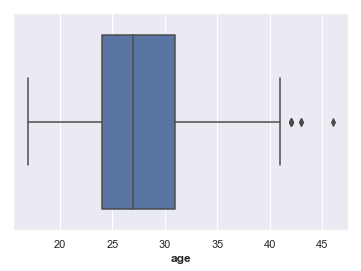

In [191]:
sns.set(style="darkgrid")
boxplot = sns.boxplot(x="age", data=players_age)
boxplot

#### Frequency of players with different ages

In [362]:
table_freq=players_age.groupby('age').size()
#table-freq=table_freq.reset_index(drop=True)
df= pd.DataFrame(table_freq)
serial_no=list(range(14))
df=df.reset_index()
df.columns=['age','frequency']
df.head()

age  frequency
0   17          3
1   18         19
2   19         64
3   20        150
4   21        188

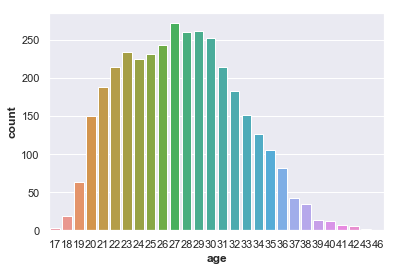

In [193]:
sns.set(style="darkgrid")
ax = sns.countplot(x="age", data=players_age)
plt.show()

In [194]:
player_eff=pd.read_json(r'C:\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw2\final_player_ratio.json')
player_eff


birthDate  PlayerId         shortName          officialName  Efficiency  \
0    1989-03-02        36   T. Alderweireld  Tottenham Hotspur FC    0.665924   
1    1987-04-24        48     J. Vertonghen  Tottenham Hotspur FC    0.476371   
2    1992-02-14        54        C. Eriksen  Tottenham Hotspur FC    0.395719   
3    1990-07-02      8292           D. Rose  Tottenham Hotspur FC    0.362245   
4    1993-07-28      8717           H. Kane  Tottenham Hotspur FC    0.414141   
..          ...       ...               ...                   ...         ...   
335  1990-08-12    189821      M. Zeegelaar            Watford FC    0.353211   
336  1989-08-12      7929      T. Cleverley            Watford FC    0.767808   
337  1991-06-26     10663           A. Gray            Watford FC    0.527675   
338  1993-01-01     28292  A. Doucour\u00e9            Watford FC    0.463728   
339  1995-04-17      8981         W. Hughes            Watford FC    0.282828   

     AccuratePassesNumber  TotalPassesNumber  
0                     598                898  
1                    1129               2370  
2                     869               2196  
3                     142                392  
4                     246                594  
..                    ...                ...  
335                   154                436  
336                   830               1081  
337                   143                271  
338                  1010               2178  
339                   112                396  

[340 rows x 7 columns]

In [195]:
player_ex_dob=player_eff.drop(columns=['birthDate'])
player_ex_dob

PlayerId         shortName          officialName  Efficiency  \
0          36   T. Alderweireld  Tottenham Hotspur FC    0.665924   
1          48     J. Vertonghen  Tottenham Hotspur FC    0.476371   
2          54        C. Eriksen  Tottenham Hotspur FC    0.395719   
3        8292           D. Rose  Tottenham Hotspur FC    0.362245   
4        8717           H. Kane  Tottenham Hotspur FC    0.414141   
..        ...               ...                   ...         ...   
335    189821      M. Zeegelaar            Watford FC    0.353211   
336      7929      T. Cleverley            Watford FC    0.767808   
337     10663           A. Gray            Watford FC    0.527675   
338     28292  A. Doucour\u00e9            Watford FC    0.463728   
339      8981         W. Hughes            Watford FC    0.282828   

     AccuratePassesNumber  TotalPassesNumber  
0                     598                898  
1                    1129               2370  
2                     869               2196  
3                     142                392  
4                     246                594  
..                    ...                ...  
335                   154                436  
336                   830               1081  
337                   143                271  
338                  1010               2178  
339                   112                396  

[340 rows x 6 columns]

In [196]:
player_eff['age'] = pd.to_datetime(player_eff['birthDate'], errors='coerce')
now = pd.to_datetime('now')
now=(now - player_eff['age']).astype('<m8[Y]') 
age=now.astype(int)
age=pd.DataFrame(age)
age

age
0     30
1     32
2     27
3     29
4     26
..   ...
335   29
336   30
337   28
338   26
339   24

[340 rows x 1 columns]

In [197]:
players_age_eff=pd.concat([player_ex_dob,age],axis=1).drop(columns=['Efficiency'])
players_age_eff

PlayerId         shortName          officialName  AccuratePassesNumber  \
0          36   T. Alderweireld  Tottenham Hotspur FC                   598   
1          48     J. Vertonghen  Tottenham Hotspur FC                  1129   
2          54        C. Eriksen  Tottenham Hotspur FC                   869   
3        8292           D. Rose  Tottenham Hotspur FC                   142   
4        8717           H. Kane  Tottenham Hotspur FC                   246   
..        ...               ...                   ...                   ...   
335    189821      M. Zeegelaar            Watford FC                   154   
336      7929      T. Cleverley            Watford FC                   830   
337     10663           A. Gray            Watford FC                   143   
338     28292  A. Doucour\u00e9            Watford FC                  1010   
339      8981         W. Hughes            Watford FC                   112   

     TotalPassesNumber  age  
0                  898   30  
1                 2370   32  
2                 2196   27  
3                  392   29  
4                  594   26  
..                 ...  ...  
335                436   29  
336               1081   30  
337                271   28  
338               2178   26  
339                396   24  

[340 rows x 6 columns]

## Research Question: Does age group influence acuracy:

#### dividing the player with respect to the age groups

In [198]:
# Age group 20.5-25.5
table1= players_age_eff.query('20.5<=age<=25.5')
table1

PlayerId            shortName               officialName  \
7      210044              E. Dier       Tottenham Hotspur FC   
8       13484              D. Alli       Tottenham Hotspur FC   
12     240070             H. Winks       Tottenham Hotspur FC   
13     257762      D. S\u00e1nchez       Tottenham Hotspur FC   
18     402884     K. Walker-Peters       Tottenham Hotspur FC   
50     346071             O. Burke    West Bromwich Albion FC   
51     434159             S. Field    West Bromwich Albion FC   
66     247248             S. March  Brighton & Hove Albion FC   
67     230020             A. Iwobi                 Arsenal FC   
80     167145        Beller\u00edn                 Arsenal FC   
81     279717    A. Maitland-Niles                 Arsenal FC   
82     370224           R. Holding                 Arsenal FC   
85     135114     P. H\u00f8jbjerg             Southampton FC   
89     268776             W. Hoedt             Southampton FC   
96       8116           N. Redmond             Southampton FC   
97       8136          J. Stephens             Southampton FC   
98       8144       J. Ward-Prowse             Southampton FC   
99     265366             W. Ndidi          Leicester City FC   
102    285508         K. Iheanacho          Leicester City FC   
107    350976          B. Chilwell          Leicester City FC   
114    217078           D. Amartey          Leicester City FC   
115    283142              D. Gray          Leicester City FC   
116    135103       A. Christensen                 Chelsea FC   
117    235555      R. Loftus-Cheek                 Chelsea FC   
133    265673       Bernardo Silva         Manchester City FC   
144      9380            J. Stones         Manchester City FC   
145     11066          R. Sterling         Manchester City FC   
146    340386        Gabriel Jesus         Manchester City FC   
148     26136             B. Mendy         Manchester City FC   
149    241564         O. Zinchenko         Manchester City FC   
150    245364         L. San\u00e9         Manchester City FC   
153    397178          M. Rashford       Manchester United FC   
155     71703     V. Lindel\u00f6f       Manchester United FC   
170      8135              L. Shaw       Manchester United FC   
171    134513           A. Martial       Manchester United FC   
172    256998            E. Bailly       Manchester United FC   
173    397174         S. McTominay       Manchester United FC   
174    332605        Ramadan Sobhi       Huddersfield Town FC   
177    282550       F. Hadergjonaj       Huddersfield Town FC   
188    214654       S. Mouni\u00e9       Huddersfield Town FC   
189    303357           P. Billing       Huddersfield Town FC   
207    240559         J. Riedewald          Crystal Palace FC   
222     26499           A. Masuaku         West Ham United FC   
228    346101  T. Alexander-Arnold               Liverpool FC   
232    257899             J. Gomez               Liverpool FC   
241    222220         A. Robertson               Liverpool FC   
242    286831           D. Solanke               Liverpool FC   
268     10131          J. Pickford                 Everton FC   
270    377071          Richarlison                 Everton FC   
272     25854             K. Zouma                 Everton FC   
279    286825             J. Kenny                 Everton FC   
280    293687     D. Calvert-Lewin                 Everton FC   
281    353236            T. Davies                 Everton FC   
282    355937           M. Holgate                 Everton FC   
295      8833         J. Lascelles        Newcastle United FC   
297    134294            I. Hayden        Newcastle United FC   
298      3436       Javi Manquillo        Newcastle United FC   
301    293686            J. Murphy        Newcastle United FC   
314     62224            R. Fraser            AFC Bournemouth   
315    134102          N. Ak\u00e9            AFC Bournemouth   
316      9739               J. Ibe      

In [199]:
# Age group 25.5-30.5
table2=players_age_eff.query('25.5<=age<=30.5')
table2

PlayerId         shortName          officialName  AccuratePassesNumber  \
0          36   T. Alderweireld  Tottenham Hotspur FC                   598   
2          54        C. Eriksen  Tottenham Hotspur FC                   869   
3        8292           D. Rose  Tottenham Hotspur FC                   142   
4        8717           H. Kane  Tottenham Hotspur FC                   246   
5        8945       K. Trippier  Tottenham Hotspur FC                   601   
..        ...               ...                   ...                   ...   
334       160        D. Janmaat            Watford FC                   161   
335    189821      M. Zeegelaar            Watford FC                   154   
336      7929      T. Cleverley            Watford FC                   830   
337     10663           A. Gray            Watford FC                   143   
338     28292  A. Doucour\u00e9            Watford FC                  1010   

     TotalPassesNumber  age  
0                  898   30  
2                 2196   27  
3                  392   29  
4                  594   26  
5                 1311   29  
..                 ...  ...  
334                822   30  
335                436   29  
336               1081   30  
337                271   28  
338               2178   26  

[181 rows x 6 columns]

In [200]:
# Age group 30.5-35.5
table3=players_age_eff.query('30.5<=age<=35.5')
table3

PlayerId               shortName               officialName  \
1          48           J. Vertonghen       Tottenham Hotspur FC   
6       11152    M. Demb\u00e9l\u00e9       Tottenham Hotspur FC   
10      25381               H. Lloris       Tottenham Hotspur FC   
21       8433                 S. Ward                 Burnley FC   
25       8301                 J. Hart                 Burnley FC   
26       8284               A. Lennon                 Burnley FC   
27       8516             P. Bardsley                 Burnley FC   
28      70092               S. Defour                 Burnley FC   
39       8370                C. Brunt    West Bromwich Albion FC   
43      25865                 B. Sako    West Bromwich Albion FC   
56      26495                 G. Bong  Brighton & Hove Albion FC   
58      64966              M. Suttner  Brighton & Hove Albion FC   
61      61961                B. Kayal  Brighton & Hove Albion FC   
68       3319            M. \u00d6zil                 Arsenal FC   
71       3560           Nacho Monreal                 Arsenal FC   
75       7855            L. Koscielny                 Arsenal FC   
83        703              M. Yoshida             Southampton FC   
86       8384                 S. Long             Southampton FC   
88      61988                S. Davis             Southampton FC   
92      61941              F. Forster             Southampton FC   
100      8480           K. Schmeichel          Leicester City FC   
103     12829                J. Vardy          Leicester City FC   
104     14763              S. Okazaki          Leicester City FC   
105      7914                J. Evans          Leicester City FC   
106      8498                 A. King          Leicester City FC   
108     14853                C. Fuchs          Leicester City FC   
109    149019              D. Simpson          Leicester City FC   
110      3928          Vicente Iborra          Leicester City FC   
111      8488               W. Morgan          Leicester City FC   
118    105333                 Willian                 Chelsea FC   
119      7887               G. Cahill                 Chelsea FC   
123     26010               O. Giroud                 Chelsea FC   
129      3350           F\u00e0bregas                 Chelsea FC   
130      7892              David Luiz                 Chelsea FC   
131      3360                   Pedro                 Chelsea FC   
135     70086             N. Otamendi         Manchester City FC   
138    105339             Fernandinho         Manchester City FC   
140      8307              V. Kompany         Manchester City FC   
141      8317             David Silva         Manchester City FC   
142      8325          S. Ag\u00fcero         Manchester City FC   
154     70122           N. Mati\u0107       Manchester United FC   
161      7939                A. Young       Manchester United FC   
162      8249             M. Fellaini       Manchester United FC   
164      7938             A. Valencia       Manchester United FC   
166      7906               Juan Mata       Manchester United FC   
192      8425            W. Hennessey          Crystal Palace FC   
196      8186                 S. Dann          Crystal Palace FC   
197      8142             J. Puncheon          Crystal Palace FC   
198      8623             J. McArthur          Crystal Palace FC   
208      7847  \u0141. Fabia\u0144ski         West Ham United FC   
209      7941       J. Hern\u00e1ndez         West Ham United FC   
211     21100              A. Ogbonna         West Ham United FC   
213      8313             P. Zabaleta         West Ham United FC   
215      8561                M. Noble         West Ham United FC   
216      8553                 W. Reid         West Ham United FC   
218      3582             Adri\u00e1n         West Ham United FC   
225      8514             S. Mignolet               Liverpool FC   
233      8319               J. Milner               Liverpool

In [201]:
s11=table1['AccuratePassesNumber'].sum()
s12=table1['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 20.5-25.5
s13=s12-s11
#The list contains total number of inaccurate passes and inaccurate passes
L1=list([round(s11/len(table1)),round(s13/len(table1))])
L1

[311.0, 447.0]

In [202]:
s21=table2['AccuratePassesNumber'].sum()
s22=table2['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 25.5-30.5
s23=s22-s21
#The list contains total number of inaccurate passes and inaccurate passes
L2=list([round(s21/len(table2)),round(s23/len(table2))])
L2

[383.0, 518.0]

In [203]:
s31=table3['AccuratePassesNumber'].sum()
s32=table3['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 30.5-35.5
s33=s32-s31
#The list contains total number of inaccurate passes and inaccurate passes
L3=list([round(s31/len(table3)),round(s33/len(table3))])
L3

[428.0, 479.0]

In [204]:
table=[L1,L2,L3]
table

[[311.0, 447.0], [383.0, 518.0], [428.0, 479.0]]

In [205]:
# Generating the contingency table
data = [['20.5-25.5', *L1], ['25.5-30.5', *L2], ['30.5-35.5', *L3]] 
df_data = pd.DataFrame(data, columns = ['Age_group', 'Average accurate passes','Average inaccurate passes'])
df_data = df_data.set_index(df_data.Age_group).drop('Age_group', axis = 1)

#### Chi-Squared Test
A chi-squared test with significance level  𝛼=0.05  will now be performed on the above contingency table.

$H_0$ : The null Hypothesis is that there's no statistically significant relationship between age of the players and the efficiency of the players

$H_1$: The alternative hypotesis is that there's significant relationship between age of the players and the efficiency of the players.

In [206]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
[[331.44037412 426.55962588]
 [393.96804365 507.03195635]
 [396.59158223 510.40841777]]
probability=0.950, critical=5.991, stat=7.203
Dependent (reject H0)
significance=0.050, p=0.027
Dependent (reject H0)


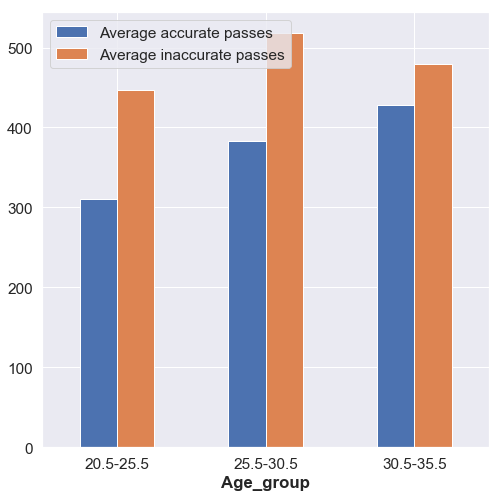

In [207]:
sns.set(font_scale=1.4)
df_data.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
plt.xticks(rotation=0)
plt.show()

#### Consider the level of significance  𝛼  be 0.05. From the chi square test, we observe that the p-value is 0.027. Which is indeed less than the level of significance  𝛼 . As,  𝑝<𝛼 , we reject the null hypothesis and can claim that there is significant statistical relationship between the age of a player and his efficiency. In particular, the barplot shows that accuracy increases with age, suggesting that years of experience influence the accuracy of players.

# Bonus_[RQ1]

# ${\bullet}$Analysis of La Liga

####  Information needed: Teams and matches related to Spain

In [208]:
import json
import pandas as pd
import requests
import numpy
import matplotlib.pyplot as plt

In [270]:
team=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json")
pd.set_option('display.max_rows', 142)
pd.set_option('display.max_columns', 12)
#From index 98, the type is given as Nation. So we don't need that.
team

city                      name  \
0                            Newcastle upon Tyne          Newcastle United   
1                                           Vigo             Celta de Vigo   
2                                      Barcelona                  Espanyol   
3                                Vitoria-Gasteiz     Deportivo Alav\u00e9s   
4                                       Valencia                   Levante   
5                                         Troyes                    Troyes   
6                                Getafe (Madrid)                    Getafe   
7                           M\u00f6nchengladbach       Borussia M'gladbach   
8                   Huddersfield, West Yorkshire         Huddersfield Town   
9                                         Bilbao             Athletic Club   
10                                        Madrid      Atl\u00e9tico Madrid   
11                                          Lyon        Olympique Lyonnais   
12                                         Paris                       PSG   
13                                      Valencia                  Valencia   
14                                        Madrid               Real Madrid   
15                                     Barcelona                 Barcelona   
16                    Las Palmas de Gran Canaria                Las Palmas   
17                                  Legan\u00e9s              Legan\u00e9s   
18                                       Ferrara                      SPAL   
19                                       Swansea              Swansea City   
20                                     Marseille       Olympique Marseille   
21                         La Chapelle-sur-Erdre                    Nantes   
22                                          Nice                      Nice   
23                                        Rennes                    Rennes   
24                                    Strasbourg                Strasbourg   
25                                         Eibar                     Eibar   
26                           Bournemouth, Dorset           AFC Bournemouth   
27                         Brighton, East Sussex    Brighton & Hove Albion   
28                                        Bremen             Werder Bremen   
29                                    Leverkusen          Bayer Leverkusen   
30                                      Dortmund         Borussia Dortmund   
31                                  M\u00fcnchen       Bayern M\u00fcnchen   
32                                     Stuttgart                 Stuttgart   
33                                 Gelsenkirchen                Schalke 04   
34                                        Milano                     Milan   
35                                        Angers                    Angers   
36                                        Torino                  Juventus   
37                                          Roma                      Roma   
38                                      Sassuolo                  Sassuolo   
39                           Burnley, Lancashire                   Burnley   
40                                    Le Haillan                  Bordeaux   
41                                      Hannover               Hannover 96   
42                                         Dijon                     Dijon   
43                                        Berlin                Hertha BSC   
44                                     Wolfsburg                 Wolfsburg   
45                                       Hamburg              Hamburger SV   
46                          Freiburg im Breisgau                  Freiburg   
47                                       Bologna                   Bologna   
48                                          Metz                      Metz   
49                                        Genova                 Sampdoria   
50                                        Verona                  

In [271]:
#convert the area from a series to a list
#Convert the list into a dataframe and concate the dataframe to the parent data i.e. team.
#Drop the column 'area'
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)
team=team[:98]
team

city                      name   wyId  \
0            Newcastle upon Tyne          Newcastle United   1613   
1                           Vigo             Celta de Vigo    692   
2                      Barcelona                  Espanyol    691   
3                Vitoria-Gasteiz     Deportivo Alav\u00e9s    696   
4                       Valencia                   Levante    695   
5                         Troyes                    Troyes   3795   
6                Getafe (Madrid)                    Getafe    698   
7           M\u00f6nchengladbach       Borussia M'gladbach   2454   
8   Huddersfield, West Yorkshire         Huddersfield Town   1673   
9                         Bilbao             Athletic Club    678   
10                        Madrid      Atl\u00e9tico Madrid    679   
11                          Lyon        Olympique Lyonnais   3766   
12                         Paris                       PSG   3767   
13                      Valencia                  Valencia    674   
14                        Madrid               Real Madrid    675   
15                     Barcelona                 Barcelona    676   
16    Las Palmas de Gran Canaria                Las Palmas    714   
17                  Legan\u00e9s              Legan\u00e9s    712   
18                       Ferrara                      SPAL   3204   
19                       Swansea              Swansea City  10531   
20                     Marseille       Olympique Marseille   3771   
21         La Chapelle-sur-Erdre                    Nantes   3770   
22                          Nice                      Nice   3775   
23                        Rennes                    Rennes   3774   
24                    Strasbourg                Strasbourg   3779   
25                         Eibar                     Eibar    701   
26           Bournemouth, Dorset           AFC Bournemouth   1659   
27         Brighton, East Sussex    Brighton & Hove Albion   1651   
28                        Bremen             Werder Bremen   2443   
29                    Leverkusen          Bayer Leverkusen   2446   
30                      Dortmund         Borussia Dortmund   2447   
31                  M\u00fcnchen       Bayern M\u00fcnchen   2444   
32                     Stuttgart                 Stuttgart   2445   
33                 Gelsenkirchen                Schalke 04   2449   
34                        Milano                     Milan   3157   
35                        Angers                    Angers   3799   
36                        Torino                  Juventus   3159   
37                          Roma                      Roma   3158   
38                      Sassuolo                  Sassuolo   3315   
39           Burnley, Lancashire                   Burnley   1646   
40                    Le Haillan                  Bordeaux   3772   
41                      Hannover               Hannover 96   2455   
42                         Dijon                     Dijon   3804   
43                        Berlin                Hertha BSC   2457   
44                     Wolfsburg                 Wolfsburg   2451   
45                       Hamburg              Hamburger SV   2450   
46          Freiburg im Breisgau                  Freiburg   2453   
47                       Bologna                   Bologna   3166   
48                          Metz                      Metz   3777   
49                        Genova                 Sampdoria   3164   
50                        Verona                    Chievo   3165   
51                      Formello                     Lazio   3162   
52                         Udine                   Udinese   3163   
53                        Milano            Internazionale   3161   
54                     Leicester            Leicester City   1631   
55                        London           West Ham United   1633   
56                Stoke-on-Trent                Stoke City   1639   
57                     Ben

In [272]:
# changing column name: The column tht contains the country names is converted into "country"
t=list(team.columns)
t[5]='country'
t
team.columns=t
team

city                      name   wyId  \
0            Newcastle upon Tyne          Newcastle United   1613   
1                           Vigo             Celta de Vigo    692   
2                      Barcelona                  Espanyol    691   
3                Vitoria-Gasteiz     Deportivo Alav\u00e9s    696   
4                       Valencia                   Levante    695   
5                         Troyes                    Troyes   3795   
6                Getafe (Madrid)                    Getafe    698   
7           M\u00f6nchengladbach       Borussia M'gladbach   2454   
8   Huddersfield, West Yorkshire         Huddersfield Town   1673   
9                         Bilbao             Athletic Club    678   
10                        Madrid      Atl\u00e9tico Madrid    679   
11                          Lyon        Olympique Lyonnais   3766   
12                         Paris                       PSG   3767   
13                      Valencia                  Valencia    674   
14                        Madrid               Real Madrid    675   
15                     Barcelona                 Barcelona    676   
16    Las Palmas de Gran Canaria                Las Palmas    714   
17                  Legan\u00e9s              Legan\u00e9s    712   
18                       Ferrara                      SPAL   3204   
19                       Swansea              Swansea City  10531   
20                     Marseille       Olympique Marseille   3771   
21         La Chapelle-sur-Erdre                    Nantes   3770   
22                          Nice                      Nice   3775   
23                        Rennes                    Rennes   3774   
24                    Strasbourg                Strasbourg   3779   
25                         Eibar                     Eibar    701   
26           Bournemouth, Dorset           AFC Bournemouth   1659   
27         Brighton, East Sussex    Brighton & Hove Albion   1651   
28                        Bremen             Werder Bremen   2443   
29                    Leverkusen          Bayer Leverkusen   2446   
30                      Dortmund         Borussia Dortmund   2447   
31                  M\u00fcnchen       Bayern M\u00fcnchen   2444   
32                     Stuttgart                 Stuttgart   2445   
33                 Gelsenkirchen                Schalke 04   2449   
34                        Milano                     Milan   3157   
35                        Angers                    Angers   3799   
36                        Torino                  Juventus   3159   
37                          Roma                      Roma   3158   
38                      Sassuolo                  Sassuolo   3315   
39           Burnley, Lancashire                   Burnley   1646   
40                    Le Haillan                  Bordeaux   3772   
41                      Hannover               Hannover 96   2455   
42                         Dijon                     Dijon   3804   
43                        Berlin                Hertha BSC   2457   
44                     Wolfsburg                 Wolfsburg   2451   
45                       Hamburg              Hamburger SV   2450   
46          Freiburg im Breisgau                  Freiburg   2453   
47                       Bologna                   Bologna   3166   
48                          Metz                      Metz   3777   
49                        Genova                 Sampdoria   3164   
50                        Verona                    Chievo   3165   
51                      Formello                     Lazio   3162   
52                         Udine                   Udinese   3163   
53                        Milano            Internazionale   3161   
54                     Leicester            Leicester City   1631   
55                        London           West Ham United   1633   
56                Stoke-on-Trent                Stoke City   1639   
57                     Ben

In [273]:
#As this is La liga, we need information solely based on Spain.
team_esp=team[(team['alpha3code']=='ESP')&(team['type']=='club')]
team_esp

city                      name  wyId  \
1                          Vigo             Celta de Vigo   692   
2                     Barcelona                  Espanyol   691   
3               Vitoria-Gasteiz     Deportivo Alav\u00e9s   696   
4                      Valencia                   Levante   695   
6               Getafe (Madrid)                    Getafe   698   
9                        Bilbao             Athletic Club   678   
10                       Madrid      Atl\u00e9tico Madrid   679   
13                     Valencia                  Valencia   674   
14                       Madrid               Real Madrid   675   
15                    Barcelona                 Barcelona   676   
16   Las Palmas de Gran Canaria                Las Palmas   714   
17                 Legan\u00e9s              Legan\u00e9s   712   
25                        Eibar                     Eibar   701   
59                       Girona                    Girona   756   
82                A Coru\u00f1a  Deportivo La Coru\u00f1a   677   
93                      Sevilla                Real Betis   684   
94  Donostia-San Sebasti\u00e1n             Real Sociedad   687   
95                      Sevilla                   Sevilla   680   
96                       Malaga               M\u00e1laga   683   
97                   Villarreal                Villarreal   682   

                             officialName  type country   id alpha3code  \
1                 Real Club Celta de Vigo  club   Spain  724        ESP   
2            Reial Club Deportiu Espanyol  club   Spain  724        ESP   
3                   Deportivo Alav\u00e9s  club   Spain  724        ESP   
4                              Levante UD  club   Spain  724        ESP   
6              Getafe Club de F\u00fatbol  club   Spain  724        ESP   
9                    Athletic Club Bilbao  club   Spain  724        ESP   
10           Club Atl\u00e9tico de Madrid  club   Spain  724        ESP   
13           Valencia Club de F\u00fatbol  club   Spain  724        ESP   
14        Real Madrid Club de F\u00fatbol  club   Spain  724        ESP   
15                           FC Barcelona  club   Spain  724        ESP   
16                          UD Las Palmas  club   Spain  724        ESP   
17                        CD Legan\u00e9s  club   Spain  724        ESP   
25                               SD Eibar  club   Spain  724        ESP   
59                              Girona FC  club   Spain  724        ESP   
82  Real Club Deportivo de La Coru\u00f1a  club   Spain  724        ESP   
93               Real Betis Balompi\u00e9  club   Spain  724        ESP   
94           Real Sociedad de F\u00fatbol  club   Spain  724        ESP   
95                             Sevilla FC  club   Spain  724        ESP   
96        M\u00e1laga Club de F\u00fatbol  club   Spain  724        ESP   
97         Villarreal Club de F\u00fatbol  club   Spain  724        ESP   

   alpha2code  
1          ES  
2          ES  
3          ES  
4          ES  
6          ES  
9          ES  
10         ES  
13         ES  
14         ES  
15         ES  
16         ES  
17         ES  
25         ES  
59         ES  
82         ES  
93         ES  
94         ES  
95         ES  
96         ES  
97         ES

In [213]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team_esp=team_esp.reset_index(drop=True)
team_esp

city                      name  wyId  \
0                          Vigo             Celta de Vigo   692   
1                     Barcelona                  Espanyol   691   
2               Vitoria-Gasteiz     Deportivo Alav\u00e9s   696   
3                      Valencia                   Levante   695   
4               Getafe (Madrid)                    Getafe   698   
5                        Bilbao             Athletic Club   678   
6                        Madrid      Atl\u00e9tico Madrid   679   
7                      Valencia                  Valencia   674   
8                        Madrid               Real Madrid   675   
9                     Barcelona                 Barcelona   676   
10   Las Palmas de Gran Canaria                Las Palmas   714   
11                 Legan\u00e9s              Legan\u00e9s   712   
12                        Eibar                     Eibar   701   
13                       Girona                    Girona   756   
14                A Coru\u00f1a  Deportivo La Coru\u00f1a   677   
15                      Sevilla                Real Betis   684   
16  Donostia-San Sebasti\u00e1n             Real Sociedad   687   
17                      Sevilla                   Sevilla   680   
18                       Malaga               M\u00e1laga   683   
19                   Villarreal                Villarreal   682   

                             officialName  type country   id alpha3code  \
0                 Real Club Celta de Vigo  club   Spain  724        ESP   
1            Reial Club Deportiu Espanyol  club   Spain  724        ESP   
2                   Deportivo Alav\u00e9s  club   Spain  724        ESP   
3                              Levante UD  club   Spain  724        ESP   
4              Getafe Club de F\u00fatbol  club   Spain  724        ESP   
5                    Athletic Club Bilbao  club   Spain  724        ESP   
6            Club Atl\u00e9tico de Madrid  club   Spain  724        ESP   
7            Valencia Club de F\u00fatbol  club   Spain  724        ESP   
8         Real Madrid Club de F\u00fatbol  club   Spain  724        ESP   
9                            FC Barcelona  club   Spain  724        ESP   
10                          UD Las Palmas  club   Spain  724        ESP   
11                        CD Legan\u00e9s  club   Spain  724        ESP   
12                               SD Eibar  club   Spain  724        ESP   
13                              Girona FC  club   Spain  724        ESP   
14  Real Club Deportivo de La Coru\u00f1a  club   Spain  724        ESP   
15               Real Betis Balompi\u00e9  club   Spain  724        ESP   
16           Real Sociedad de F\u00fatbol  club   Spain  724        ESP   
17                             Sevilla FC  club   Spain  724        ESP   
18        M\u00e1laga Club de F\u00fatbol  club   Spain  724        ESP   
19         Villarreal Club de F\u00fatbol  club   Spain  724        ESP   

   alpha2code  
0          ES  
1          ES  
2          ES  
3          ES  
4          ES  
5          ES  
6          ES  
7          ES  
8          ES  
9          ES  
10         ES  
11         ES  
12         ES  
13         ES  
14         ES  
15         ES  
16         ES  
17         ES  
18         ES  
19         ES

In [214]:
matches_esp= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_Spain.json')
pd.set_option('display.max_columns', 14)
matches_esp.head()

status  roundId  gameweek  \
0    Played  4406122        38   
1    Played  4406122        38   
2    Played  4406122        38   
3    Played  4406122        38   
4    Played  4406122        38   
..      ...      ...       ...   
375  Played  4406122         1   
376  Played  4406122         1   
377  Played  4406122         1   
378  Played  4406122         1   
379  Played  4406122         1   

                                             teamsData  seasonId  \
0    {'676': {'scoreET': 0, 'coachId': 92894, 'side...    181144   
1    {'679': {'scoreET': 0, 'coachId': 3427, 'side'...    181144   
2    {'691': {'scoreET': 0, 'coachId': 444778, 'sid...    181144   
3    {'674': {'scoreET': 0, 'coachId': 210074, 'sid...    181144   
4    {'675': {'scoreET': 0, 'coachId': 275283, 'sid...    181144   
..                                                 ...       ...   
375  {'691': {'scoreET': 0, 'coachId': 169425, 'sid...    181144   
376  {'756': {'scoreET': 0, 'coachId': 167044, 'sid...    181144   
377  {'692': {'scoreET': 0, 'coachId': 3880, 'side'...    181144   
378  {'674': {'scoreET': 0, 'coachId': 210074, 'sid...    181144   
379  {'696': {'scoreET': 0, 'coachId': 117648, 'sid...    181144   

                 dateutc  winner  \
0    2018-05-20 18:45:00     676   
1    2018-05-20 16:30:00       0   
2    2018-05-20 14:15:00     691   
3    2018-05-20 10:00:00     674   
4    2018-05-19 18:45:00       0   
..                   ...     ...   
375  2017-08-19 20:15:00       0   
376  2017-08-19 18:15:00       0   
377  2017-08-19 16:15:00     687   
378  2017-08-18 20:15:00     674   
379  2017-08-18 18:15:00     712   

                                            venue     wyId  \
0                                        Camp Nou  2565922   
1                     Estadio Wanda Metropolitano  2565925   
2                           San Mam\u00e9s Barria  2565919   
3                             Estadio de Mestalla  2565924   
4                     Estadio de la Cer\u00e1mica  2565927   
..                                            ...      ...   
375  Estadio Ram\u00f3n S\u00e1nchez Pizju\u00e1n  2565552   
376                 Estadi Municipal de Montilivi  2565551   
377                      Estadio de Bala\u00eddos  2565549   
378                           Estadio de Mestalla  2565556   
379                 Estadio Municipal de Butarque  2565557   

                                           label  \
0               Barcelona - Real Sociedad, 1 - 0   
1            Atl\u00e9tico Madrid - Eibar, 2 - 2   
2                Athletic Club - Espanyol, 0 - 1   
3     Valencia - Deportivo La Coru\u00f1a, 2 - 1   
4                Villarreal - Real Madrid, 2 - 2   
..                                           ...   
375                    Sevilla - Espanyol, 1 - 1   
376         Girona - Atl\u00e9tico Madrid, 2 - 2   
377         Celta de Vigo - Real Sociedad, 2 - 3   
378                 Valencia - Las Palmas, 1 - 0   
379  Legan\u00e9s - Deportivo Alav\u00e9s, 1 - 0   

                                     date  \
0        May 20, 2018 at 8:45:00 PM GMT+2   
1        May 20, 2018 at 6:30:00 PM GMT+2   
2        May 20, 2018 at 4:15:00 PM GMT+2   
3       May 20, 2018 at 12:00:00 PM GMT+2   
4        May 19, 2018 at 8:45:00 PM GMT+2   
..                                    ...   
375  August 19, 2017 at 10:15:00 PM GMT+2   
376   August 19, 2017 at 8:15:00 PM GMT+2   
377   August 19, 2017 at 6:15:00 PM GMT+2   
378  August 18, 2017 at 10:15:00 PM GMT+2   
379   August 18, 2017 at 8:15:00 PM GMT+2   

                                              referees duration  competitionId  
0    [{'refereeId': 398931, 'role': 'referee'}, {'r...  Regular            795  
1    [{'refereeId': 395056, 'role': 'referee'}, {'r...  Regular            795  
2    [{'refereeId': 384957, 'role': 'referee'}, {'r...  Regular            795  
3    [{'refereeId': 398913, 'role': 'referee'}, {'r...  Regular            795  
4    [{'refereeId': 395085, 'r

In [215]:
results_esp = matches_esp.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_esp
# results.columns = ['result_home','result_away']
results_esp = pd.concat([matches_esp['gameweek'],results_esp,matches_esp.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_esp.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_esp

gameweek goal_home goal_away             team_home  \
0          38         1         0             Barcelona   
1          38         2         2  Atl\u00e9tico Madrid   
2          38         0         1         Athletic Club   
3          38         2         1              Valencia   
4          38         2         2            Villarreal   
..        ...       ...       ...                   ...   
375         1         1         1               Sevilla   
376         1         2         2                Girona   
377         1         2         3         Celta de Vigo   
378         1         1         0              Valencia   
379         1         1         0          Legan\u00e9s   

                    team_away  
0               Real Sociedad  
1                       Eibar  
2                    Espanyol  
3    Deportivo La Coru\u00f1a  
4                 Real Madrid  
..                        ...  
375                  Espanyol  
376      Atl\u00e9tico Madrid  
377             Real Sociedad  
378                Las Palmas  
379     Deportivo Alav\u00e9s  

[380 rows x 5 columns]

In [216]:
results_esp['points_home'] = 0
results_esp['points_away'] = 0
for i in range(results_esp.shape[0]):
    if results_esp.loc[i,'goal_home']>results_esp.loc[i,'goal_away']:
        results_esp.loc[i,'points_home']=3
    elif results_esp.loc[i,'goal_home']<results_esp.loc[i,'goal_away']:
        results_esp.loc[i,'points_away']=3
    else:
        results_esp.loc[i,'points_home']=1
        results_esp.loc[i,'points_away']=1

In [217]:
home = results_esp[['gameweek','team_home','points_home']]
away = results_esp[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_esp = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_esp
# away

gameweek                   team  points
0           1          Athletic Club       1
1           1   Atl\u00e9tico Madrid       1
2           1              Barcelona       3
3           1          Celta de Vigo       0
4           1  Deportivo Alav\u00e9s       0
..        ...                    ...     ...
755        38            Real Madrid       1
756        38          Real Sociedad       0
757        38                Sevilla       3
758        38               Valencia       3
759        38             Villarreal       1

[760 rows x 3 columns]

In [218]:
team_list = list(points_table_esp.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_esp.loc[(points_table_esp['gameweek']==week)&(points_table_esp['team']==team),'points'])
table_esp=points_byweek
table_esp=table_esp.sort_values(by=(38),ascending=False)
table_esp=table_esp.T
pd.set_option('display.max_columns', 20)
table_esp

Barcelona  Atl\u00e9tico Madrid  Real Madrid  Valencia  Villarreal  \
0           0                     0            0         0           0   
1           3                     1            3         3           0   
2           6                     4            4         4           0   
3           9                     5            5         5           3   
4          12                     8            8         6           6   
5          15                    11            8         9           7   
6          18                    14           11        12           7   
7          21                    15           14        15          10   
8          22                    16           17        18          13   
9          25                    19           20        21          16   
10         28                    20           20        24          17   
11         31                    23           23        27          20   
12         34                    24           24        30          21   
13         35                    27           27        31          21   
14         36                    30           28        31          21   
15         39                    33           31        34          21   
16         42                    36           34        34          24   
17         45                    36           34        34          27   
18         48                    39           35        37          28   
19         51                    42           35        40          31   
20         54                    43           38        40          34   
21         57                    46           41        40          37   
22         58                    49           42        40          37   
23         59                    52           45        43          37   
24         62                    55           48        46          38   
25         65                    58           51        49          41   
26         66                    61           51        50          41   
27         69                    61           54        53          41   
28         72                    64           57        56          44   
29         75                    64           60        59          47   
30         76                    67           63        62          47   
31         79                    68           64        65          47   
32         82                    71           67        65          48   
33         83                    71           68        65          51   
34         86                    72           68        66          51   
35         89                    75           71        67          54   
36         90                    75           72        67          57   
37         90                    78           75        70          60   
38         93                    79           76        73          61   

    Real Betis  Sevilla  Getafe  Eibar  Girona  Celta de Vigo  Espanyol  \
0            0        0       0      0       0              0         0   
1            0        1       1      3       1              0         1   
2            3        4       1      3       4              0         1   
3            3        7       4      3       4              3         1   
4            6       10       4      6       4              3         4   
5            9       13       5      6       5              4         5   
6           12       13       8      6       5              7         8   
7           13       16       8      6       6              8         8   
8           13       16       8      7       6             11         9   
9           16       16       9      7       9             11        10   
10          16       19      12      8      12             11        13   
11          17       19      13      8      15             14        13   
12          17       22      16     11      16             14       

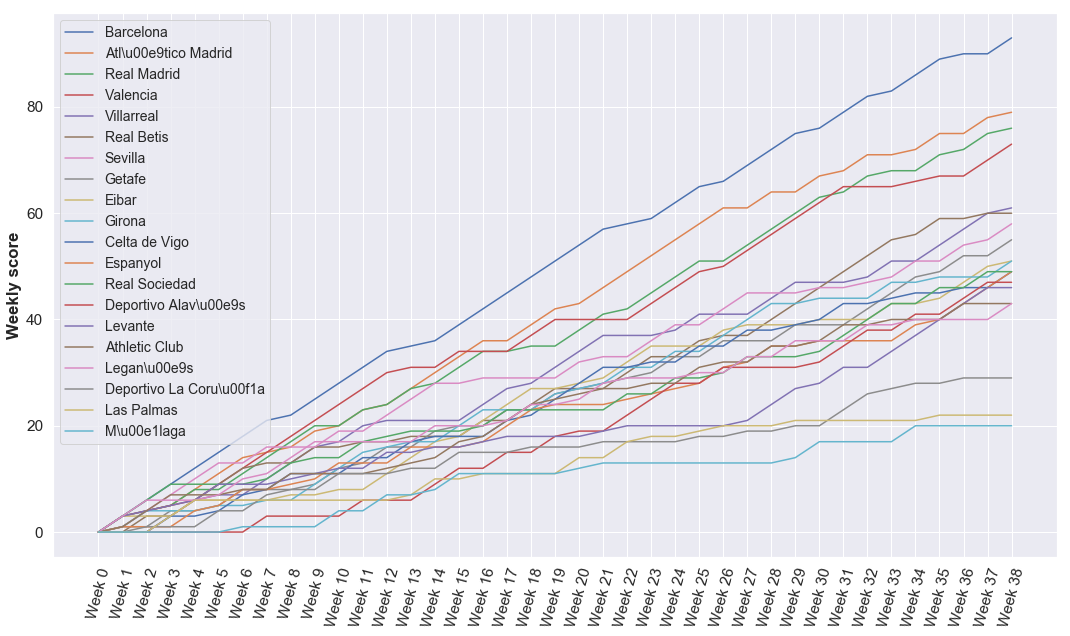

In [249]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table_esp)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_esp.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [223]:
rest={}
for i in points_table_esp.team.unique():
    t = list(points_table_esp.where(points_table_esp.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max
    


In [224]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

teams  winning_streak
18                  Valencia               8
2                  Barcelona               7
14                Real Betis               6
1       Atl\u00e9tico Madrid               6
12                   Levante               5
17                   Sevilla               4
15               Real Madrid               4
19                Villarreal               3
3              Celta de Vigo               3
4      Deportivo Alav\u00e9s               3
6                      Eibar               3
8                     Getafe               3
9                     Girona               3
16             Real Sociedad               3
0              Athletic Club               2
11              Legan\u00e9s               2
7                   Espanyol               2
5   Deportivo La Coru\u00f1a               2
10                Las Palmas               2
13               M\u00e1laga               1

In [225]:
result={}
for i in points_table_esp.team.unique():
    t = list(points_table_esp.where(points_table_esp.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [226]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

teams  losing_streak
10                Las Palmas              8
13               M\u00e1laga              7
4      Deportivo Alav\u00e9s              6
11              Legan\u00e9s              4
16             Real Sociedad              4
12                   Levante              4
18                  Valencia              3
17                   Sevilla              3
0              Athletic Club              3
7                   Espanyol              3
6                      Eibar              3
5   Deportivo La Coru\u00f1a              3
19                Villarreal              3
9                     Girona              2
8                     Getafe              2
14                Real Betis              2
3              Celta de Vigo              2
1       Atl\u00e9tico Madrid              1
15               Real Madrid              1
2                  Barcelona              1

#### From the data and the plot we can see that the team which has the longest winning streak is Valncia. Valencia made a winning chain of 8 matches. On the other hand, the team with highest losing streak is Las Palmas.

# ${\bullet}$Analysis for Bundesliga

#### Information needed: Teams and matches related to Germany

In [232]:
#As this is Bundesliga, we need information solely based on Germany.
team_ger=team[(team['alpha3code']=='DEU')&(team['type']=='club')]
team_ger

city                 name  wyId  \
7   M\u00f6nchengladbach  Borussia M'gladbach  2454   
28                Bremen        Werder Bremen  2443   
29            Leverkusen     Bayer Leverkusen  2446   
30              Dortmund    Borussia Dortmund  2447   
31          M\u00fcnchen  Bayern M\u00fcnchen  2444   
32             Stuttgart            Stuttgart  2445   
33         Gelsenkirchen           Schalke 04  2449   
41              Hannover          Hannover 96  2455   
43                Berlin           Hertha BSC  2457   
44             Wolfsburg            Wolfsburg  2451   
45               Hamburg         Hamburger SV  2450   
46  Freiburg im Breisgau             Freiburg  2453   
61              Sinsheim           Hoffenheim  2482   
69              Augsburg             Augsburg  2481   
72                 Mainz             Mainz 05  2460   
74     Frankfurt am Main  Eintracht Frankfurt  2462   
76             K\u00f6ln            K\u00f6ln  2463   
83               Leipzig           RB Leipzig  2975   

                         officialName  type  country   id alpha3code  \
7   Borussia VfL M\u00f6nchengladbach  club  Germany  276        DEU   
28                   SV Werder Bremen  club  Germany  276        DEU   
29            TSV Bayer 04 Leverkusen  club  Germany  276        DEU   
30            BV Borussia 09 Dortmund  club  Germany  276        DEU   
31             FC Bayern M\u00fcnchen  club  Germany  276        DEU   
32                 VfB Stuttgart 1893  club  Germany  276        DEU   
33                      FC Schalke 04  club  Germany  276        DEU   
41                        Hannover 96  club  Germany  276        DEU   
43                         Hertha BSC  club  Germany  276        DEU   
44                      VfL Wolfsburg  club  Germany  276        DEU   
45                       Hamburger SV  club  Germany  276        DEU   
46                        SC Freiburg  club  Germany  276        DEU   
61                TSG 1899 Hoffenheim  club  Germany  276        DEU   
69                        FC Augsburg  club  Germany  276        DEU   
72                    1. FSV Mainz 05  club  Germany  276        DEU   
74                Eintracht Frankfurt  club  Germany  276        DEU   
76                    1. FC K\u00f6ln  club  Germany  276        DEU   
83            Rasen Ballsport Leipzig  club  Germany  276        DEU   

   alpha2code  
7          DE  
28         DE  
29         DE  
30         DE  
31         DE  
32         DE  
33         DE  
41         DE  
43         DE  
44         DE  
45         DE  
46         DE  
61         DE  
69         DE  
72         DE  
74         DE  
76         DE  
83         DE

In [233]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team_ger=team_ger.reset_index(drop=True)
team_ger

city                 name  wyId  \
0   M\u00f6nchengladbach  Borussia M'gladbach  2454   
1                 Bremen        Werder Bremen  2443   
2             Leverkusen     Bayer Leverkusen  2446   
3               Dortmund    Borussia Dortmund  2447   
4           M\u00fcnchen  Bayern M\u00fcnchen  2444   
5              Stuttgart            Stuttgart  2445   
6          Gelsenkirchen           Schalke 04  2449   
7               Hannover          Hannover 96  2455   
8                 Berlin           Hertha BSC  2457   
9              Wolfsburg            Wolfsburg  2451   
10               Hamburg         Hamburger SV  2450   
11  Freiburg im Breisgau             Freiburg  2453   
12              Sinsheim           Hoffenheim  2482   
13              Augsburg             Augsburg  2481   
14                 Mainz             Mainz 05  2460   
15     Frankfurt am Main  Eintracht Frankfurt  2462   
16             K\u00f6ln            K\u00f6ln  2463   
17               Leipzig           RB Leipzig  2975   

                         officialName  type  country   id alpha3code  \
0   Borussia VfL M\u00f6nchengladbach  club  Germany  276        DEU   
1                    SV Werder Bremen  club  Germany  276        DEU   
2             TSV Bayer 04 Leverkusen  club  Germany  276        DEU   
3             BV Borussia 09 Dortmund  club  Germany  276        DEU   
4              FC Bayern M\u00fcnchen  club  Germany  276        DEU   
5                  VfB Stuttgart 1893  club  Germany  276        DEU   
6                       FC Schalke 04  club  Germany  276        DEU   
7                         Hannover 96  club  Germany  276        DEU   
8                          Hertha BSC  club  Germany  276        DEU   
9                       VfL Wolfsburg  club  Germany  276        DEU   
10                       Hamburger SV  club  Germany  276        DEU   
11                        SC Freiburg  club  Germany  276        DEU   
12                TSG 1899 Hoffenheim  club  Germany  276        DEU   
13                        FC Augsburg  club  Germany  276        DEU   
14                    1. FSV Mainz 05  club  Germany  276        DEU   
15                Eintracht Frankfurt  club  Germany  276        DEU   
16                    1. FC K\u00f6ln  club  Germany  276        DEU   
17            Rasen Ballsport Leipzig  club  Germany  276        DEU   

   alpha2code  
0          DE  
1          DE  
2          DE  
3          DE  
4          DE  
5          DE  
6          DE  
7          DE  
8          DE  
9          DE  
10         DE  
11         DE  
12         DE  
13         DE  
14         DE  
15         DE  
16         DE  
17         DE

#### Import the matches data for germany

In [298]:
matches_ger= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_Germany.json')
pd.set_option('display.max_columns', 14)
matches_ger.head()

status  roundId  gameweek  \
0  Played  4405517        34   
1  Played  4405517        34   
2  Played  4405517        34   
3  Played  4405517        34   
4  Played  4405517        34   

                                           teamsData  seasonId  \
0  {'2444': {'scoreET': 0, 'coachId': 14710, 'sid...    181137   
1  {'2482': {'scoreET': 0, 'coachId': 272299, 'si...    181137   
2  {'2457': {'scoreET': 0, 'coachId': 18987, 'sid...    181137   
3  {'2453': {'scoreET': 0, 'coachId': 14977, 'sid...    181137   
4  {'2449': {'scoreET': 0, 'coachId': 447924, 'si...    181137   

               dateutc  winner                      venue     wyId  \
0  2018-05-12 13:30:00    2445              Allianz Arena  2517036   
1  2018-05-12 13:30:00    2482  WIRSOL Rhein-Neckar-Arena  2517037   
2  2018-05-12 13:30:00    2975      Olympiastadion Berlin  2517038   
3  2018-05-12 13:30:00    2453        Schwarzwald-Stadion  2517039   
4  2018-05-12 13:30:00    2449              VELTINS-Arena  2517040   

                                     label                              date  \
0   Bayern M\u00fcnchen - Stuttgart, 1 - 4  May 12, 2018 at 3:30:00 PM GMT+2   
1    Hoffenheim - Borussia Dortmund, 3 - 1  May 12, 2018 at 3:30:00 PM GMT+2   
2           Hertha BSC - RB Leipzig, 2 - 6  May 12, 2018 at 3:30:00 PM GMT+2   
3               Freiburg - Augsburg, 2 - 0  May 12, 2018 at 3:30:00 PM GMT+2   
4  Schalke 04 - Eintracht Frankfurt, 1 - 0  May 12, 2018 at 3:30:00 PM GMT+2   

                                            referees duration  competitionId  
0  [{'refereeId': 379444, 'role': 'referee'}, {'r...  Regular            426  
1  [{'refereeId': 384936, 'role': 'referee'}, {'r...  Regular            426  
2  [{'refereeId': 387276, 'role': 'referee'}, {'r...  Regular            426  
3  [{'refereeId': 378957, 'role': 'referee'}, {'r...  Regular            426  
4  [{'refereeId': 387273, 'role': 'referee'}, {'r...  Regular            426

In [235]:
results_ger = matches_ger.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_ger
# results.columns = ['result_home','result_away']
results_ger = pd.concat([matches_ger['gameweek'],results_ger,matches_ger.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_ger.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_ger

gameweek goal_home goal_away            team_home            team_away
0          34         1         4  Bayern M\u00fcnchen            Stuttgart
1          34         3         1           Hoffenheim    Borussia Dortmund
2          34         2         6           Hertha BSC           RB Leipzig
3          34         2         0             Freiburg             Augsburg
4          34         1         0           Schalke 04  Eintracht Frankfurt
..        ...       ...       ...                  ...                  ...
301         1         2         0           Hertha BSC            Stuttgart
302         1         1         0         Hamburger SV             Augsburg
303         1         0         1             Mainz 05          Hannover 96
304         1         0         3            Wolfsburg    Borussia Dortmund
305         1         3         1  Bayern M\u00fcnchen     Bayer Leverkusen

[306 rows x 5 columns]

In [236]:
results_ger['points_home'] = 0
results_ger['points_away'] = 0
for i in range(results_ger.shape[0]):
    if results_ger.loc[i,'goal_home']>results_ger.loc[i,'goal_away']:
        results_ger.loc[i,'points_home']=3
    elif results_ger.loc[i,'goal_home']<results_ger.loc[i,'goal_away']:
        results_ger.loc[i,'points_away']=3
    else:
        results_ger.loc[i,'points_home']=1
        results_ger.loc[i,'points_away']=1

In [237]:
home = results_ger[['gameweek','team_home','points_home']]
away = results_ger[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_ger = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_ger

gameweek                 team  points
0           1             Augsburg       0
1           1     Bayer Leverkusen       0
2           1  Bayern M\u00fcnchen       3
3           1    Borussia Dortmund       3
4           1  Borussia M'gladbach       3
..        ...                  ...     ...
607        34           RB Leipzig       3
608        34           Schalke 04       3
609        34            Stuttgart       3
610        34        Werder Bremen       3
611        34            Wolfsburg       3

[612 rows x 3 columns]

In [238]:
team_list = list(points_table_ger.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,35))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,34):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_ger.loc[(points_table_ger['gameweek']==week)&(points_table_ger['team']==team),'points'])
table_ger=points_byweek
table_ger=table_ger.sort_values(by=(34),ascending=False)
table_ger=table_ger.T
pd.set_option('display.max_columns', 18)
table_ger

Augsburg Bayer Leverkusen Bayern M\u00fcnchen Borussia Dortmund  \
0         0                0                   0                 0   
1         0                0                   3                 3   
2         1                1                   6                 6   
3         4                1                   6                 7   
4         7                4                   9                10   
5        10                4                  12                13   
6        11                7                  13                16   
7        11                8                  14                19   
8        12                9                  17                19   
9        12               12                  20                20   
10       15               15                  23                20   
11       16               16                  26                20   
12       16               17                  29                20   
13       19               20                  29                21   
14       22               21                  32                22   
15       23               24                  35                22   
16       23               27                  38                25   
17       24               28                  41                28   
18       27               28                  44                29   
19       27               31                  47                30   
20       28               34                  50                31   
21       31               35                  53                34   
22       31               35                  56                37   
23       31               38                  59                40   
24       32               38                  60                41   
25       32               41                  63                42   
26       35               44                  66                45   
27       35               44                  66                48   
28       36               45                  69                48   
29       36               48                  72                51   
30       37               51                  75                51   
31       40               51                  78                54   
32       41               51                  81                55   
33       41               52                  84                55   
34      NaN              NaN                 NaN               NaN   

   Borussia M'gladbach Eintracht Frankfurt Freiburg Hamburger SV Hannover 96  \
0                    0                   0        0            0           0   
1                    3                   1        1            3           3   
2                    4                   1        1            6           6   
3                    4                   4        2            6           7   
4                    5                   4        2            6          10   
5                    8                   7        3            6          11   
6                    8                   7        4            6          12   
7                   11                  10        7            7          12   
8                   14                  13        7            7          12   
9                   14                  14        8            7          15   
10                  17                  15        8            7          18   
11                  18                  18        8           10          18   
12                  21                  19        8           10          18   
13                  24                  19       11           13          19   
14                  24                  22       12           14          19   
15                  25                  22       15           15          22   
16                  25                  25       18           15          22   
17                  28                  26

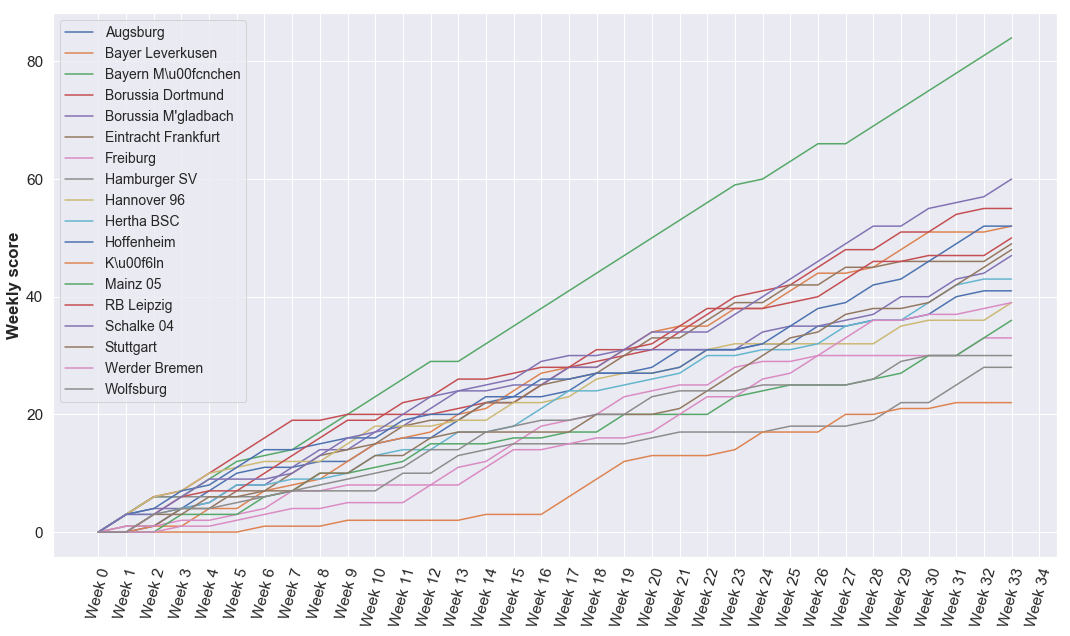

In [242]:
week = (['Week %i' %i for i in range(0, 35)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table_ger)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_ger.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [243]:
rest={}
for i in points_table_ger.team.unique():
    t = list(points_table_ger.where(points_table_ger.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [244]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

teams  winning_streak
2   Bayern M\u00fcnchen              10
14           Schalke 04               6
3     Borussia Dortmund               4
15            Stuttgart               4
13           RB Leipzig               4
0              Augsburg               3
10           Hoffenheim               3
16        Werder Bremen               3
11            K\u00f6ln               3
12             Mainz 05               2
9            Hertha BSC               2
1      Bayer Leverkusen               2
8           Hannover 96               2
7          Hamburger SV               2
6              Freiburg               2
5   Eintracht Frankfurt               2
4   Borussia M'gladbach               2
17            Wolfsburg               1

In [245]:
result={}
for i in points_table_ger.team.unique():
    t = list(points_table_ger.where(points_table_ger.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [246]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

teams  losing_streak
6              Freiburg              5
8           Hannover 96              5
11            K\u00f6ln              5
4   Borussia M'gladbach              4
7          Hamburger SV              4
15            Stuttgart              4
17            Wolfsburg              3
3     Borussia Dortmund              3
5   Eintracht Frankfurt              3
12             Mainz 05              3
13           RB Leipzig              2
16        Werder Bremen              2
14           Schalke 04              2
0              Augsburg              2
10           Hoffenheim              2
1      Bayer Leverkusen              2
2   Bayern M\u00fcnchen              1
9            Hertha BSC              1

#### From the data and the plot we can see that the team which has the longest winning streak is Bayern Munich . Bayern Munich made a winning chain of 10 matches. On the other hand, the team with highest losing streak is Freiburg.

# ${\bullet}$Analysis for Serie A

#### Information needed: Teams and matches related to Italy

In [254]:
#As this is Serie A, we need information solely based on Italy.
team_ita=team[(team['alpha3code']=='ITA')&(team['type']=='club')]
team_ita

city            name  wyId  \
18          Ferrara            SPAL  3204   
34           Milano           Milan  3157   
36           Torino        Juventus  3159   
37             Roma            Roma  3158   
38         Sassuolo        Sassuolo  3315   
47          Bologna         Bologna  3166   
49           Genova       Sampdoria  3164   
50           Verona          Chievo  3165   
51         Formello           Lazio  3162   
52            Udine         Udinese  3163   
53           Milano  Internazionale  3161   
57        Benevento       Benevento  3219   
62         Cagliari        Cagliari  3173   
63         Ciserano        Atalanta  3172   
64          Firenze      Fiorentina  3176   
80           Torino          Torino  3185   
81  Castel Volturno          Napoli  3187   
90          Crotone         Crotone  3197   
91           Verona   Hellas Verona  3194   
92           Genova           Genoa  3193   

                                   officialName  type country   id alpha3code  \
18  Societ\u00e0 Polisportiva Ars et Labor 2013  club   Italy  380        ITA   
34                                     AC Milan  club   Italy  380        ITA   
36                                  Juventus FC  club   Italy  380        ITA   
37                                      AS Roma  club   Italy  380        ITA   
38                           US Sassuolo Calcio  club   Italy  380        ITA   
47                              Bologna FC 1909  club   Italy  380        ITA   
49                                 UC Sampdoria  club   Italy  380        ITA   
50                             AC Chievo Verona  club   Italy  380        ITA   
51                                     SS Lazio  club   Italy  380        ITA   
52                               Udinese Calcio  club   Italy  380        ITA   
53                     FC Internazionale Milano  club   Italy  380        ITA   
57                             Benevento Calcio  club   Italy  380        ITA   
62                              Cagliari Calcio  club   Italy  380        ITA   
63                   Atalanta Bergamasca Calcio  club   Italy  380        ITA   
64                               ACF Fiorentina  club   Italy  380        ITA   
80                                    Torino FC  club   Italy  380        ITA   
81                                   SSC Napoli  club   Italy  380        ITA   
90                                   FC Crotone  club   Italy  380        ITA   
91                             Hellas Verona FC  club   Italy  380        ITA   
92                                    Genoa CFC  club   Italy  380        ITA   

   alpha2code  
18         IT  
34         IT  
36         IT  
37         IT  
38         IT  
47         IT  
49         IT  
50         IT  
51         IT  
52         IT  
53         IT  
57         IT  
62         IT  
63         IT  
64         IT  
80         IT  
81         IT  
90         IT  
91         IT  
92         IT

In [255]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team_ita=team_ita.reset_index(drop=True)
team_ita

city            name  wyId  \
0           Ferrara            SPAL  3204   
1            Milano           Milan  3157   
2            Torino        Juventus  3159   
3              Roma            Roma  3158   
4          Sassuolo        Sassuolo  3315   
5           Bologna         Bologna  3166   
6            Genova       Sampdoria  3164   
7            Verona          Chievo  3165   
8          Formello           Lazio  3162   
9             Udine         Udinese  3163   
10           Milano  Internazionale  3161   
11        Benevento       Benevento  3219   
12         Cagliari        Cagliari  3173   
13         Ciserano        Atalanta  3172   
14          Firenze      Fiorentina  3176   
15           Torino          Torino  3185   
16  Castel Volturno          Napoli  3187   
17          Crotone         Crotone  3197   
18           Verona   Hellas Verona  3194   
19           Genova           Genoa  3193   

                                   officialName  type country   id alpha3code  \
0   Societ\u00e0 Polisportiva Ars et Labor 2013  club   Italy  380        ITA   
1                                      AC Milan  club   Italy  380        ITA   
2                                   Juventus FC  club   Italy  380        ITA   
3                                       AS Roma  club   Italy  380        ITA   
4                            US Sassuolo Calcio  club   Italy  380        ITA   
5                               Bologna FC 1909  club   Italy  380        ITA   
6                                  UC Sampdoria  club   Italy  380        ITA   
7                              AC Chievo Verona  club   Italy  380        ITA   
8                                      SS Lazio  club   Italy  380        ITA   
9                                Udinese Calcio  club   Italy  380        ITA   
10                     FC Internazionale Milano  club   Italy  380        ITA   
11                             Benevento Calcio  club   Italy  380        ITA   
12                              Cagliari Calcio  club   Italy  380        ITA   
13                   Atalanta Bergamasca Calcio  club   Italy  380        ITA   
14                               ACF Fiorentina  club   Italy  380        ITA   
15                                    Torino FC  club   Italy  380        ITA   
16                                   SSC Napoli  club   Italy  380        ITA   
17                                   FC Crotone  club   Italy  380        ITA   
18                             Hellas Verona FC  club   Italy  380        ITA   
19                                    Genoa CFC  club   Italy  380        ITA   

   alpha2code  
0          IT  
1          IT  
2          IT  
3          IT  
4          IT  
5          IT  
6          IT  
7          IT  
8          IT  
9          IT  
10         IT  
11         IT  
12         IT  
13         IT  
14         IT  
15         IT  
16         IT  
17         IT  
18         IT  
19         IT

#### Import the matches data for Italy

In [299]:
matches_ita= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_Italy.json')
pd.set_option('display.max_columns', 14)
matches_ita.head()

status  roundId  gameweek  \
0  Played  4406278        38   
1  Played  4406278        38   
2  Played  4406278        38   
3  Played  4406278        38   
4  Played  4406278        38   

                                           teamsData  seasonId  \
0  {'3162': {'scoreET': 0, 'coachId': 251025, 'si...    181248   
1  {'3158': {'scoreET': 0, 'coachId': 210119, 'si...    181248   
2  {'3173': {'scoreET': 0, 'coachId': 251044, 'si...    181248   
3  {'3165': {'scoreET': 0, 'coachId': 272970, 'si...    181248   
4  {'3166': {'scoreET': 0, 'coachId': 20481, 'sid...    181248   

               dateutc  winner                                     venue  \
0  2018-05-20 18:45:00    3161                                             
1  2018-05-20 18:45:00    3158  MAPEI Stadium - Citt\u00e0 del Tricolore   
2  2018-05-20 16:00:00    3173                                             
3  2018-05-20 16:00:00    3165                                             
4  2018-05-20 16:00:00    3163                                             

      wyId                          label                              date  \
0  2576335  Lazio - Internazionale, 2 - 3  May 20, 2018 at 8:45:00 PM GMT+2   
1  2576336         Sassuolo - Roma, 0 - 1  May 20, 2018 at 8:45:00 PM GMT+2   
2  2576329     Cagliari - Atalanta, 1 - 0  May 20, 2018 at 6:00:00 PM GMT+2   
3  2576330      Chievo - Benevento, 1 - 0  May 20, 2018 at 6:00:00 PM GMT+2   
4  2576331       Udinese - Bologna, 1 - 0  May 20, 2018 at 6:00:00 PM GMT+2   

                                            referees duration  competitionId  
0  [{'refereeId': 377206, 'role': 'referee'}, {'r...  Regular            524  
1  [{'refereeId': 377255, 'role': 'referee'}, {'r...  Regular            524  
2  [{'refereeId': 377247, 'role': 'referee'}, {'r...  Regular            524  
3  [{'refereeId': 377246, 'role': 'referee'}, {'r...  Regular            524  
4  [{'refereeId': 377254, 'role': 'referee'}, {'r...  Regular            524

In [257]:
results_ita = matches_ita.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_ita
# results.columns = ['result_home','result_away']
results_ita = pd.concat([matches_ita['gameweek'],results_ita,matches_ita.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_ita.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_ita

gameweek goal_home goal_away      team_home       team_away
0          38         2         3          Lazio  Internazionale
1          38         0         1       Sassuolo            Roma
2          38         1         0       Cagliari        Atalanta
3          38         1         0         Chievo       Benevento
4          38         1         0        Udinese         Bologna
..        ...       ...       ...            ...             ...
375         1         0         0       Sassuolo           Genoa
376         1         1         2        Udinese          Chievo
377         1         0         1       Atalanta            Roma
378         1         1         3  Hellas Verona          Napoli
379         1         3         0       Juventus        Cagliari

[380 rows x 5 columns]

In [258]:
results_ita['points_home'] = 0
results_ita['points_away'] = 0
for i in range(results_ita.shape[0]):
    if results_ita.loc[i,'goal_home']>results_ita.loc[i,'goal_away']:
        results_ita.loc[i,'points_home']=3
    elif results_ita.loc[i,'goal_home']<results_ita.loc[i,'goal_away']:
        results_ita.loc[i,'points_away']=3
    else:
        results_ita.loc[i,'points_home']=1
        results_ita.loc[i,'points_away']=1

In [259]:
home = results_ita[['gameweek','team_home','points_home']]
away = results_ita[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_ita = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_ita

gameweek       team  points
0           1   Atalanta       0
1           1  Benevento       0
2           1    Bologna       1
3           1   Cagliari       0
4           1     Chievo       3
..        ...        ...     ...
755        38       SPAL       3
756        38  Sampdoria       0
757        38   Sassuolo       0
758        38     Torino       3
759        38    Udinese       3

[760 rows x 3 columns]

In [260]:
team_list = list(points_table_ita.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_ita.loc[(points_table_ita['gameweek']==week)&(points_table_ita['team']==team),'points'])
table_ita=points_byweek
table_ita=table_ita.sort_values(by=(38),ascending=False)
table_ita=table_ita.T
pd.set_option('display.max_columns', 20)
table_ita

Juventus  Napoli  Roma  Internazionale  Lazio  Milan  Atalanta  \
0          0       0     0               0      0      0         0   
1          3       3     3               3      1      3         0   
2          6       6     3               6      4      6         0   
3          9       9     4               9      7      6         3   
4         12      12     7              12     10      9         4   
5         15      15    10              13     10     12         7   
6         18      18    13              16     13     12         8   
7         19      21    16              19     16     12         9   
8         19      24    16              22     19     12         9   
9         22      25    19              23     22     13        12   
10        25      28    22              26     25     16        15   
11        28      31    25              29     28     16        15   
12        31      32    28              30     31     19        16   
13        31      35    31              33     31     19        16   
14        34      38    32              36     32     20        19   
15        37      38    35              39     35     21        20   
16        38      39    36              40     35     24        23   
17        41      42    39              40     36     24        24   
18        44      45    39              40     39     24        27   
19        47      48    40              41     40     25        27   
20        50      51    40              42     43     28        30   
21        53      54    41              43     46     31        30   
22        56      57    41              44     46     34        33   
23        59      60    44              45     46     35        36   
24        62      63    47              48     46     38        37   
25        65      66    50              48     49     41        38   
26        68      69    50              51     52     44        38   
27        71      69    53              52     52     45        38   
28        74      70    56              53     53     48        41   
29        75      73    59              56     54     51        44   
30        78      74    60              59     57     51        47   
31        81      77    60              59     60     52        48   
32        84      78    61              60     61     53        49   
33        85      81    64              63     64     54        52   
34        85      84    67              66     67     54        55   
35        88      84    70              66     70     57        58   
36        91      85    73              69     71     60        59   
37        92      88    74              69     72     61        60   
38        95      91    77              72     72     64        60   

    Fiorentina  Sampdoria  Torino  Sassuolo  Genoa  Chievo  Udinese  Cagliari  \
0            0          0       0         0      0       0        0         0   
1            0          3       1         1      1       3        0         0   
2            0          6       4         1      1       3        0         0   
3            3          7       7         1      1       3        3         3   
4            6          8       8         1      1       4        3         6   
5            6          9      11         4      2       5        3         6   
6            7         12      11         4      2       8        3         6   
7            7         12      12         4      2      11        6         6   
8           10         15      13         5      5      12        6         6   
9           13         18      13         8      6      15        6         6   
10          16         18      13         8      6      15        9         9   
11          16         21      16         8      6      15       12         9   
12          16         24      17         8      6      16       12        12   
13          17         27      18        11      9      17       12  

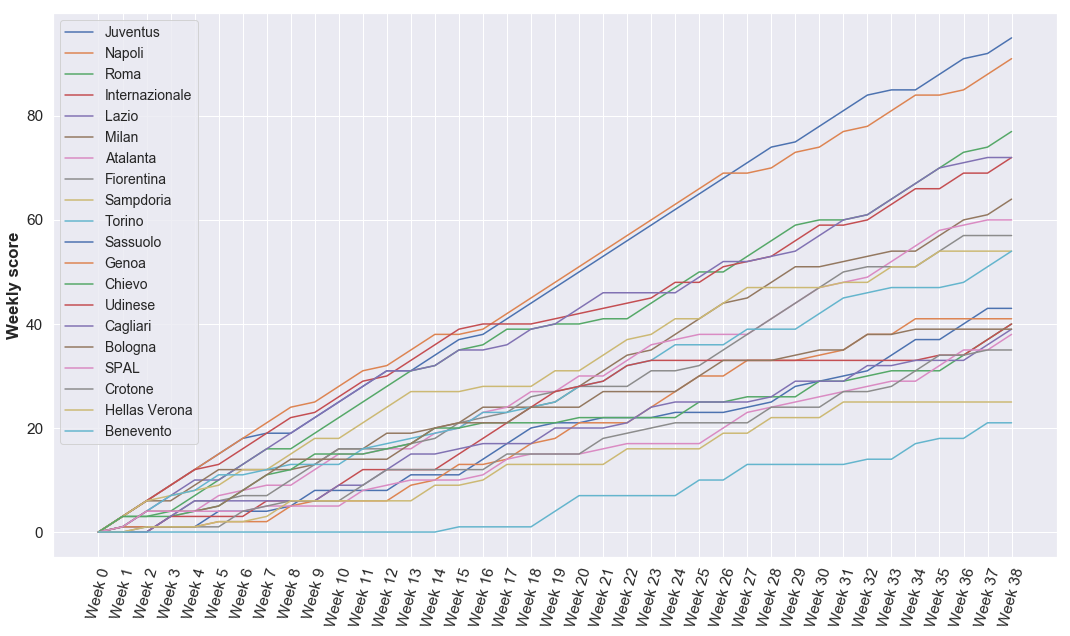

In [264]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table_ita)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_ita.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [265]:
rest={}
for i in points_table_ita.team.unique():
    t = list(points_table_ita.where(points_table_ita.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [266]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

teams  winning_streak
10        Juventus              12
13          Napoli              10
11           Lazio               7
6       Fiorentina               6
14            Roma               5
19         Udinese               5
9   Internazionale               4
7            Genoa               3
12           Milan               3
2          Bologna               3
16       Sampdoria               3
17        Sassuolo               3
0         Atalanta               3
5          Crotone               2
1        Benevento               2
4           Chievo               2
3         Cagliari               2
15            SPAL               2
18          Torino               2
8    Hellas Verona               1

In [267]:
result={}
for i in points_table_ita.team.unique():
    t = list(points_table_ita.where(points_table_ita.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [268]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

teams  losing_streak
1        Benevento             14
19         Udinese             11
3         Cagliari              5
8    Hellas Verona              5
15            SPAL              4
2          Bologna              4
4           Chievo              4
5          Crotone              4
7            Genoa              3
17        Sassuolo              3
11           Lazio              3
12           Milan              3
16       Sampdoria              3
18          Torino              2
0         Atalanta              2
9   Internazionale              2
6       Fiorentina              2
14            Roma              1
13          Napoli              1
10        Juventus              1

#### From the data and the plot we can see that the team which has the longest winning streak is Juventas. Juventas made a winning chain of 12 matches. On the other hand, the team with highest losing streak is Benevento.

# ${\bullet}$Analysis for League 1

### Information needed: Teams and matches related to France

In [274]:
#As this is League 1, we need information solely based on France.
team_fra=team[(team['alpha3code']=='FRA')&(team['type']=='club')]
team_fra

city                 name  wyId  \
5                  Troyes               Troyes  3795   
11                   Lyon   Olympique Lyonnais  3766   
12                  Paris                  PSG  3767   
20              Marseille  Olympique Marseille  3771   
21  La Chapelle-sur-Erdre               Nantes  3770   
22                   Nice                 Nice  3775   
23                 Rennes               Rennes  3774   
24             Strasbourg           Strasbourg  3779   
35                 Angers               Angers  3799   
40             Le Haillan             Bordeaux  3772   
42                  Dijon                Dijon  3804   
48                   Metz                 Metz  3777   
58     Saint-\u00c9tienne   Saint-\u00c9tienne  3782   
73      Villeneuve-d'Ascq                Lille  3776   
85                   Caen                 Caen  3783   
86               Toulouse             Toulouse  3780   
87            Montpellier          Montpellier  3787   
88               Guingamp             Guingamp  3785   
89                 Amiens            Amiens SC  3789   

                                     officialName  type country   id  \
5   Esp\u00e9rance Sportive Troyes Aube Champagne  club  France  250   
11                             Olympique Lyonnais  club  France  250   
12                         Paris Saint-Germain FC  club  France  250   
20                         Olympique de Marseille  club  France  250   
21                                      FC Nantes  club  France  250   
22                   O.G.C. Nice C\u00f4te d'Azur  club  France  250   
23                               Stade Rennais FC  club  France  250   
24                           RC Strasbourg Alsace  club  France  250   
35                                     Angers SCO  club  France  250   
40                       FC Girondins de Bordeaux  club  France  250   
42                                      Dijon FCO  club  France  250   
48                                        FC Metz  club  France  250   
58                          AS Saint-\u00c9tienne  club  France  250   
73                       Lille OSC M\u00e9tropole  club  France  250   
85                            Stade Malherbe Caen  club  France  250   
86                                    Toulouse FC  club  France  250   
87                                Montpellier HSC  club  France  250   
88                              En Avant Guingamp  club  France  250   
89                                      Amiens SC  club  France  250   

   alpha3code alpha2code  
5         FRA         FR  
11        FRA         FR  
12        FRA         FR  
20        FRA         FR  
21        FRA         FR  
22        FRA         FR  
23        FRA         FR  
24        FRA         FR  
35        FRA         FR  
40        FRA         FR  
42        FRA         FR  
48        FRA         FR  
58        FRA         FR  
73        FRA         FR  
85        FRA         FR  
86        FRA         FR  
87        FRA         FR  
88        FRA         FR  
89        FRA         FR

### Import the matches data for France

In [300]:
matches_fra= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_France.json')
pd.set_option('display.max_columns', 14)
matches_fra.head()

status  roundId  gameweek  \
0  Played  4405655        38   
1  Played  4405655        38   
2  Played  4405655        38   
3  Played  4405655        38   
4  Played  4405655        38   

                                           teamsData  seasonId  \
0  {'3783': {'scoreET': 0, 'coachId': 210513, 'si...    181189   
1  {'3804': {'scoreET': 0, 'coachId': 220743, 'si...    181189   
2  {'3766': {'scoreET': 0, 'coachId': 211238, 'si...    181189   
3  {'3771': {'scoreET': 0, 'coachId': 25691, 'sid...    181189   
4  {'3772': {'scoreET': 0, 'coachId': 9092, 'side...    181189   

               dateutc  winner                     venue     wyId  \
0  2018-05-19 19:00:00       0     Stade Michel d'Ornano  2501056   
1  2018-05-19 19:00:00       0  Stade Gaston-G\u00e9rard  2501057   
2  2018-05-19 19:00:00    3766          Groupama Stadium  2501058   
3  2018-05-19 19:00:00    3771      Stade V\u00e9lodrome  2501059   
4  2018-05-19 19:00:00    3772    Stade Saint-Symphorien  2501060   

                                    label                              date  \
0                       Caen - PSG, 0 - 0  May 19, 2018 at 9:00:00 PM GMT+2   
1               Dijon - Angers SCO, 2 - 1  May 19, 2018 at 9:00:00 PM GMT+2   
2        Olympique Lyonnais - Nice, 3 - 2  May 19, 2018 at 9:00:00 PM GMT+2   
3  Olympique Marseille - Amiens SC, 2 - 1  May 19, 2018 at 9:00:00 PM GMT+2   
4                  Metz - Bordeaux, 0 - 4  May 19, 2018 at 9:00:00 PM GMT+2   

                                            referees duration  competitionId  
0  [{'refereeId': 384954, 'role': 'referee'}, {'r...  Regular            412  
1  [{'refereeId': 385496, 'role': 'referee'}, {'r...  Regular            412  
2  [{'refereeId': 386297, 'role': 'referee'}, {'r...  Regular            412  
3  [{'refereeId': 385529, 'role': 'referee'}, {'r...  Regular            412  
4  [{'refereeId': 385796, 'role': 'referee'}, {'r...  Regular            412

In [276]:
results_fra = matches_fra.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_fra
# results.columns = ['result_home','result_away']
results_fra = pd.concat([matches_fra['gameweek'],results_fra,matches_fra.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_fra.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_fra

gameweek goal_home goal_away            team_home   team_away
0          38         0         0                 Caen         PSG
1          38         2         1                Dijon  Angers SCO
2          38         3         2   Olympique Lyonnais        Nice
3          38         2         1  Olympique Marseille   Amiens SC
4          38         0         4                 Metz    Bordeaux
..        ...       ...       ...                  ...         ...
375         1         1         0          Montpellier        Caen
376         1         1         0   Saint-\u00c9tienne        Nice
377         1         1         1               Troyes      Rennes
378         1         2         0                  PSG   Amiens SC
379         1         3         2               Monaco    Toulouse

[380 rows x 5 columns]

In [277]:
results_fra['points_home'] = 0
results_fra['points_away'] = 0
for i in range(results_fra.shape[0]):
    if results_fra.loc[i,'goal_home']>results_fra.loc[i,'goal_away']:
        results_fra.loc[i,'points_home']=3
    elif results_fra.loc[i,'goal_home']<results_fra.loc[i,'goal_away']:
        results_fra.loc[i,'points_away']=3
    else:
        results_fra.loc[i,'points_home']=1
        results_fra.loc[i,'points_away']=1

In [278]:
home = results_fra[['gameweek','team_home','points_home']]
away = results_fra[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_fra = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_fra

gameweek                team  points
0           1           Amiens SC       0
1           1          Angers SCO       1
2           1            Bordeaux       1
3           1                Caen       0
4           1               Dijon       0
..        ...                 ...     ...
755        38              Rennes       1
756        38  Saint-\u00c9tienne       3
757        38          Strasbourg       0
758        38            Toulouse       3
759        38              Troyes       0

[760 rows x 3 columns]

In [279]:
team_list = list(points_table_fra.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_fra.loc[(points_table_fra['gameweek']==week)&(points_table_fra['team']==team),'points'])
table_fra=points_byweek
table_fra=table_fra.sort_values(by=(38),ascending=False)
table_fra=table_fra.T
pd.set_option('display.max_columns', 18)
table_fra

PSG  Monaco  Olympique Lyonnais  Olympique Marseille  Rennes  Bordeaux  \
0     0       0                   0                    0       0         0   
1     3       3                   3                    3       1         1   
2     6       6                   6                    6       1         4   
3     9       9                   7                    7       2         5   
4    12      12                   8                    7       2         8   
5    15      12                  11                    7       5         9   
6    18      15                  11                   10       5        12   
7    19      18                  12                   13       6        15   
8    22      19                  13                   16       6        15   
9    25      19                  16                   17       6        16   
10   26      22                  19                   18       9        16   
11   29      25                  22                   21      12        16   
12   32      28                  25                   24      15        16   
13   35      29                  26                   25      15        17   
14   38      29                  29                   28      18        17   
15   41      29                  29                   31      21        20   
16   41      32                  32                   32      24        20   
17   44      35                  35                   35      25        20   
18   47      38                  38                   35      25        20   
19   50      41                  41                   38      25        20   
20   53      42                  42                   41      25        23   
21   56      43                  45                   44      28        23   
22   56      46                  48                   47      31        26   
23   59      47                  48                   48      31        29   
24   62      50                  48                   51      31        32   
25   65      53                  48                   52      34        35   
26   68      56                  49                   55      35        35   
27   71      57                  50                   55      38        36   
28   74      60                  51                   56      41        36   
29   77      63                  54                   59      42        37   
30   80      66                  57                   59      45        37   
31   83      67                  60                   62      46        37   
32   84      70                  63                   63      47        40   
33   87      70                  66                   66      47        43   
34   90      70                  69                   69      48        43   
35   91      71                  72                   70      51        46   
36   92      74                  75                   73      54        49   
37   92      77                  75                   74      57        52   
38   93      80                  78                   77      58        55   

    Saint-\u00c9tienne  Nice  Nantes  ...  Guingamp  Amiens SC  Angers SCO  \
0                    0     0       0  ...         0          0           0   
1                    3     0       0  ...         3          0           1   
2                    6     0       0  ...         3          0           4   
3                    9     3       3  ...         3          0           5   
4                    9     3       4  ...         6          3           6   
5                   10     6       7  ...         6          6           7   
6                   13     9      10  ...         9          6           7   
7                   14    10      13  ...         9          6           8   
8                   14    10      16  ...        10          9           9   
9                   17    10      17  ...        13          9          12   
10                  17   

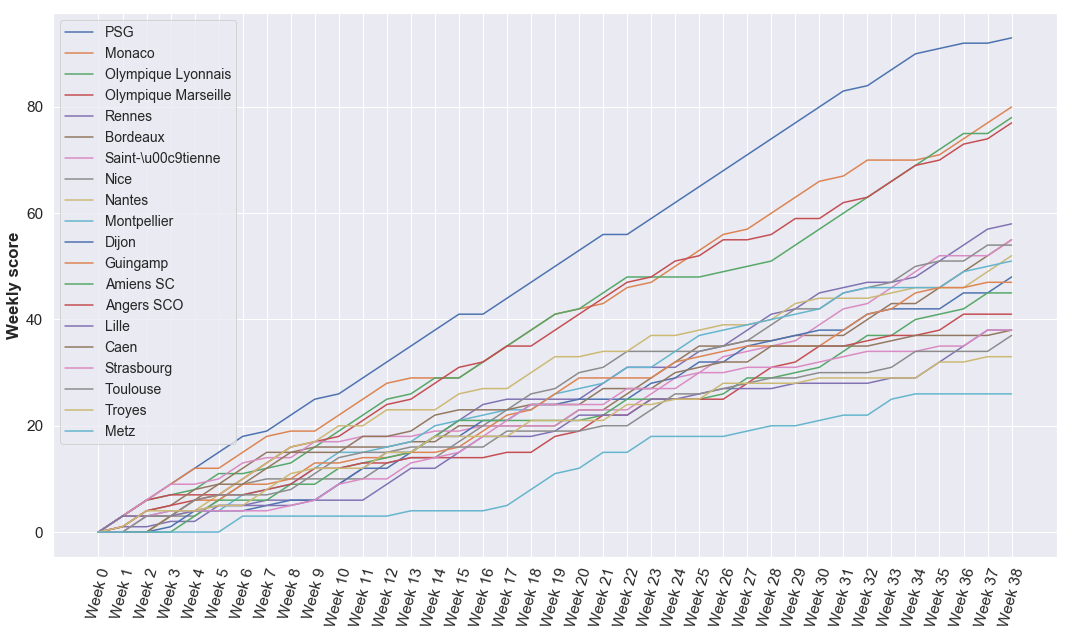

In [286]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table_fra)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_fra.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [287]:
rest={}
for i in points_table_fra.team.unique():
    t = list(points_table_fra.where(points_table_fra.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [288]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

teams  winning_streak
14                  PSG               9
12   Olympique Lyonnais               8
10               Nantes               4
13  Olympique Marseille               4
2              Bordeaux               4
8                Monaco               4
11                 Nice               4
3                  Caen               3
17           Strasbourg               3
6                 Lille               3
16   Saint-\u00c9tienne               3
15               Rennes               3
18             Toulouse               2
0             Amiens SC               2
1            Angers SCO               2
9           Montpellier               2
7                  Metz               2
5              Guingamp               2
4                 Dijon               2
19               Troyes               2

In [289]:
rest={}
for i in points_table_fra.team.unique():
    t = list(points_table_fra.where(points_table_fra.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [290]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

teams  losing_streak
7                  Metz              6
0             Amiens SC              5
17           Strasbourg              4
11                 Nice              4
19               Troyes              4
3                  Caen              4
2              Bordeaux              4
5              Guingamp              3
6                 Lille              3
9           Montpellier              3
1            Angers SCO              3
12   Olympique Lyonnais              3
15               Rennes              3
16   Saint-\u00c9tienne              3
18             Toulouse              3
4                 Dijon              2
8                Monaco              2
13  Olympique Marseille              2
10               Nantes              2
14                  PSG              1

### From the data and the plot we can see that the team which has the longest winning streak is PSG. PSG made a winning chain of 9 matches. On the other hand, the  team with highest losing streak is Metz.

## ${\bullet}$Compilation of the results obtained from all the leagues and observing the differences.
#### Note, this comparative analysis is completely basd on the [RQ1]

 From the datasets, i.e. the leagues and the teams, we analysed five leagues, viz. the premier league, the La Liga, the Bundesliga, the Serie A and League 1. We can observe that all the leagues mentioned above are mutually exclusive in nature, that is, there is no team which can participate in more than one league simultaneously. More, the leagues are organised on country basis. So, the teams can participate according to their geographical terrirory. For example, being situated in the UK, Manchester United participates in the Premier league, not in any other league. Here, we will try to establish a table which will show us the basis similarities and disimilarities between the summary data obtained from the analysis of the leagues.

In [291]:
df= {'League_name': ['Premier league', 'La Liga','Bundesliga','Serie A','League 1'], 'country': ['England & Wales', 'Spain','Germany','Italy', 'France']
    ,'Weeks':[38,38,34,38,38],'Longest winning streak':[19,8,10,12,9],'Longest losing streak':[8,8,5,14,4]}
df=pd.DataFrame(df)
df

League_name          country  Weeks  Longest winning streak  \
0  Premier league  England & Wales     38                      19   
1         La Liga            Spain     38                       8   
2      Bundesliga          Germany     34                      10   
3         Serie A            Italy     38                      12   
4        League 1           France     38                       9   

   Longest losing streak  
0                      8  
1                      8  
2                      5  
3                     14  
4                      4

#  Bonus_[RQ4]

#### Here we will see the top 10 most efficient players for the La Liga, Bundesliga and the Sirie A along with the premier league.

# La Liga

In [301]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Import the players dataset

In [302]:

players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

passportArea  weight  \
0  {'name': 'Turkey', 'id': '792', 'alpha3code': ...      78   
1  {'name': 'Senegal', 'id': '686', 'alpha3code':...      73   
2  {'name': 'France', 'id': '250', 'alpha3code': ...      72   
3  {'name': 'Senegal', 'id': '686', 'alpha3code':...      82   
4  {'name': 'France', 'id': '250', 'alpha3code': ...      84   

           firstName middleName     lastName currentTeamId   birthDate  \
0              Harun                   Tekin          4502  1989-06-17   
1             Malang                    Sarr          3775  1999-01-23   
2               Over                Mandanda          3772  1998-10-26   
3  Alfred John Momar                 N'Diaye           683  1990-03-06   
4           Ibrahima             Konat\u00e9          2975  1999-05-25   

   height                                               role  \
0     187  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
1     182  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
2     176  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
3     187  {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...   
4     192  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   

                                           birthArea    wyId   foot  \
0  {'name': 'Turkey', 'id': '792', 'alpha3code': ...   32777  right   
1  {'name': 'France', 'id': '250', 'alpha3code': ...  393228   left   
2  {'name': 'France', 'id': '250', 'alpha3code': ...  393230          
3  {'name': 'France', 'id': '250', 'alpha3code': ...   32793  right   
4  {'name': 'France', 'id': '250', 'alpha3code': ...  393247  right   

        shortName currentNationalTeamId  
0        H. Tekin                  4687  
1         M. Sarr                  4423  
2     O. Mandanda                  null  
3      A. N'Diaye                 19314  
4  I. Konat\u00e9                  null

### Import the event data for Spain

In [303]:
events_esp=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_Spain.json")
pd.set_option('display.max_columns', 15)
events_esp.head()

eventId subEventName            tags  playerId  \
0        8  Simple pass  [{'id': 1801}]      3542   
1        8  Simple pass  [{'id': 1801}]    274435   
2        8  Simple pass  [{'id': 1801}]    364860   
3        8  Simple pass  [{'id': 1801}]      3534   
4        8  Simple pass  [{'id': 1801}]      3695   

                                  positions  matchId eventName  teamId  \
0  [{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]  2565548      Pass     682   
1  [{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]  2565548      Pass     682   
2  [{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]  2565548      Pass     682   
3  [{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]  2565548      Pass     682   
4  [{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]  2565548      Pass     682   

  matchPeriod   eventSec subEventId         id  
0          1H   2.994582         85  180864419  
1          1H   3.137020         85  180864418  
2          1H   6.709668         85  180864420  
3          1H   8.805497         85  180864421  
4          1H  14.047492         85  180864422

#### As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes. 

In [304]:
events_esp['eventName']=events_esp['eventName'].astype(str)
events_esp=events_esp[(events_esp.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)
events_esp.head()

eventId subEventName            tags  playerId  \
0        8  Simple pass  [{'id': 1801}]      3542   
1        8  Simple pass  [{'id': 1801}]    274435   
2        8  Simple pass  [{'id': 1801}]    364860   
3        8  Simple pass  [{'id': 1801}]      3534   
4        8  Simple pass  [{'id': 1801}]      3695   

                                  positions  matchId eventName  teamId  \
0  [{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]  2565548      Pass     682   
1  [{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]  2565548      Pass     682   
2  [{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]  2565548      Pass     682   
3  [{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]  2565548      Pass     682   
4  [{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]  2565548      Pass     682   

  matchPeriod   eventSec subEventId         id  
0          1H   2.994582         85  180864419  
1          1H   3.137020         85  180864418  
2          1H   6.709668         85  180864420  
3          1H   8.805497         85  180864421  
4          1H  14.047492         85  180864422

#### Splitting the column 'Tags' that is a dictionary

In [305]:
TAG1=[]
for i in range(len(events_esp.tags)):
    try:
        TAG1.append(str(events_esp.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events_esp.tags)):
    try:
        TAG2.append(str(events_esp.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events_esp.tags)):
    try:
        TAG3.append(str(events_esp.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events_esp.tags)):
    try:
        TAG4.append(str(events_esp.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events_esp=[events_esp,TAG]
events_esp=pd.concat(mix_events_esp,  axis=1,  sort=False).reindex(events_esp.index)
events_esp=events_esp.drop('tags',axis=1)
events_esp.head()

eventId subEventName  playerId                                 positions  \
0      8.0  Simple pass    3542.0  [{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]   
1      8.0  Simple pass  274435.0  [{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]   
2      8.0  Simple pass  364860.0  [{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]   
3      8.0  Simple pass    3534.0  [{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]   
4      8.0  Simple pass    3695.0  [{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]   

     matchId eventName  teamId matchPeriod   eventSec subEventId           id  \
0  2565548.0      Pass   682.0          1H   2.994582         85  180864419.0   
1  2565548.0      Pass   682.0          1H   3.137020         85  180864418.0   
2  2565548.0      Pass   682.0          1H   6.709668         85  180864420.0   
3  2565548.0      Pass   682.0          1H   8.805497         85  180864421.0   
4  2565548.0      Pass   682.0          1H  14.047492         85  180864422.0   

   Tag1   Tag2   Tag3   Tag4  
0  1801  Notag  Notag  Notag  
1  1801  Notag  Notag  Notag  
2  1801  Notag  Notag  Notag  
3  1801  Notag  Notag  Notag  
4  1801  Notag  Notag  Notag

In [306]:
events_esp['eventName'] = events_esp['eventName'].astype(str)
events_esp=events_esp[(events_esp.eventName.str.contains('Pass'))]
events_esp.head()

eventId subEventName  playerId                                 positions  \
0      8.0  Simple pass    3542.0  [{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]   
1      8.0  Simple pass  274435.0  [{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]   
2      8.0  Simple pass  364860.0  [{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]   
3      8.0  Simple pass    3534.0  [{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]   
4      8.0  Simple pass    3695.0  [{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]   

     matchId eventName  teamId matchPeriod   eventSec subEventId           id  \
0  2565548.0      Pass   682.0          1H   2.994582         85  180864419.0   
1  2565548.0      Pass   682.0          1H   3.137020         85  180864418.0   
2  2565548.0      Pass   682.0          1H   6.709668         85  180864420.0   
3  2565548.0      Pass   682.0          1H   8.805497         85  180864421.0   
4  2565548.0      Pass   682.0          1H  14.047492         85  180864422.0   

   Tag1   Tag2   Tag3   Tag4  
0  1801  Notag  Notag  Notag  
1  1801  Notag  Notag  Notag  
2  1801  Notag  Notag  Notag  
3  1801  Notag  Notag  Notag  
4  1801  Notag  Notag  Notag

#### Counting the number of passes with respect to the player id

In [307]:
passes=events_esp
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player_esp=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player_esp['Numberofpasses'] = passes_player_esp.groupby('PlayerId')['PlayerId'].transform('count')
passes_player_esp

PlayerId  Numberofpasses
0         3542.0            1753
1       274435.0             346
2       364860.0            2338
3         3534.0            1353
4         3695.0            1390
...          ...             ...
318717    3486.0              37
318718    3695.0            1390
318719   20623.0             490
318720  122832.0              16
318721   40756.0            1648

[318722 rows x 2 columns]

#### In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [309]:
#calculating Mean
#Calculating Standard deviation
Mean=passes_player_esp.Numberofpasses.mean()
std=passes_player_esp.Numberofpasses.std()
Mean=int(Mean)
std=int(std)
#Calculating Lower bound
lower_bound=Mean-std
ID_passes_threshold_esp=[]
frequency_passes_threshold_esp=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player_esp.Numberofpasses)):
    frequency_passes.append(float(passes_player_esp.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player_esp.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold_esp.append(int(frequency_passes[i]))
        ID_passes_threshold_esp.append(int(ID_passes[i]))

In [310]:
passes_threshold_esp=pd.DataFrame(ID_passes_threshold_esp, columns=['PlayerId'])
passes_threshold_esp.insert(1, "Numberofpasses",frequency_passes_threshold_esp, True)
passes_threshold_esp.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold_esp

PlayerId  Numberofpasses
0           3542            1753
1         364860            2338
2           3534            1353
3           3695            1390
4           3277            1333
...          ...             ...
149219    112366             542
151293     20803             542
151302    424624             604
152935    364850             559
155528     26518             544

[262 rows x 2 columns]

In [312]:
events_esp_tag2=events_esp.loc[events_esp['Tag2'] == '1801']
events_esp_tag1=events_esp.loc[events_esp['Tag1']=='1801']
events_esp_tag3=events_esp.loc[events_esp['Tag3']=='1801']
events_esp_tag4=events_esp.loc[events_esp['Tag4']=='1801']
events_esp_tag=[events_esp_tag1,events_esp_tag2,events_esp_tag3,events_esp_tag4]
success_esp=pd.concat(events_esp_tag, axis=0)
success_esp.head()

eventId subEventName  playerId                                 positions  \
0      8.0  Simple pass    3542.0  [{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]   
1      8.0  Simple pass  274435.0  [{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]   
2      8.0  Simple pass  364860.0  [{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]   
3      8.0  Simple pass    3534.0  [{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]   
4      8.0  Simple pass    3695.0  [{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]   

     matchId eventName  teamId matchPeriod   eventSec subEventId           id  \
0  2565548.0      Pass   682.0          1H   2.994582         85  180864419.0   
1  2565548.0      Pass   682.0          1H   3.137020         85  180864418.0   
2  2565548.0      Pass   682.0          1H   6.709668         85  180864420.0   
3  2565548.0      Pass   682.0          1H   8.805497         85  180864421.0   
4  2565548.0      Pass   682.0          1H  14.047492         85  180864422.0   

   Tag1   Tag2   Tag3   Tag4  
0  1801  Notag  Notag  Notag  
1  1801  Notag  Notag  Notag  
2  1801  Notag  Notag  Notag  
3  1801  Notag  Notag  Notag  
4  1801  Notag  Notag  Notag

In [313]:
S=[]
for i in range(len(success_esp.playerId)):
   S.append(success_esp.playerId.iloc[i])
success_esp_new=pd.DataFrame(S , columns=['PlayerId'])
success_esp_new['Numberofpasses'] = success_esp_new.groupby('PlayerId')['PlayerId'].transform('count')
success_esp_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_esp_new

PlayerId  Numberofpasses
0         3542.0             766
1       274435.0             149
2       364860.0            1064
3         3534.0             583
4         3695.0             606
...          ...             ...
117636    7864.0              49
119552    3779.0               4
121694  247150.0              20
123531    3604.0               2
124208  400564.0               1

[479 rows x 2 columns]

In [314]:
final_passes_esp=pd.merge(success_esp_new, passes_threshold_esp, on='PlayerId')
final_passes_esp=final_passes_esp.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes_esp.head()

PlayerId  AccuratePassesNumber  TotalPassesNumber
0    3542.0                   766               1753
1  364860.0                  1064               2338
2    3534.0                   583               1353
3    3695.0                   606               1390
4    3277.0                   689               1333

In [315]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
espteams = teams[(teams["alpha3code"]=="ESP") & (teams["type"]=="club")]
espplayer = players.merge(espteams, left_on="currentTeamId", right_on="wyId")
espplayer=espplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','officialName','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

espplayer=espplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
espplayer=espplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes_esp=pd.merge(espplayer, final_passes_esp, on='PlayerId')
final_player_passes_esp.head()

birthDate  PlayerId     shortName  AccuratePassesNumber  TotalPassesNumber
0  1988-11-20       254    R. Rosales                   592               1475
1  1991-01-11      3568         Recio                   682                887
2  1984-09-14      3645  Chory Castro                   345                873
3  1988-05-25      3705   Adri\u00e1n                   479                980
4  1986-02-10      3719       Roberto                   241                508

In [316]:
Efficiency_esp=[]
for i in range(len(final_player_passes_esp.AccuratePassesNumber)):
    total=final_player_passes_esp.TotalPassesNumber.iloc[i]
    accurate=final_player_passes_esp.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency_esp.append(Ratio)
Efficiency_esp=pd.DataFrame(Efficiency_esp)

In [317]:
final_player_passes_esp.insert(4,'Efficiency',Efficiency_esp)
final_player_ratio_esp=final_player_passes_esp

final_player_ratio_esp.head()

birthDate  PlayerId     shortName  AccuratePassesNumber  Efficiency  \
0  1988-11-20       254    R. Rosales                   592    0.401356   
1  1991-01-11      3568         Recio                   682    0.768884   
2  1984-09-14      3645  Chory Castro                   345    0.395189   
3  1988-05-25      3705   Adri\u00e1n                   479    0.488776   
4  1986-02-10      3719       Roberto                   241    0.474409   

   TotalPassesNumber  
0               1475  
1                887  
2                873  
3                980  
4                508

In [318]:
#The top 10 players
bestefficiency_esp=final_player_ratio_esp.nlargest(10, ['Efficiency']) 
bestefficiency_esp=bestefficiency_esp.reset_index()
bestefficiency_esp=bestefficiency_esp.drop(columns=['index','PlayerId'])
bestefficiency_esp=bestefficiency_esp.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency_esp

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


birthDate      shortName  AccuratePassesNumber  Efficiency  \
0  1990-09-15          Bigas                   504    0.904847   
1  1989-11-14    Font\u00e0s                   587    0.845821   
2  1991-01-11          Recio                   682    0.768884   
3  1989-12-23      Z. Feddal                   548    0.718218   
4  1989-11-26      Juan Cala                   390    0.707804   
5  1993-01-20  Fede Cartabia                   370    0.696798   
6  1985-10-14      G. Cabral                   825    0.676784   
7  1989-03-26   S. Kj\u00e6r                   509    0.673280   
8  1998-07-22    F. Valverde                   363    0.656420   
9  1992-03-27     V.Lindelof                   382    0.648557   

   TotalPassesNumber  
0                557  
1                694  
2                887  
3                763  
4                551  
5                531  
6               1219  
7                756  
8                553  
9                589

## Bundsliga

In [319]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Import the players dataset

In [320]:

players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

passportArea  weight  \
0  {'name': 'Turkey', 'id': '792', 'alpha3code': ...      78   
1  {'name': 'Senegal', 'id': '686', 'alpha3code':...      73   
2  {'name': 'France', 'id': '250', 'alpha3code': ...      72   
3  {'name': 'Senegal', 'id': '686', 'alpha3code':...      82   
4  {'name': 'France', 'id': '250', 'alpha3code': ...      84   

           firstName middleName     lastName currentTeamId   birthDate  \
0              Harun                   Tekin          4502  1989-06-17   
1             Malang                    Sarr          3775  1999-01-23   
2               Over                Mandanda          3772  1998-10-26   
3  Alfred John Momar                 N'Diaye           683  1990-03-06   
4           Ibrahima             Konat\u00e9          2975  1999-05-25   

   height                                               role  \
0     187  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
1     182  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
2     176  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
3     187  {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...   
4     192  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   

                                           birthArea    wyId   foot  \
0  {'name': 'Turkey', 'id': '792', 'alpha3code': ...   32777  right   
1  {'name': 'France', 'id': '250', 'alpha3code': ...  393228   left   
2  {'name': 'France', 'id': '250', 'alpha3code': ...  393230          
3  {'name': 'France', 'id': '250', 'alpha3code': ...   32793  right   
4  {'name': 'France', 'id': '250', 'alpha3code': ...  393247  right   

        shortName currentNationalTeamId  
0        H. Tekin                  4687  
1         M. Sarr                  4423  
2     O. Mandanda                  null  
3      A. N'Diaye                 19314  
4  I. Konat\u00e9                  null

### Import the event data for Germany

In [327]:
events_ger=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_Germany.json")
pd.set_option('display.max_columns', 15)
events_ger.head()

eventId subEventName            tags  playerId  \
0        8  Simple pass  [{'id': 1801}]     15231   
1        8  Simple pass  [{'id': 1801}]     14786   
2        8  Simple pass  [{'id': 1801}]     14803   
3        8  Simple pass  [{'id': 1801}]     14768   
4        8  Simple pass  [{'id': 1801}]     14803   

                                  positions  matchId eventName  teamId  \
0  [{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]  2516739      Pass    2446   
1  [{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]  2516739      Pass    2446   
2   [{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]  2516739      Pass    2446   
3   [{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]  2516739      Pass    2446   
4   [{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]  2516739      Pass    2446   

  matchPeriod   eventSec subEventId         id  
0          1H   2.409746         85  179896442  
1          1H   2.506082         85  179896443  
2          1H   6.946706         85  179896444  
3          1H  10.786491         85  179896445  
4          1H  12.684514         85  179896446

#### As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes.

In [328]:
events_ger['eventName']=events_ger['eventName'].astype(str)
events_ger=events_ger[(events_ger.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)
events_ger.head()

eventId subEventName            tags  playerId  \
0        8  Simple pass  [{'id': 1801}]     15231   
1        8  Simple pass  [{'id': 1801}]     14786   
2        8  Simple pass  [{'id': 1801}]     14803   
3        8  Simple pass  [{'id': 1801}]     14768   
4        8  Simple pass  [{'id': 1801}]     14803   

                                  positions  matchId eventName  teamId  \
0  [{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]  2516739      Pass    2446   
1  [{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]  2516739      Pass    2446   
2   [{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]  2516739      Pass    2446   
3   [{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]  2516739      Pass    2446   
4   [{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]  2516739      Pass    2446   

  matchPeriod   eventSec subEventId         id  
0          1H   2.409746         85  179896442  
1          1H   2.506082         85  179896443  
2          1H   6.946706         85  179896444  
3          1H  10.786491         85  179896445  
4          1H  12.684514         85  179896446

#### Splitting the column 'Tags' that is a dictionary

In [329]:
TAG1=[]
for i in range(len(events_ger.tags)):
    try:
        TAG1.append(str(events_ger.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events_ger.tags)):
    try:
        TAG2.append(str(events_ger.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events_ger.tags)):
    try:
        TAG3.append(str(events_ger.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events_ger.tags)):
    try:
        TAG4.append(str(events_ger.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events_ger=[events_ger,TAG]
events_ger=pd.concat(mix_events_ger,  axis=1,  sort=False).reindex(events_ger.index)
events_ger=events_ger.drop('tags',axis=1)


In [330]:
events_ger['eventName'] = events_ger['eventName'].astype(str)
events_ger=events_ger[(events_ger.eventName.str.contains('Pass'))]
events_ger.head()

eventId subEventName  playerId                                 positions  \
0      8.0  Simple pass   15231.0  [{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]   
1      8.0  Simple pass   14786.0  [{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]   
2      8.0  Simple pass   14803.0   [{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]   
3      8.0  Simple pass   14768.0   [{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]   
4      8.0  Simple pass   14803.0   [{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]   

     matchId eventName  teamId matchPeriod   eventSec subEventId           id  \
0  2516739.0      Pass  2446.0          1H   2.409746         85  179896442.0   
1  2516739.0      Pass  2446.0          1H   2.506082         85  179896443.0   
2  2516739.0      Pass  2446.0          1H   6.946706         85  179896444.0   
3  2516739.0      Pass  2446.0          1H  10.786491         85  179896445.0   
4  2516739.0      Pass  2446.0          1H  12.684514         85  179896446.0   

   Tag1   Tag2   Tag3   Tag4  
0  1801  Notag  Notag  Notag  
1  1801  Notag  Notag  Notag  
2  1801  Notag  Notag  Notag  
3  1801  Notag  Notag  Notag  
4  1801  Notag  Notag  Notag

####  Counting the number of passes with respect to the player id

In [331]:
passes=events_ger
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player_ger=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player_ger['Numberofpasses'] = passes_player_ger.groupby('PlayerId')['PlayerId'].transform('count')
passes_player_ger

PlayerId  Numberofpasses
0        15231.0             716
1        14786.0             509
2        14803.0            1473
3        14768.0             883
4        14803.0            1473
...          ...             ...
261457   16843.0            1444
261458  275384.0             920
261459   15194.0             522
261460   14917.0            1336
261461   14804.0             189

[261462 rows x 2 columns]

#### In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [332]:
#calculating Mean
#Calculating Standard deviation
Mean=passes_player_ger.Numberofpasses.mean()
std=passes_player_ger.Numberofpasses.std()
Mean=int(Mean)
std=int(std)
#Calculating Lower bound
lower_bound=Mean-std
ID_passes_threshold_ger=[]
frequency_passes_threshold_ger=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player_ger.Numberofpasses)):
    frequency_passes.append(float(passes_player_ger.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player_ger.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold_ger.append(int(frequency_passes[i]))
        ID_passes_threshold_ger.append(int(ID_passes[i]))

In [333]:
passes_threshold_ger=pd.DataFrame(ID_passes_threshold_ger, columns=['PlayerId'])
passes_threshold_ger.insert(1, "Numberofpasses",frequency_passes_threshold_ger, True)
passes_threshold_ger.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold_ger

PlayerId  Numberofpasses
0          15231             716
1          14786             509
2          14803            1473
3          14768             883
5          40657            1163
...          ...             ...
78219     221172             592
103200     14887             584
110615     19720             742
128400    297957             580
138642    279734             510

[229 rows x 2 columns]

In [334]:
events_ger_tag2=events_ger.loc[events_ger['Tag2'] == '1801']
events_ger_tag1=events_ger.loc[events_ger['Tag1']=='1801']
events_ger_tag3=events_ger.loc[events_ger['Tag3']=='1801']
events_ger_tag4=events_ger.loc[events_ger['Tag4']=='1801']
events_ger_tag=[events_ger_tag1,events_ger_tag2,events_ger_tag3,events_ger_tag4]
success_ger=pd.concat(events_ger_tag, axis=0)
success_ger.head()

eventId subEventName  playerId                                 positions  \
0      8.0  Simple pass   15231.0  [{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]   
1      8.0  Simple pass   14786.0  [{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]   
2      8.0  Simple pass   14803.0   [{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]   
3      8.0  Simple pass   14768.0   [{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]   
4      8.0  Simple pass   14803.0   [{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]   

     matchId eventName  teamId matchPeriod   eventSec subEventId           id  \
0  2516739.0      Pass  2446.0          1H   2.409746         85  179896442.0   
1  2516739.0      Pass  2446.0          1H   2.506082         85  179896443.0   
2  2516739.0      Pass  2446.0          1H   6.946706         85  179896444.0   
3  2516739.0      Pass  2446.0          1H  10.786491         85  179896445.0   
4  2516739.0      Pass  2446.0          1H  12.684514         85  179896446.0   

   Tag1   Tag2   Tag3   Tag4  
0  1801  Notag  Notag  Notag  
1  1801  Notag  Notag  Notag  
2  1801  Notag  Notag  Notag  
3  1801  Notag  Notag  Notag  
4  1801  Notag  Notag  Notag

In [335]:
S=[]
for i in range(len(success_ger.playerId)):
   S.append(success_ger.playerId.iloc[i])
success_ger_new=pd.DataFrame(S , columns=['PlayerId'])
success_ger_new['Numberofpasses'] = success_ger_new.groupby('PlayerId')['PlayerId'].transform('count')
success_ger_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_ger_new

PlayerId  Numberofpasses
0       15231.0             263
1       14786.0             237
2       14803.0             629
3       14768.0             393
5       40657.0             459
...         ...             ...
94854   14887.0              77
96732  372316.0               1
98961  399599.0               9
99320  217052.0               8
99859  135810.0               5

[419 rows x 2 columns]

In [336]:
final_passes_ger=pd.merge(success_ger_new, passes_threshold_ger, on='PlayerId')
final_passes_ger=final_passes_ger.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes_ger

PlayerId  AccuratePassesNumber  TotalPassesNumber
0     15231.0                   263                716
1     14786.0                   237                509
2     14803.0                   629               1473
3     14768.0                   393                883
4     40657.0                   459               1163
..        ...                   ...                ...
221  134392.0                   311                956
222   14988.0                   155                666
223   14789.0                    79                506
224  221172.0                    71                592
225   14887.0                    77                584

[226 rows x 3 columns]

In [337]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
gerteams = teams[(teams["alpha3code"]=="DEU") & (teams["type"]=="club")]
gerplayer = players.merge(gerteams, left_on="currentTeamId", right_on="wyId")
gerplayer=gerplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','officialName','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

gerplayer=gerplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
gerplayer=gerplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes_ger=pd.merge(gerplayer, final_passes_ger, on='PlayerId')
final_player_passes_ger

birthDate  PlayerId        shortName  AccuratePassesNumber  \
0    1999-05-25    393247   I. Konat\u00e9                   284   
1    1994-03-17     65596      M. Sabitzer                   382   
2    1995-05-14    296341         Bernardo                   235   
3    1994-10-24     70975            Bruma                   319   
4    1997-05-27    282804        K. Laimer                   207   
..          ...       ...              ...                   ...   
215  1991-03-14     14749         G. Sakai                   391   
216  1992-02-23     14857  K. Papadopoulos                   473   
217  1990-09-18     14864        L. Holtby                    98   
218  1992-11-01    127796   F. Kosti\u0107                   175   
219  1995-04-04    327009           Walace                   249   

     TotalPassesNumber  
0                  606  
1                  829  
2                  682  
3                  785  
4                  604  
..                 ...  
215               1130  
216               1058  
217                524  
218                704  
219                592  

[220 rows x 5 columns]

In [338]:
Efficiency_ger=[]
for i in range(len(final_player_passes_ger.AccuratePassesNumber)):
    total=final_player_passes_ger.TotalPassesNumber.iloc[i]
    accurate=final_player_passes_ger.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency_ger.append(Ratio)
Efficiency_ger=pd.DataFrame(Efficiency_ger)

In [339]:
final_player_passes_ger.insert(4,'Efficiency',Efficiency_ger)
final_player_ratio_ger=final_player_passes_ger
final_player_ratio_ger

birthDate  PlayerId        shortName  AccuratePassesNumber  Efficiency  \
0    1999-05-25    393247   I. Konat\u00e9                   284    0.468647   
1    1994-03-17     65596      M. Sabitzer                   382    0.460796   
2    1995-05-14    296341         Bernardo                   235    0.344575   
3    1994-10-24     70975            Bruma                   319    0.406369   
4    1997-05-27    282804        K. Laimer                   207    0.342715   
..          ...       ...              ...                   ...         ...   
215  1991-03-14     14749         G. Sakai                   391    0.346018   
216  1992-02-23     14857  K. Papadopoulos                   473    0.447070   
217  1990-09-18     14864        L. Holtby                    98    0.187023   
218  1992-11-01    127796   F. Kosti\u0107                   175    0.248580   
219  1995-04-04    327009           Walace                   249    0.420608   

     TotalPassesNumber  
0                  606  
1                  829  
2                  682  
3                  785  
4                  604  
..                 ...  
215               1130  
216               1058  
217                524  
218                704  
219                592  

[220 rows x 6 columns]

In [340]:
bestefficiency_ger=final_player_ratio_ger.nlargest(10, ['Efficiency']) 
bestefficiency_ger=bestefficiency_ger.reset_index()
bestefficiency_ger=bestefficiency_ger.drop(columns=['index','PlayerId'])
bestefficiency_ger=bestefficiency_ger.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency_ger

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


birthDate       shortName  AccuratePassesNumber  Efficiency  \
0  1991-09-27  M. Halstenberg                   456    0.807080   
1  1983-05-28      M. Lehmann                   613    0.780892   
2  1996-06-13        K. Coman                   418    0.716981   
3  1993-07-03     K. Demirbay                   435    0.698234   
4  1994-03-13     Y. Gerhardt                   376    0.693727   
5  1997-09-09     F. Uduokhai                   581    0.676368   
6  1988-01-15     S. Langkamp                   468    0.642857   
7  1988-09-05   N. \u015eahin                   643    0.634748   
8  1995-09-18        M. Meyer                   637    0.626969   
9  1987-05-22      V.Lindelof                   687    0.619477   

   TotalPassesNumber  
0                565  
1                785  
2                583  
3                623  
4                542  
5                859  
6                728  
7               1013  
8               1016  
9               1109

### The above table shows the top 10 most efficient players. We can observe that the highest efficiency is 89.03% in the Bundesliga.

## Serie-A

In [341]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Import the players dataset

In [343]:
players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

passportArea  weight  \
0  {'name': 'Turkey', 'id': '792', 'alpha3code': ...      78   
1  {'name': 'Senegal', 'id': '686', 'alpha3code':...      73   
2  {'name': 'France', 'id': '250', 'alpha3code': ...      72   
3  {'name': 'Senegal', 'id': '686', 'alpha3code':...      82   
4  {'name': 'France', 'id': '250', 'alpha3code': ...      84   

           firstName middleName     lastName currentTeamId   birthDate  \
0              Harun                   Tekin          4502  1989-06-17   
1             Malang                    Sarr          3775  1999-01-23   
2               Over                Mandanda          3772  1998-10-26   
3  Alfred John Momar                 N'Diaye           683  1990-03-06   
4           Ibrahima             Konat\u00e9          2975  1999-05-25   

   height                                               role  \
0     187  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
1     182  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
2     176  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
3     187  {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...   
4     192  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   

                                           birthArea    wyId   foot  \
0  {'name': 'Turkey', 'id': '792', 'alpha3code': ...   32777  right   
1  {'name': 'France', 'id': '250', 'alpha3code': ...  393228   left   
2  {'name': 'France', 'id': '250', 'alpha3code': ...  393230          
3  {'name': 'France', 'id': '250', 'alpha3code': ...   32793  right   
4  {'name': 'France', 'id': '250', 'alpha3code': ...  393247  right   

        shortName currentNationalTeamId  
0        H. Tekin                  4687  
1         M. Sarr                  4423  
2     O. Mandanda                  null  
3      A. N'Diaye                 19314  
4  I. Konat\u00e9                  null

###  Import the event data for Italy

In [347]:
events_ita=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_italy.json")
pd.set_option('display.max_columns', 15)
events_ita.head()

eventId           subEventName                                      tags  \
0        8            Simple pass                            [{'id': 1801}]   
1        8            Simple pass                            [{'id': 1801}]   
2        7                  Touch                                        []   
3        1  Ground attacking duel  [{'id': 504}, {'id': 703}, {'id': 1801}]   
4        1  Ground attacking duel  [{'id': 503}, {'id': 703}, {'id': 1801}]   

   playerId                                 positions  matchId  \
0      8327  [{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]  2575959   
1     20438  [{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]  2575959   
2      8306  [{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]  2575959   
3      8306  [{'y': 56, 'x': 78}, {'y': 15, 'x': 64}]  2575959   
4      8306  [{'y': 15, 'x': 64}, {'y': 15, 'x': 72}]  2575959   

            eventName  teamId matchPeriod  eventSec subEventId         id  
0                Pass    3158          1H  2.530536         85  180423957  
1                Pass    3158          1H  3.768418         85  180423958  
2  Others on the ball    3158          1H  4.868265         72  180423959  
3                Duel    3158          1H  8.114676         11  180423960  
4                Duel    3158          1H  8.647892         11  180423961

#### As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes. 

In [348]:
events_ita['eventName']=events_ita['eventName'].astype(str)
events_ita=events_ita[(events_ita.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)
events_ita.head()

eventId subEventName            tags  playerId  \
0         8  Simple pass  [{'id': 1801}]      8327   
1         8  Simple pass  [{'id': 1801}]     20438   
5         8  Simple pass  [{'id': 1801}]      8306   
10        8  Simple pass  [{'id': 1801}]     86366   
14        8  Simple pass  [{'id': 1801}]      8306   

                                   positions  matchId eventName  teamId  \
0   [{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]  2575959      Pass    3158   
1   [{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]  2575959      Pass    3158   
5   [{'y': 15, 'x': 72}, {'y': 25, 'x': 72}]  2575959      Pass    3158   
10  [{'y': 82, 'x': 38}, {'y': 88, 'x': 43}]  2575959      Pass    3172   
14  [{'y': 15, 'x': 61}, {'y': 15, 'x': 37}]  2575959      Pass    3158   

   matchPeriod   eventSec subEventId         id  
0           1H   2.530536         85  180423957  
1           1H   3.768418         85  180423958  
5           1H  10.376066         85  180423962  
10          1H  16.240563         85  180423979  
14          1H  19.153235         85  180423968

####  Splitting the column 'Tags' that is a dictionary

In [349]:
TAG1=[]
for i in range(len(events_ita.tags)):
    try:
        TAG1.append(str(events_ita.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events_ita.tags)):
    try:
        TAG2.append(str(events_ita.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events_ita.tags)):
    try:
        TAG3.append(str(events_ita.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events_ita.tags)):
    try:
        TAG4.append(str(events_ita.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events_ita=[events_ita,TAG]
events_ita=pd.concat(mix_events_ita,  axis=1,  sort=False).reindex(events_ita.index)
events_ita=events_ita.drop('tags',axis=1)

In [350]:
events_ita['eventName'] = events_ita['eventName'].astype(str)
events_ita=events_ita[(events_ita.eventName.str.contains('Pass'))]
events_ita.head()

eventId subEventName  playerId                                 positions  \
0       8.0  Simple pass    8327.0  [{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]   
1       8.0  Simple pass   20438.0  [{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]   
5       8.0  Simple pass    8306.0  [{'y': 15, 'x': 72}, {'y': 25, 'x': 72}]   
10      8.0  Simple pass   86366.0  [{'y': 82, 'x': 38}, {'y': 88, 'x': 43}]   
14      8.0  Simple pass    8306.0  [{'y': 15, 'x': 61}, {'y': 15, 'x': 37}]   

      matchId eventName  teamId matchPeriod   eventSec subEventId  \
0   2575959.0      Pass  3158.0          1H   2.530536         85   
1   2575959.0      Pass  3158.0          1H   3.768418         85   
5   2575959.0      Pass  3158.0          1H  10.376066         85   
10  2575959.0      Pass  3172.0          1H  16.240563         85   
14  2575959.0      Pass  3158.0          1H  19.153235         85   

             id  Tag1   Tag2   Tag3   Tag4  
0   180423957.0  1801  Notag  Notag  Notag  
1   180423958.0  1801  Notag  Notag  Notag  
5   180423962.0  1801  Notag  Notag  Notag  
10  180423979.0  1801  Notag  Notag  Notag  
14  180423968.0  1801  Notag  Notag  Notag

#### Counting the number of passes with respect to the player id

In [351]:
passes=events_ita
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player_ita=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player_ita['Numberofpasses'] = passes_player_ita.groupby('PlayerId')['PlayerId'].transform('count')
passes_player_ita

PlayerId  Numberofpasses
0         8327.0             704
1        20438.0            1219
2         8306.0            2043
3        86366.0            1051
4         8306.0            2043
...          ...             ...
337312   70974.0             247
337313  349102.0             323
337314  413041.0             169
337315  206318.0             899
337316  345740.0             166

[337317 rows x 2 columns]

####  In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [352]:
#calculating Mean
#Calculating Standard deviation
Mean=passes_player_ita.Numberofpasses.mean()
std=passes_player_ita.Numberofpasses.std()
Mean=int(Mean)
std=int(std)
#Calculating Lower bound
lower_bound=Mean-std
ID_passes_threshold_ita=[]
frequency_passes_threshold_ita=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player_ita.Numberofpasses)):
    frequency_passes.append(float(passes_player_ita.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player_ita.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold_ita.append(int(frequency_passes[i]))
        ID_passes_threshold_ita.append(int(ID_passes[i]))

In [353]:
passes_threshold_ita=pd.DataFrame(ID_passes_threshold_ita, columns=['PlayerId'])
passes_threshold_ita.insert(1, "Numberofpasses",frequency_passes_threshold_ita, True)
passes_threshold_ita.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold_ita

PlayerId  Numberofpasses
0           8327             704
1          20438            1219
2           8306            2043
3          86366            1051
5          20518            1128
...          ...             ...
157133      8291             687
160230      3344             724
165435     51145             573
172091      7858             674
179109     85113             709

[255 rows x 2 columns]

In [354]:
events_ita_tag2=events_ita.loc[events_ita['Tag2'] == '1801']
events_ita_tag1=events_ita.loc[events_ita['Tag1']=='1801']
events_ita_tag3=events_ita.loc[events_ita['Tag3']=='1801']
events_ita_tag4=events_ita.loc[events_ita['Tag4']=='1801']
events_ita_tag=[events_ita_tag1,events_ita_tag2,events_ita_tag3,events_ita_tag4]
success_ita=pd.concat(events_ita_tag, axis=0)
success_ita.head()

eventId subEventName  playerId                                 positions  \
0       8.0  Simple pass    8327.0  [{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]   
1       8.0  Simple pass   20438.0  [{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]   
5       8.0  Simple pass    8306.0  [{'y': 15, 'x': 72}, {'y': 25, 'x': 72}]   
10      8.0  Simple pass   86366.0  [{'y': 82, 'x': 38}, {'y': 88, 'x': 43}]   
14      8.0  Simple pass    8306.0  [{'y': 15, 'x': 61}, {'y': 15, 'x': 37}]   

      matchId eventName  teamId matchPeriod   eventSec subEventId  \
0   2575959.0      Pass  3158.0          1H   2.530536         85   
1   2575959.0      Pass  3158.0          1H   3.768418         85   
5   2575959.0      Pass  3158.0          1H  10.376066         85   
10  2575959.0      Pass  3172.0          1H  16.240563         85   
14  2575959.0      Pass  3158.0          1H  19.153235         85   

             id  Tag1   Tag2   Tag3   Tag4  
0   180423957.0  1801  Notag  Notag  Notag  
1   180423958.0  1801  Notag  Notag  Notag  
5   180423962.0  1801  Notag  Notag  Notag  
10  180423979.0  1801  Notag  Notag  Notag  
14  180423968.0  1801  Notag  Notag  Notag

In [355]:
S=[]
for i in range(len(success_ita.playerId)):
   S.append(success_ita.playerId.iloc[i])
success_ita_new=pd.DataFrame(S , columns=['PlayerId'])
success_ita_new['Numberofpasses'] = success_ita_new.groupby('PlayerId')['PlayerId'].transform('count')
success_ita_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_ita_new

PlayerId  Numberofpasses
0         8327.0             288
1        20438.0             626
2         8306.0            1004
3        86366.0             523
5        20518.0             548
...          ...             ...
118470  424241.0              56
124649  352722.0               8
131244    3548.0               3
133979  286225.0               3
136412  385655.0              21

[468 rows x 2 columns]

In [356]:
final_passes_ita=pd.merge(success_ita_new, passes_threshold_ita, on='PlayerId')
final_passes_ita=final_passes_ita.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes_ita

PlayerId  AccuratePassesNumber  TotalPassesNumber
0      8327.0                   288                704
1     20438.0                   626               1219
2      8306.0                  1004               2043
3     86366.0                   523               1051
4     20518.0                   548               1128
..        ...                   ...                ...
243   50069.0                   211                786
244   20429.0                   312               1027
245   20395.0                   227                702
246   40806.0                    97                609
247  424241.0                    56                683

[248 rows x 3 columns]

In [357]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
itateams = teams[(teams["alpha3code"]=="ITA") & (teams["type"]=="club")]
itaplayer = players.merge(itateams, left_on="currentTeamId", right_on="wyId")
itaplayer=itaplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','officialName','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

itaplayer=itaplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
itaplayer=itaplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes_ita=pd.merge(itaplayer, final_passes_ita, on='PlayerId')
final_player_passes_ita


birthDate  PlayerId        shortName  AccuratePassesNumber  \
0    1993-12-19    131184        Ali Adnan                   262   
1    1990-05-04       394      B. Nuytinck                   569   
2    1994-12-03    265172    A. Bar\u00e1k                   501   
3    1995-05-07    134508        S. Fofana                   456   
4    1997-08-11    300669    A. Bali\u0107                   122   
..          ...       ...              ...                   ...   
232  1992-11-10     21468         M. Perin                   313   
233  1993-01-14     22381     Daniel Bessa                   549   
234  1992-03-02     22883          A. Izzo                   461   
235  1985-05-09     20776    L. Rossettini                   513   
236  1990-09-15    127534  D. Lazovi\u0107                   196   

     TotalPassesNumber  
0                  639  
1                 1177  
2                 1112  
3                  892  
4                  519  
..                 ...  
232                711  
233                837  
234                781  
235                966  
236                568  

[237 rows x 5 columns]

In [358]:
Efficiency_ita=[]
for i in range(len(final_player_passes_ita.AccuratePassesNumber)):
    total=final_player_passes_ita.TotalPassesNumber.iloc[i]
    accurate=final_player_passes_ita.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency_ita.append(Ratio)
Efficiency_ita=pd.DataFrame(Efficiency_ita)

In [359]:
final_player_passes_ita.insert(4,'Efficiency',Efficiency_ita)
final_player_ratio_ita=final_player_passes_ita
final_player_ratio_ita

birthDate  PlayerId        shortName  AccuratePassesNumber  Efficiency  \
0    1993-12-19    131184        Ali Adnan                   262    0.410016   
1    1990-05-04       394      B. Nuytinck                   569    0.483432   
2    1994-12-03    265172    A. Bar\u00e1k                   501    0.450540   
3    1995-05-07    134508        S. Fofana                   456    0.511211   
4    1997-08-11    300669    A. Bali\u0107                   122    0.235067   
..          ...       ...              ...                   ...         ...   
232  1992-11-10     21468         M. Perin                   313    0.440225   
233  1993-01-14     22381     Daniel Bessa                   549    0.655914   
234  1992-03-02     22883          A. Izzo                   461    0.590269   
235  1985-05-09     20776    L. Rossettini                   513    0.531056   
236  1990-09-15    127534  D. Lazovi\u0107                   196    0.345070   

     TotalPassesNumber  
0                  639  
1                 1177  
2                 1112  
3                  892  
4                  519  
..                 ...  
232                711  
233                837  
234                781  
235                966  
236                568  

[237 rows x 6 columns]

In [360]:
bestefficiency_ita=final_player_ratio_ita.nlargest(10, ['Efficiency']) 
bestefficiency_ita=bestefficiency_ita.reset_index()
bestefficiency_ita=bestefficiency_ita.drop(columns=['index','PlayerId'])
bestefficiency_ita=bestefficiency_ita.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency_ita

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


birthDate     shortName  AccuratePassesNumber  Efficiency  \
0  1991-02-01    F. Ghoulam                   723    0.890394   
1  1993-01-12  G. Di Chiara                   442    0.827715   
2  1990-08-26  M. Musacchio                   689    0.752183   
3  1985-01-18  R. Montolivo                   470    0.697329   
4  1991-05-01    B. Salamon                   592    0.697291   
5  1989-05-24    A. Taarabt                   498    0.693593   
6  1988-07-03   T. Heurtaux                   360    0.688337   
7  1986-12-07   L. Memushaj                   417    0.683607   
8  1993-01-14  Daniel Bessa                   549    0.655914   
9  1987-07-17    V.Lindelof                   465    0.655853   

   TotalPassesNumber  
0                812  
1                534  
2                916  
3                674  
4                849  
5                718  
6                523  
7                610  
8                837  
9                709

### The above table shows the top 10 most efficient players. We can observe that the highest efficiency is 89.03% in the Serie-A.

## League 1

In [375]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

####  Import the players dataset

In [376]:

players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

passportArea  weight  \
0  {'name': 'Turkey', 'id': '792', 'alpha3code': ...      78   
1  {'name': 'Senegal', 'id': '686', 'alpha3code':...      73   
2  {'name': 'France', 'id': '250', 'alpha3code': ...      72   
3  {'name': 'Senegal', 'id': '686', 'alpha3code':...      82   
4  {'name': 'France', 'id': '250', 'alpha3code': ...      84   

           firstName middleName     lastName currentTeamId   birthDate  \
0              Harun                   Tekin          4502  1989-06-17   
1             Malang                    Sarr          3775  1999-01-23   
2               Over                Mandanda          3772  1998-10-26   
3  Alfred John Momar                 N'Diaye           683  1990-03-06   
4           Ibrahima             Konat\u00e9          2975  1999-05-25   

   height                                               role  \
0     187  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
1     182  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
2     176  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
3     187  {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...   
4     192  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   

                                           birthArea    wyId   foot  \
0  {'name': 'Turkey', 'id': '792', 'alpha3code': ...   32777  right   
1  {'name': 'France', 'id': '250', 'alpha3code': ...  393228   left   
2  {'name': 'France', 'id': '250', 'alpha3code': ...  393230          
3  {'name': 'France', 'id': '250', 'alpha3code': ...   32793  right   
4  {'name': 'France', 'id': '250', 'alpha3code': ...  393247  right   

        shortName currentNationalTeamId  
0        H. Tekin                  4687  
1         M. Sarr                  4423  
2     O. Mandanda                  null  
3      A. N'Diaye                 19314  
4  I. Konat\u00e9                  null

#### Import the event data for France

In [377]:
events_fra=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_France.json")
pd.set_option('display.max_columns', 15)
events_fra.head()

eventId           subEventName                         tags  playerId  \
0        8            Simple pass               [{'id': 1801}]    253784   
1        8              High pass               [{'id': 1801}]     29474   
2        1               Air duel  [{'id': 703}, {'id': 1801}]    253784   
3        1               Air duel  [{'id': 701}, {'id': 1802}]     56441   
4        1  Ground attacking duel  [{'id': 702}, {'id': 1801}]    366760   

                                  positions  matchId eventName  teamId  \
0  [{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]  2500686      Pass    3799   
1  [{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]  2500686      Pass    3799   
2  [{'y': 74, 'x': 68}, {'y': 54, 'x': 72}]  2500686      Duel    3799   
3  [{'y': 26, 'x': 32}, {'y': 46, 'x': 28}]  2500686      Duel    3772   
4  [{'y': 54, 'x': 72}, {'y': 55, 'x': 73}]  2500686      Duel    3799   

  matchPeriod  eventSec subEventId         id  
0          1H  1.935181         85  176505119  
1          1H  3.599295         83  176505121  
2          1H  6.827043         10  176505122  
3          1H  6.985577         10  176505017  
4          1H  9.511272         11  176505124

####  As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes. 

In [378]:
events_fra['eventName']=events_fra['eventName'].astype(str)
events_fra=events_fra[(events_fra.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)
events_fra.head()

eventId subEventName            tags  playerId  \
0         8  Simple pass  [{'id': 1801}]    253784   
1         8    High pass  [{'id': 1801}]     29474   
10        8  Simple pass  [{'id': 1801}]     56441   
12        8    Hand pass  [{'id': 1801}]     26245   
13        8  Simple pass  [{'id': 1801}]     26086   

                                   positions  matchId eventName  teamId  \
0   [{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]  2500686      Pass    3799   
1   [{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]  2500686      Pass    3799   
10  [{'y': 40, 'x': 27}, {'y': 40, 'x': 34}]  2500686      Pass    3772   
12  [{'y': 46, 'x': 13}, {'y': 86, 'x': 34}]  2500686      Pass    3799   
13  [{'y': 86, 'x': 34}, {'y': 39, 'x': 32}]  2500686      Pass    3799   

   matchPeriod   eventSec subEventId         id  
0           1H   1.935181         85  176505119  
1           1H   3.599295         83  176505121  
10          1H  13.710413         85  176505021  
12          1H  19.984771         81  176505135  
13          1H  26.513924         85  176505137

#### Splitting the column 'Tags' that is a dictionary

In [379]:
TAG1=[]
for i in range(len(events_fra.tags)):
    try:
        TAG1.append(str(events_fra.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events_fra.tags)):
    try:
        TAG2.append(str(events_fra.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events_fra.tags)):
    try:
        TAG3.append(str(events_fra.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events_fra.tags)):
    try:
        TAG4.append(str(events_fra.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events_fra=[events_fra,TAG]
events_fra=pd.concat(mix_events_fra,  axis=1,  sort=False).reindex(events_fra.index)
events_fra=events_fra.drop('tags',axis=1)

In [380]:
events_fra['eventName'] = events_fra['eventName'].astype(str)
events_fra=events_fra[(events_fra.eventName.str.contains('Pass'))]
events_fra.head()

eventId subEventName  playerId                                 positions  \
0       8.0  Simple pass  253784.0  [{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]   
1       8.0    High pass   29474.0  [{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]   
10      8.0  Simple pass   56441.0  [{'y': 40, 'x': 27}, {'y': 40, 'x': 34}]   
12      8.0    Hand pass   26245.0  [{'y': 46, 'x': 13}, {'y': 86, 'x': 34}]   
13      8.0  Simple pass   26086.0  [{'y': 86, 'x': 34}, {'y': 39, 'x': 32}]   

      matchId eventName  teamId matchPeriod   eventSec subEventId  \
0   2500686.0      Pass  3799.0          1H   1.935181         85   
1   2500686.0      Pass  3799.0          1H   3.599295         83   
10  2500686.0      Pass  3772.0          1H  13.710413         85   
12  2500686.0      Pass  3799.0          1H  19.984771         81   
13  2500686.0      Pass  3799.0          1H  26.513924         85   

             id  Tag1   Tag2   Tag3   Tag4  
0   176505119.0  1801  Notag  Notag  Notag  
1   176505121.0  1801  Notag  Notag  Notag  
10  176505021.0  1801  Notag  Notag  Notag  
12  176505135.0  1801  Notag  Notag  Notag  
13  176505137.0  1801  Notag  Notag  Notag

#### Counting the number of passes with respect to the player id

In [381]:
passes=events_fra
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player_fra=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player_fra['Numberofpasses'] = passes_player_fra.groupby('PlayerId')['PlayerId'].transform('count')
passes_player_fra

PlayerId  Numberofpasses
0       253784.0              64
1        29474.0            1130
2        56441.0            1497
3        26245.0             169
4        26086.0            1070
...          ...             ...
319193  263802.0             784
319194    3450.0             504
319195  295761.0             895
319196  249926.0             266
319197  393284.0            1349

[319198 rows x 2 columns]

#### In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [382]:
#calculating Mean
#Calculating Standard deviation
Mean=passes_player_fra.Numberofpasses.mean()
std=passes_player_fra.Numberofpasses.std()
Mean=int(Mean)
std=int(std)
#Calculating Lower bound
lower_bound=Mean-std
ID_passes_threshold_fra=[]
frequency_passes_threshold_fra=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player_fra.Numberofpasses)):
    frequency_passes.append(float(passes_player_fra.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player_fra.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold_fra.append(int(frequency_passes[i]))
        ID_passes_threshold_fra.append(int(ID_passes[i]))

In [383]:
passes_threshold_fra=pd.DataFrame(ID_passes_threshold_fra, columns=['PlayerId'])
passes_threshold_fra.insert(1, "Numberofpasses",frequency_passes_threshold_fra, True)
passes_threshold_fra.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold_fra

PlayerId  Numberofpasses
0          29474            1130
1          56441            1497
2          26086            1070
5          26265            1269
6         274344            1138
...          ...             ...
136053    410062             827
140676     25649            1251
147125     41127             611
156078     14801             812
157375     25700             613

[255 rows x 2 columns]

In [384]:
events_fra_tag2=events_fra.loc[events_fra['Tag2'] == '1801']
events_fra_tag1=events_fra.loc[events_fra['Tag1']=='1801']
events_fra_tag3=events_fra.loc[events_fra['Tag3']=='1801']
events_fra_tag4=events_fra.loc[events_fra['Tag4']=='1801']
events_fra_tag=[events_fra_tag1,events_fra_tag2,events_fra_tag3,events_fra_tag4]
success_fra=pd.concat(events_fra_tag, axis=0)
success_fra.head()

eventId subEventName  playerId                                 positions  \
0       8.0  Simple pass  253784.0  [{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]   
1       8.0    High pass   29474.0  [{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]   
10      8.0  Simple pass   56441.0  [{'y': 40, 'x': 27}, {'y': 40, 'x': 34}]   
12      8.0    Hand pass   26245.0  [{'y': 46, 'x': 13}, {'y': 86, 'x': 34}]   
13      8.0  Simple pass   26086.0  [{'y': 86, 'x': 34}, {'y': 39, 'x': 32}]   

      matchId eventName  teamId matchPeriod   eventSec subEventId  \
0   2500686.0      Pass  3799.0          1H   1.935181         85   
1   2500686.0      Pass  3799.0          1H   3.599295         83   
10  2500686.0      Pass  3772.0          1H  13.710413         85   
12  2500686.0      Pass  3799.0          1H  19.984771         81   
13  2500686.0      Pass  3799.0          1H  26.513924         85   

             id  Tag1   Tag2   Tag3   Tag4  
0   176505119.0  1801  Notag  Notag  Notag  
1   176505121.0  1801  Notag  Notag  Notag  
10  176505021.0  1801  Notag  Notag  Notag  
12  176505135.0  1801  Notag  Notag  Notag  
13  176505137.0  1801  Notag  Notag  Notag

In [385]:
S=[]
for i in range(len(success_fra.playerId)):
   S.append(success_fra.playerId.iloc[i])
success_fra_new=pd.DataFrame(S , columns=['PlayerId'])
success_fra_new['Numberofpasses'] = success_fra_new.groupby('PlayerId')['PlayerId'].transform('count')
success_fra_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_fra_new

PlayerId  Numberofpasses
0       253784.0              47
1        29474.0             697
2        56441.0             682
3        26245.0             143
4        26086.0             469
...          ...             ...
120238  397030.0              16
121479   26131.0               6
121956   25503.0              20
122125   37796.0              10
122434   26869.0               9

[487 rows x 2 columns]

In [386]:
final_passes_fra=pd.merge(success_fra_new, passes_threshold_fra, on='PlayerId')
final_passes_fra=final_passes_fra.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes_fra

PlayerId  AccuratePassesNumber  TotalPassesNumber
0     29474.0                   697               1130
1     56441.0                   682               1497
2     26086.0                   469               1070
3     26265.0                   521               1269
4    274344.0                   379               1138
..        ...                   ...                ...
244    7986.0                   270                563
245   20677.0                   139                603
246  301013.0                   158               1228
247   25710.0                   234                551
248   26945.0                    37                740

[249 rows x 3 columns]

In [387]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
frateams = teams[(teams["alpha3code"]=="FRA") & (teams["type"]=="club")]
fraplayer = players.merge(frateams, left_on="currentTeamId", right_on="wyId")
fraplayer=fraplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','officialName','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

fraplayer=fraplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
fraplayer=fraplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes_fra=pd.concat([fraplayer, final_passes_fra],axis=1)
final_player_passes_fra

birthDate  PlayerId        shortName  PlayerId  AccuratePassesNumber  \
0    1999-01-23    393228          M. Sarr   29474.0                 697.0   
1    1996-04-11    328488        P. Burner   56441.0                 682.0   
2    1991-07-19    131959          J. Seri   26086.0                 469.0   
3    1995-09-07    266286           Marlon   26265.0                 521.0   
4    1997-09-22    301016       R. Perraud  274344.0                 379.0   
..          ...       ...              ...       ...                   ...   
477  1991-09-29     30427    J. Mari\u00e9       NaN                   NaN   
478  1988-11-28     29843  A. Bouka Moutou       NaN                   NaN   
479  1986-10-16     29748        F. Chafik       NaN                   NaN   
480  1996-08-19    393214        V. Rosier       NaN                   NaN   
481  1985-08-05     38075         L. Ciman       NaN                   NaN   

     TotalPassesNumber  
0               1130.0  
1               1497.0  
2               1070.0  
3               1269.0  
4               1138.0  
..                 ...  
477                NaN  
478                NaN  
479                NaN  
480                NaN  
481                NaN  

[482 rows x 6 columns]

In [388]:
Efficiency_fra=[]
for i in range(len(final_player_passes_fra.AccuratePassesNumber)):
    total=final_player_passes_fra.TotalPassesNumber.iloc[i]
    accurate=final_player_passes_fra.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency_fra.append(Ratio)
Efficiency_fra=pd.DataFrame(Efficiency_fra)

In [389]:
final_player_passes_fra.insert(4,'Efficiency',Efficiency_fra)
final_player_ratio_fra=final_player_passes_fra
final_player_ratio_fra

birthDate  PlayerId        shortName  PlayerId  Efficiency  \
0    1999-01-23    393228          M. Sarr   29474.0    0.616814   
1    1996-04-11    328488        P. Burner   56441.0    0.455578   
2    1991-07-19    131959          J. Seri   26086.0    0.438318   
3    1995-09-07    266286           Marlon   26265.0    0.410559   
4    1997-09-22    301016       R. Perraud  274344.0    0.333040   
..          ...       ...              ...       ...         ...   
477  1991-09-29     30427    J. Mari\u00e9       NaN         NaN   
478  1988-11-28     29843  A. Bouka Moutou       NaN         NaN   
479  1986-10-16     29748        F. Chafik       NaN         NaN   
480  1996-08-19    393214        V. Rosier       NaN         NaN   
481  1985-08-05     38075         L. Ciman       NaN         NaN   

     AccuratePassesNumber  TotalPassesNumber  
0                   697.0             1130.0  
1                   682.0             1497.0  
2                   469.0             1070.0  
3                   521.0             1269.0  
4                   379.0             1138.0  
..                    ...                ...  
477                   NaN                NaN  
478                   NaN                NaN  
479                   NaN                NaN  
480                   NaN                NaN  
481                   NaN                NaN  

[482 rows x 7 columns]

In [390]:
bestefficiency_fra=final_player_ratio_fra.nlargest(10, ['Efficiency']) 
bestefficiency_fra=bestefficiency_fra.reset_index()
bestefficiency_fra=bestefficiency_fra.drop(columns=['index','PlayerId'])
bestefficiency_fra=bestefficiency_fra.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency_fra

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


birthDate           shortName  Efficiency  AccuratePassesNumber  \
0  1999-01-23           A. Lafont    0.933450                 533.0   
1  1990-08-12        M. Balotelli    0.900281                 641.0   
2  1995-06-15           H. Diallo    0.869504                 613.0   
3  1991-10-09           A. Delort    0.822828                 483.0   
4  1999-07-02            H. Mahou    0.815338                 808.0   
5  1991-07-10       Jonathan Cafu    0.783427                 416.0   
6  1992-08-16     M. Poundj\u00e9    0.777509                 643.0   
7  1997-12-16  J. Porsan-Clemente    0.757192                 658.0   
8  1995-03-05           M. Hassen    0.745554                 545.0   
9  1997-12-02          V.Lindelof    0.727586                 422.0   

   TotalPassesNumber  
0              571.0  
1              712.0  
2              705.0  
3              587.0  
4              991.0  
5              531.0  
6              827.0  
7              869.0  
8              731.0  
9              580.0

### The above table shows the top 10 most efficient players. We can observe that the highest efficiency is 93.35% in the League 1.

### Comparison among the different leagues with respect to the players' efficiency.

In order to compare among the different leagues, we have chosen few basic properties such as the mean efficiency, variation amongst the players efficiency playing in a league and most importantly, the Coefficient of variation (CoV). The CoV tells us about the consistency of the data. Here, we have five different leagues, hence 5 different chunk of data. The league which results the least CoV will be considered the most consistent amongst the other, in terms of their efficiency. The mathematical formula for the CoV is,
$CoV={\frac{\sigma}{\mu}}*100$, where $\sigma$ is the standard deviation of the data and $\mu$ is the mean of the data.

In [395]:
#Calculation of mean of the efficiency of the players of different leagues
mean_eng=final_player_ratio.Efficiency.mean()
mean_esp=final_player_ratio_esp.Efficiency.mean()
mean_ger=final_player_ratio_ger.Efficiency.mean()
mean_ita=final_player_ratio_ita.Efficiency.mean()
mean_fra=final_player_ratio_fra.Efficiency.mean()

In [396]:
#Calculation of standard deviation of the efficiency of the players of different leagues
std_eng=final_player_ratio.Efficiency.std()
std_esp=final_player_ratio_esp.Efficiency.std()
std_ger=final_player_ratio_ger.Efficiency.std()
std_ita=final_player_ratio_ita.Efficiency.std()
std_fra=final_player_ratio_fra.Efficiency.std()

In [397]:
#Calculation of CoV of the efficiency of the players of different leagues
cov_eng=(std_eng/mean_eng)*100
cov_esp=(std_esp/mean_esp)*100
cov_ger=(std_ger/mean_ger)*100
cov_ita=(std_ita/mean_ita)*100
cov_fra=(std_fra/mean_ita)*100

In [394]:
efficiency_table= {'League_name': ['Premier league', 'La Liga','Bundesliga','Serie A','League 1'], 
         'country': ['England & Wales', 'Spain','Germany','Italy','France'],
                         'Mean Efficiency':[mean_eng,mean_esp,mean_ger,mean_ita,mean_fra],'Standard deviation of efficiency':[std_eng,std_esp,std_ger,std_ita,std_fra],
                  'Coefficient of variation':[cov_eng,cov_esp,cov_ger,cov_ita,cov_fra]}
efficiency_table=pd.DataFrame(efficiency_table)
efficiency_table

League_name          country  Mean Efficiency  \
0  Premier league  England & Wales         0.424846   
1         La Liga            Spain         0.427889   
2      Bundesliga          Germany         0.417291   
3         Serie A            Italy         0.447769   
4        League 1           France         0.432579   

   Standard deviation of efficiency  Coefficient of variation  
0                          0.156122                 36.747895  
1                          0.120585                 28.181301  
2                          0.119485                 28.633443  
3                          0.112745                 25.179374  
4                          0.135027                 30.155527

##### From the above table we see that, the mean efficiency of players playing in the Serie A is the highest while, they are least at the case of Coeffcient of Variation. That implies, the Serie A is such a league where the players are most consistent in terms of their efficiency. On the other hand, CoV is highest in the case of Premier league. That is, the efficiency of the players reveals their inconsistency.

# RQ 5

### Our goal is to verify if there exists a relationship between the height of a player of the Premier League and his ability at winning air duels. This relationship, if present, will be visualized through a scatterplot of these two variables.

In [11]:
pl_teams = pd.DataFrame(team[team.id == '0'])
pl_teams = pd.DataFrame({'Name' : list(pl_teams.officialName), 'ID' : list(pl_teams['wyId'])})

In [15]:
players = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\players.json")
#Changing the ShortName column's encoding, so that Names are displayed correctly
a = []
for i in range(len(players.shortName)):
    a.append(players.shortName[i].encode('ascii').decode('unicode escape'))
players.shortName = a    

In [21]:
pl_players = players[players.currentTeamId.isin(pl_teams.ID)]
pl_players = pl_players.reset_index().drop('index', axis = 1)

In [23]:
pl_heights = pd.DataFrame({'Id' : pl_players.wyId, 'Name': pl_players.shortName, 'Height' : pl_players.height})
pl_heights.head()

Id             Name  Height
0   36  T. Alderweireld     187
1   48    J. Vertonghen     189
2   54       C. Eriksen     180
3   93  J. Guðmunds­son     186
4  261        N. Chadli     187

In [33]:
eng_events = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\events\events_England.json")

In the England events database, some events are related to players currently playing in minor league teams, along with events of Premier league players. We select only the premier league players, which we have stored in the data frame called 'heights'.

In [34]:
pl_events = eng_events[eng_events.playerId.isin(pl_heights.Id)]
pl_events[pl_events.subEventName == 'Air duel'].head()

eventId eventName   eventSec         id  matchId matchPeriod  playerId  \
7         1      Duel  14.765321  177959189  2499719          1H      8013   
12        1      Duel  21.878309  177959191  2499719          1H      8653   
13        1      Duel  22.551816  177959181  2499719          1H     25413   
27        1      Duel  47.717508  177959210  2499719          1H    192748   
28        1      Duel  48.265872  177959188  2499719          1H      7945   

                                   positions subEventId subEventName  \
7   [{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]         10     Air duel   
12  [{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]         10     Air duel   
13  [{'y': 54, 'x': 71}, {'y': 59, 'x': 50}]         10     Air duel   
27  [{'y': 56, 'x': 60}, {'y': 49, 'x': 56}]         10     Air duel   
28  [{'y': 44, 'x': 40}, {'y': 51, 'x': 44}]         10     Air duel   

                           tags  teamId  
7   [{'id': 701}, {'id': 1802}]    1631  
12  [{'id': 703}, {'id': 1801}]    1631  
13  [{'id': 701}, {'id': 1802}]    1609  
27  [{'id': 703}, {'id': 1801}]    1631  
28  [{'id': 701}, {'id': 1802}]    1609

In [38]:
pl_air_duels = pl_events[pl_events.subEventName == 'Air duel'].reset_index().drop('index', axis = 1)
pl_air_duels.head()

eventId eventName   eventSec         id  matchId matchPeriod  playerId  \
0        1      Duel  14.765321  177959189  2499719          1H      8013   
1        1      Duel  21.878309  177959191  2499719          1H      8653   
2        1      Duel  22.551816  177959181  2499719          1H     25413   
3        1      Duel  47.717508  177959210  2499719          1H    192748   
4        1      Duel  48.265872  177959188  2499719          1H      7945   

                                  positions subEventId subEventName  \
0  [{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]         10     Air duel   
1  [{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]         10     Air duel   
2  [{'y': 54, 'x': 71}, {'y': 59, 'x': 50}]         10     Air duel   
3  [{'y': 56, 'x': 60}, {'y': 49, 'x': 56}]         10     Air duel   
4  [{'y': 44, 'x': 40}, {'y': 51, 'x': 44}]         10     Air duel   

                          tags  teamId  
0  [{'id': 701}, {'id': 1802}]    1631  
1  [{'id': 703}, {'id': 1801}]    1631  
2  [{'id': 701}, {'id': 1802}]    1609  
3  [{'id': 703}, {'id': 1801}]    1631  
4  [{'id': 701}, {'id': 1802}]    1609

In [39]:
pl_ad_byplayer = pl_air_duels.groupby(pl_air_duels.playerId).size()

pl_tot_ad = pd.DataFrame({'Id' : pl_ad_byplayer.keys(), 'Air_duels' : pl_ad_byplayer.values})

Merging the air duel counts with the 'heights' data frame, some players Ids are dropped, which means that there'sno eir duel event associated to those players during the season. That's plausible, because some players, i.e. goalkeepers, would hardly ever do air duels. We can continue the analysis on this frame with reduced rows, beacuse we are only interested about players who have at least one air duel during the season. In fact, we will further reduce the data frame, dropping players who didn't reach a threshold value of air duels, in order to have significant statistics.

In [48]:
pl_df = pd.merge(pl_heights, pl_tot_ad, how='inner')

We choose to take as "air duelers" only the players who have performed at least 1 air duel per game on average. Considering that each team has played 38 games during the season, we take the threshold value of 38 air duels. This value is well-suited for the task of making the won air duel rate meaningful, being high enough to cut-off the players who don't "usually" engage in air duels, and low enough to keep a good part of observations (about 60% of players that carried out at least one air duel during the season, fall in our class of air duelers). Of course there could be other values well-suited for the task, like cutting at the first quartile, or at the tenth percentile, but the value choosen has an easy to understand meaning without requiring further investigations, and gives a wide enough denominator to calculate the success rates. 

In [50]:
pl_air_duelers = pl_df[pl_df.Air_duels > 38]
print("Air Duelers: {}".format(len(pl_air_duelers)), '\nRate of air duelers: {}'.format(round(len(pl_air_duelers)/len(pl_df), 3)))

Air Duelers: 234 
Rate of air duelers: 0.598


Now we want to analyze the won air duels rates of our air duelers.

In [56]:
pl_won_airduels = pl_air_duels[[{'id': 1801} in pl_air_duels.tags[i] for i in range(len(pl_air_duels))]]

pl_won_byplayer = pl_won_airduels.groupby(pl_won_airduels.playerId).size()
pl_won_ad = pd.DataFrame({'Id' : pl_won_byplayer.keys(), 'Won_duels' : pl_won_byplayer.values})

In [59]:
from IPython.display import display_html
def mydisplay(dfs, names=[]):
    html_str = ''
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center"><strong><em>{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:center"> {df.to_html(index=True)}</td>' 
                         for df in dfs) +
                 '</tr>') 
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)

In [67]:
pl_df = pd.merge(pl_air_duelers, pl_won_ad, how='inner')
pl_df['Rates'] =  round(pl_df.Won_duels/pl_df.Air_duels, 3)
mydisplay([pl_df.sort_values(by = 'Rates', ascending=False).head(),
        pl_df.sort_values(by = 'Won_duels', ascending=False).head()], names = ['<strong>''First 5 players by won air duels Rates', '<strong>''First 5 players by won air duels'])

First 5 players by won air duels Rates First 5 players by won air duels 
 
 
 
 Id 
 Name 
 Height 
 Air_duels 
 Won_duels 
 Rates 
 
 
 
 
 222 
 256998 
 E. Bailly 
 187 
 41 
 36 
 0.878 
 
 
 33 
 9380 
 J. Stones 
 188 
 48 
 40 
 0.833 
 
 
 26 
 8307 
 V. Kompany 
 193 
 64 
 53 
 0.828 
 
 
 7 
 135103 
 A. Christensen 
 188 
 96 
 77 
 0.802 
 
 
 80 
 25854 
 K. Zouma 
 190 
 170 
 135 
 0.794 
 
 
 
 
 
 
 Id 
 Name 
 Height 
 Air_duels 
 Won_duels 
 Rates 
 
 
 
 
 145 
 38031 
 C. Benteke 
 190 
 497 
 318 
 0.640 
 
 
 96 
 8747 
 P. Crouch 
 201 
 426 
 292 
 0.685 
 
 
 75 
 8242 
 S. Duffy 
 193 
 337 
 256 
 0.760 
 
 
 226 
 293687 
 D. Calvert-Lewin 
 176 
 395 
 204 
 0.516 
 
 
 181 
 15215 
 C. Schindler 
 189 
 274 
 194 
 0.708

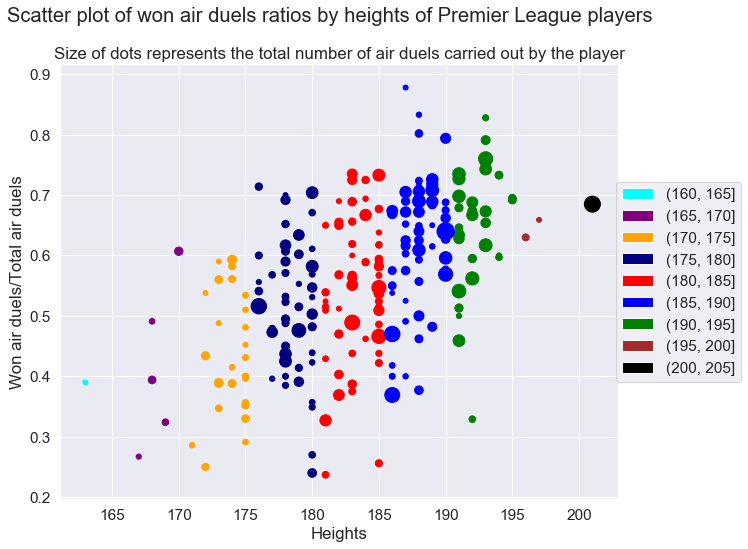

In [177]:
fig = plt.figure()
fig.set_size_inches(10, 8)
sns.set(font_scale=1.4)
bins = range(160, 206 , 5)
df.groupby(pd.cut(df.Height, bins))
colors = ['cyan', 'purple','orange', 'navy', 'red', 'blue', 'green', 'brown', 'black']
plt.scatter(df.Height, df.Rates, s = df.Air_duels*0.6, c = pd.cut(df.Height, bins).cat.codes, cmap = col.ListedColormap(colors))
recs = []
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,df.groupby(pd.cut(df.Height, bins)).indices.keys(),loc="center right", borderaxespad = -8)
plt.title('Size of dots represents the total number of air duels carried out by the player')
plt.suptitle('Scatter plot of won air duels ratios by heights of Premier League players')
plt.xlabel('Heights')
plt.ylabel('Won air duels/Total air duels')
plt.show()

As the plot shows, there's an evident relationship between the height of a player and his success ratio in air duels. Moreover, there's a clear association between the number of total air duels carried out by a player and his height (bigger dots on the right of the plot), meaning that shorter players tend not to engage in air duels, and when they do, they tend to lose them (lower succes ratios on the left side of the plot). The plot also shows that players with heights between 190cm and 195cm are the best at winning air duels on average, with success ratios higher than 60% for more than half of them

# RQ 5 - Bonus

## Validation of the relationship found between height and won air duel ratio with data from other leagues

Now we want to check if the relationship between Height and Won Air Duel Ratio found for Premier league players exists also in other championships. As for RQ 2, this comparison will be executed with the data related to Spain's Liga teams and Italy's Seriq A teams. This choice is made because they are both mediterranean countries, so we might expect that results coming from this datasets might be different from the ones coming from Premier League data. France and Germany are geographically closer to England, so differences might be less pronounced. That's only a personal choice, based on an almost objective consideration about research expectations. If results obtained from this analysis do not differ from the ones coming from Premier league's analysis, then we can infer that the relationship is general and remains valid for all leagues (at least in Europe).

### Basically, the analysis remains the same, so we won't comment the process again. Comments will be made only for the final comparison.

In [12]:
a_teams = pd.DataFrame(team[team.id == '380'])
liga_teams = pd.DataFrame(team[team.id == '724'])
a_teams = pd.DataFrame({'Name' : list(a_teams.officialName), 'ID' : list(a_teams['wyId'])})
liga_teams = pd.DataFrame({'Name' : list(liga_teams.officialName), 'ID' : list(liga_teams['wyId'])})

In [71]:
mydisplay([a_teams.head(), liga_teams.head()])

Name 
 ID 
 
 
 
 
 0 
 Società Polisportiva Ars et Labor 2013 
 3204 
 
 
 1 
 AC Milan 
 3157 
 
 
 2 
 Juventus FC 
 3159 
 
 
 3 
 AS Roma 
 3158 
 
 
 4 
 US Sassuolo Calcio 
 3315 
 
 
 
 
 
 
 Name 
 ID 
 
 
 
 
 0 
 Real Club Celta de Vigo 
 692 
 
 
 1 
 Reial Club Deportiu Espanyol 
 691 
 
 
 2 
 Deportivo Alavés 
 696 
 
 
 3 
 Levante UD 
 695 
 
 
 4 
 Getafe Club de Fútbol 
 698

In [27]:
a_players = players[players.currentTeamId.isin(a_teams.ID)]
a_players = a_players.reset_index().drop('index', axis = 1)

liga_players = players[players.currentTeamId.isin(liga_teams.ID)]
liga_players = liga_players.reset_index().drop('index', axis = 1)

In [28]:
a_heights = pd.DataFrame({'Id' : a_players.wyId, 'Name': a_players.shortName, 'Height' : a_players.height})
a_heights.head()

Id          Name  Height
0  131184     Ali Adnan     186
1     114  K. Strootman     186
2     122    D. Mertens     169
3     130    S. de Vrij     189
4     174    F. Đuričić     181

In [29]:
liga_heights = pd.DataFrame({'Id' : liga_players.wyId, 'Name': liga_players.shortName, 'Height' : liga_players.height})
liga_heights.head()

Id          Name  Height
0  32793    A. N'Diaye     187
1     33  J. Cillessen     185
2     99      P. Tytoń     194
3    151   J. Guidetti     185
4    254    R. Rosales     175

In [30]:
ita_events = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\events\events_Italy.json")

In [31]:
spa_events = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\events\events_Spain.json")

In [36]:
a_events = ita_events[ita_events.playerId.isin(a_heights.Id)]
a_events[a_events.subEventName == 'Air duel'].head()

eventId eventName    eventSec         id  matchId matchPeriod  playerId  \
32         1      Duel   90.737589  180423995  2575959          1H     21620   
33         1      Duel   90.978934  180423988  2575959          1H     20438   
93         1      Duel  282.353177  180424087  2575959          1H     20438   
94         1      Duel  282.533675  180424044  2575959          1H     21620   
186        1      Duel  551.632194  180424173  2575959          1H      3475   

                                    positions subEventId subEventName  \
32   [{'y': 77, 'x': 52}, {'y': 36, 'x': 32}]         10     Air duel   
33   [{'y': 23, 'x': 48}, {'y': 64, 'x': 68}]         10     Air duel   
93   [{'y': 22, 'x': 47}, {'y': 67, 'x': 83}]         10     Air duel   
94   [{'y': 78, 'x': 53}, {'y': 33, 'x': 17}]         10     Air duel   
186  [{'y': 26, 'x': 34}, {'y': 40, 'x': 30}]         10     Air duel   

                            tags  teamId  
32   [{'id': 701}, {'id': 1802}]    3172  
33   [{'id': 703}, {'id': 1801}]    3158  
93   [{'id': 703}, {'id': 1801}]    3158  
94   [{'id': 701}, {'id': 1802}]    3172  
186  [{'id': 703}, {'id': 1801}]    3158

In [37]:
liga_events = spa_events[spa_events.playerId.isin(liga_heights.Id)]
liga_events[liga_events.subEventName == 'Air duel'].head()

eventId eventName    eventSec         id  matchId matchPeriod  playerId  \
74         1      Duel  328.224232  180864470  2565548          1H    274435   
101        1      Duel  413.607756  180864654  2565548          1H    247220   
102        1      Duel  413.727707  180864480  2565548          1H      3277   
164        1      Duel  691.826623  180864517  2565548          1H    274435   
168        1      Duel  720.912005  180864520  2565548          1H    274435   

                                    positions subEventId subEventName  \
74    [{'y': 89, 'x': 77}, {'y': 84, 'x': 5}]         10     Air duel   
101  [{'y': 61, 'x': 91}, {'y': 51, 'x': 95}]         10     Air duel   
102    [{'y': 39, 'x': 9}, {'y': 49, 'x': 5}]         10     Air duel   
164  [{'y': 78, 'x': 63}, {'y': 47, 'x': 73}]         10     Air duel   
168  [{'y': 13, 'x': 64}, {'y': 12, 'x': 71}]         10     Air duel   

                            tags  teamId  
74   [{'id': 703}, {'id': 1801}]     682  
101  [{'id': 703}, {'id': 1801}]     695  
102  [{'id': 701}, {'id': 1802}]     682  
164  [{'id': 703}, {'id': 1801}]     682  
168  [{'id': 703}, {'id': 1801}]     682

In [42]:
liga_air_duels = liga_events[liga_events.subEventName == 'Air duel'].reset_index().drop('index', axis = 1)
liga_air_duels.head()

eventId eventName    eventSec         id  matchId matchPeriod  playerId  \
0        1      Duel  328.224232  180864470  2565548          1H    274435   
1        1      Duel  413.607756  180864654  2565548          1H    247220   
2        1      Duel  413.727707  180864480  2565548          1H      3277   
3        1      Duel  691.826623  180864517  2565548          1H    274435   
4        1      Duel  720.912005  180864520  2565548          1H    274435   

                                  positions subEventId subEventName  \
0   [{'y': 89, 'x': 77}, {'y': 84, 'x': 5}]         10     Air duel   
1  [{'y': 61, 'x': 91}, {'y': 51, 'x': 95}]         10     Air duel   
2    [{'y': 39, 'x': 9}, {'y': 49, 'x': 5}]         10     Air duel   
3  [{'y': 78, 'x': 63}, {'y': 47, 'x': 73}]         10     Air duel   
4  [{'y': 13, 'x': 64}, {'y': 12, 'x': 71}]         10     Air duel   

                          tags  teamId  
0  [{'id': 703}, {'id': 1801}]     682  
1  [{'id': 703}, {'id': 1801}]     695  
2  [{'id': 701}, {'id': 1802}]     682  
3  [{'id': 703}, {'id': 1801}]     682  
4  [{'id': 703}, {'id': 1801}]     682

In [44]:
a_air_duels = a_events[a_events.subEventName == 'Air duel'].reset_index().drop('index', axis = 1)
a_air_duels.head()

eventId eventName    eventSec         id  matchId matchPeriod  playerId  \
0        1      Duel   90.737589  180423995  2575959          1H     21620   
1        1      Duel   90.978934  180423988  2575959          1H     20438   
2        1      Duel  282.353177  180424087  2575959          1H     20438   
3        1      Duel  282.533675  180424044  2575959          1H     21620   
4        1      Duel  551.632194  180424173  2575959          1H      3475   

                                  positions subEventId subEventName  \
0  [{'y': 77, 'x': 52}, {'y': 36, 'x': 32}]         10     Air duel   
1  [{'y': 23, 'x': 48}, {'y': 64, 'x': 68}]         10     Air duel   
2  [{'y': 22, 'x': 47}, {'y': 67, 'x': 83}]         10     Air duel   
3  [{'y': 78, 'x': 53}, {'y': 33, 'x': 17}]         10     Air duel   
4  [{'y': 26, 'x': 34}, {'y': 40, 'x': 30}]         10     Air duel   

                          tags  teamId  
0  [{'id': 701}, {'id': 1802}]    3172  
1  [{'id': 703}, {'id': 1801}]    3158  
2  [{'id': 703}, {'id': 1801}]    3158  
3  [{'id': 701}, {'id': 1802}]    3172  
4  [{'id': 703}, {'id': 1801}]    3158

In [45]:
a_ad_byplayer = a_air_duels.groupby(a_air_duels.playerId).size()

a_tot_ad = pd.DataFrame({'Id' : a_ad_byplayer.keys(), 'Air_duels' : a_ad_byplayer.values})

In [46]:
liga_ad_byplayer = liga_air_duels.groupby(liga_air_duels.playerId).size()

liga_tot_ad = pd.DataFrame({'Id' : liga_ad_byplayer.keys(), 'Air_duels' : liga_ad_byplayer.values})

In [54]:
a_df = pd.merge(a_heights, a_tot_ad, how='inner')
a_air_duelers = a_df[a_df.Air_duels > 38]
print("Air Duelers: {}".format(len(a_air_duelers)), '\nAir duelers/Total Players: {}'.format(round(len(a_air_duelers)/len(a_df), 3)))

Air Duelers: 231 
Air duelers/Total Players: 0.516


In [55]:
liga_df = pd.merge(liga_heights, liga_tot_ad, how='inner')
liga_air_duelers = liga_df[liga_df.Air_duels > 38]
print("Air Duelers: {}".format(len(liga_air_duelers)), '\nAir duelers/Total Players: {}'.format(round(len(liga_air_duelers)/len(liga_df), 3)))

Air Duelers: 243 
Air duelers/Total Players: 0.534


In [57]:
a_won_airduels = a_air_duels[[{'id': 1801} in a_air_duels.tags[i] for i in range(len(a_air_duels))]]

a_won_byplayer = a_won_airduels.groupby(a_won_airduels.playerId).size()
a_won_ad = pd.DataFrame({'Id' : a_won_byplayer.keys(), 'Won_duels' : a_won_byplayer.values})

In [58]:
liga_won_airduels = liga_air_duels[[{'id': 1801} in liga_air_duels.tags[i] for i in range(len(liga_air_duels))]]

liga_won_byplayer = liga_won_airduels.groupby(liga_won_airduels.playerId).size()
liga_won_ad = pd.DataFrame({'Id' : liga_won_byplayer.keys(), 'Won_duels' : liga_won_byplayer.values})

## La Liga

In [68]:
liga_df = pd.merge(liga_air_duelers, liga_won_ad, how='inner')
liga_df['Rates'] =  round(liga_df.Won_duels/liga_df.Air_duels, 3)
mydisplay([liga_df.sort_values(by = 'Rates', ascending=False).head(),
        liga_df.sort_values(by = 'Won_duels', ascending=False).head()], names = ['<strong>''First 5 players by won air duels Rates', '<strong>''First 5 players by won air duels'])

First 5 players by won air duels Rates First 5 players by won air duels 
 
 
 
 Id 
 Name 
 Height 
 Air_duels 
 Won_duels 
 Rates 
 
 
 
 
 223 
 125250 
 Ó. Duarte 
 186 
 57 
 45 
 0.789 
 
 
 142 
 7302 
 Albentosa 
 192 
 78 
 61 
 0.782 
 
 
 25 
 3335 
 Bartra 
 184 
 81 
 63 
 0.778 
 
 
 20 
 3309 
 R. Varane 
 191 
 100 
 77 
 0.770 
 
 
 186 
 3341 
 Piqué 
 194 
 122 
 93 
 0.762 
 
 
 
 
 
 
 Id 
 Name 
 Height 
 Air_duels 
 Won_duels 
 Rates 
 
 
 
 
 47 
 3503 
 Raúl García 
 184 
 278 
 185 
 0.665 
 
 
 56 
 3605 
 Jorge Molina 
 188 
 333 
 167 
 0.502 
 
 
 240 
 228902 
 J. Calleri 
 173 
 310 
 165 
 0.532 
 
 
 69 
 3714 
 C. Stuani 
 184 
 316 
 161 
 0.509 
 
 
 127 
 5400 
 Gerard Moreno 
 180 
 332 
 159 
 0.479

## Serie A

In [70]:
a_df = pd.merge(a_air_duelers, a_won_ad, how='inner')
a_df['Rates'] =  round(a_df.Won_duels/a_df.Air_duels, 3)
mydisplay([a_df.sort_values(by = 'Rates', ascending=False).head(),
        a_df.sort_values(by = 'Won_duels', ascending=False).head()], names = ['<strong>''First 5 players by won air duels Rates', '<strong>''First 5 players by won air duels'])

First 5 players by won air duels Rates First 5 players by won air duels 
 
 
 
 Id 
 Name 
 Height 
 Air_duels 
 Won_duels 
 Rates 
 
 
 
 
 23 
 3463 
 F. Fazio 
 195 
 232 
 196 
 0.845 
 
 
 44 
 7858 
 B. Sagna 
 176 
 42 
 34 
 0.810 
 
 
 211 
 25849 
 F. Ghoulam 
 188 
 40 
 32 
 0.800 
 
 
 121 
 20635 
 F. Acerbi 
 192 
 169 
 131 
 0.775 
 
 
 129 
 20723 
 B. Salamon 
 196 
 82 
 63 
 0.768 
 
 
 
 
 
 
 Id 
 Name 
 Height 
 Air_duels 
 Won_duels 
 Rates 
 
 
 
 
 191 
 22933 
 L. Pavoletti 
 188 
 430 
 251 
 0.584 
 
 
 23 
 3463 
 F. Fazio 
 195 
 232 
 196 
 0.845 
 
 
 51 
 8327 
 E. Džeko 
 193 
 227 
 149 
 0.656 
 
 
 181 
 22163 
 S. Missiroli 
 191 
 243 
 147 
 0.605 
 
 
 133 
 86328 
 G. Pezzella 
 186 
 192 
 140 
 0.729

Serie A player Fazio is a solid air dueler, given that he covers first place in rate of won air duels sorted dataframe and the second place in the total number of won air duels sorted dataframe. This means that he engages in many air duels, and wins most of them. No other player in the other two leagues had such solid results, but that's not crucial to our analysis. It is worth to note that he is very tall too, with a well over the average height of 195cm. This gives us a hint that his height conditions his results in air duels, suggesting that the relationship between height and won air duels still exists outside the Britannic borders.

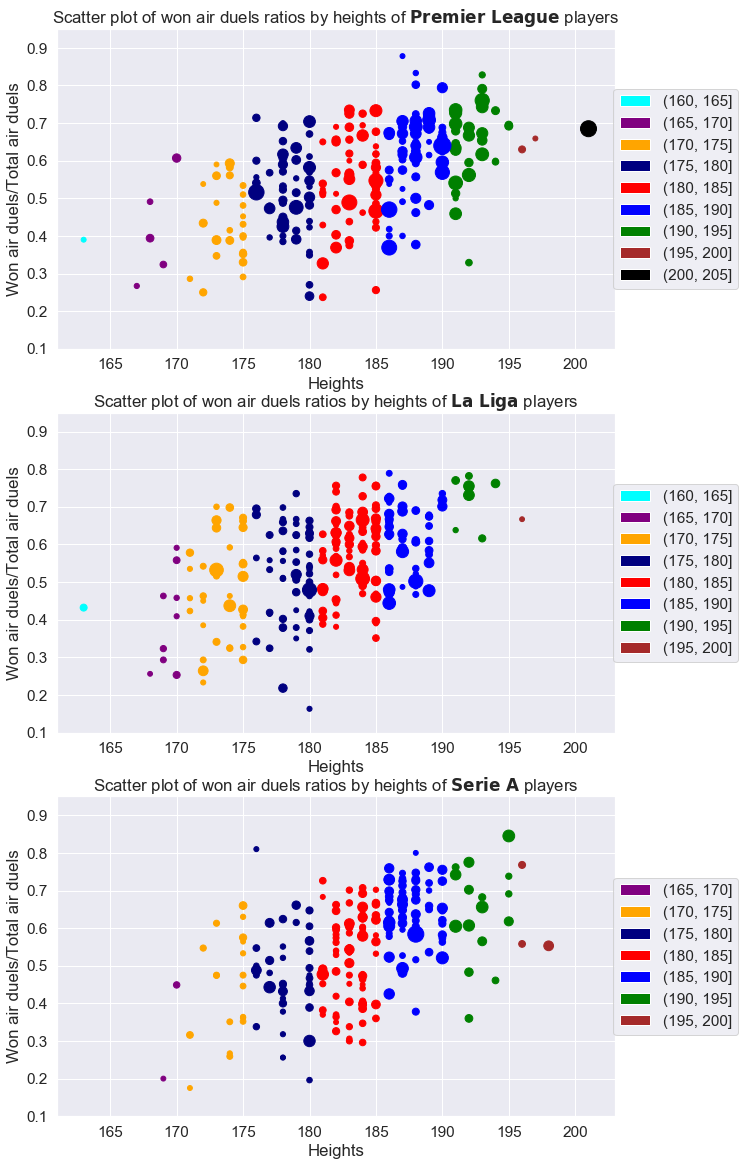

In [120]:
fig = plt.figure()
fig.set_size_inches(10, 20)
sns.set(font_scale=1.4)
bins = range(160, 206 , 5)

ax = fig.add_subplot(3,1,1)
pl_df.groupby(pd.cut(pl_df.Height, bins))
colors = ['cyan', 'purple','orange', 'navy', 'red', 'blue', 'green', 'brown', 'black']
plt.scatter(pl_df.Height, pl_df.Rates, s = pl_df.Air_duels*0.6, c = pd.cut(pl_df.Height, bins).cat.codes, cmap = col.ListedColormap(colors))
recs = []
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,pl_df.groupby(pd.cut(pl_df.Height, bins)).indices.keys(),loc="center right", borderaxespad = -8)
plt.title('Scatter plot of won air duels ratios by heights of '+ r"$\bf{Premier\ League}$" + ' players')
plt.xlabel('Heights')
plt.ylabel('Won air duels/Total air duels')
plt.xlim([161,203])
plt.ylim([0.1, 0.95])

ax = fig.add_subplot(3,1,2)
liga_df.groupby(pd.cut(liga_df.Height, bins))
colors = ['cyan', 'purple','orange', 'navy', 'red', 'blue', 'green', 'brown']
plt.scatter(liga_df.Height, liga_df.Rates, s = liga_df.Air_duels*0.6, c = pd.cut(liga_df.Height, bins).cat.codes, cmap = col.ListedColormap(colors))
recs = []
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,liga_df.groupby(pd.cut(liga_df.Height, bins)).indices.keys(),loc="center right", borderaxespad = -8)
plt.title('Scatter plot of won air duels ratios by heights of '+ r"$\bf{La\ Liga}$" + ' players')
plt.xlabel('Heights')
plt.ylabel('Won air duels/Total air duels')
plt.xlim([161,203])
plt.ylim([0.1, 0.95])

ax = fig.add_subplot(3,1,3)
a_df.groupby(pd.cut(a_df.Height, bins))
colors = ['purple','orange', 'navy', 'red', 'blue', 'green', 'brown']
plt.scatter(a_df.Height, a_df.Rates, s = a_df.Air_duels*0.6, c = pd.cut(a_df.Height, bins).cat.codes, cmap = col.ListedColormap(colors))
recs = []
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,a_df.groupby(pd.cut(a_df.Height, bins[1:])).indices.keys(),loc="center right", borderaxespad = -8)
plt.title('Scatter plot of won air duels ratios by heights of '+ r"$\bf{Serie\ A}$" + ' players')
plt.xlabel('Heights')
plt.ylabel('Won air duels/Total air duels')
plt.xlim([161,203])
plt.ylim([0.1, 0.95])
plt.show()

### The three plots confirm the relationship that was found for Premier League players, with almost the same results. The "best" height class is confirmed to be (190, 195], that contains players who are better in average at air duels than players in other height classes. Also, the size of the dots shows again that the number of total air duels engaged by a player is dependent with his height, although this relationship is not strong For La Liga players. In fact, in that plot appears to be another class of players often engaging air duels, which is the yellow one (between 170 and 175cm). That class is not particularly strong in the other two leagues, so it must be a peculiar feature of the Spanish first division. This doesn't affect our conclusions about the rate of won air duels, which is confirmed to be in a strong relationship with the height of a player. 

In [1]:
import datetime as DT
import io
import numpy as np
import json
import pandas as pd
import requests
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
players=pd.read_json(r'C:\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw2\players.json')
players.head()

passportArea  weight  \
0  {'name': 'Turkey', 'id': '792', 'alpha3code': ...      78   
1  {'name': 'Senegal', 'id': '686', 'alpha3code':...      73   
2  {'name': 'France', 'id': '250', 'alpha3code': ...      72   
3  {'name': 'Senegal', 'id': '686', 'alpha3code':...      82   
4  {'name': 'France', 'id': '250', 'alpha3code': ...      84   

           firstName middleName     lastName currentTeamId   birthDate  \
0              Harun                   Tekin          4502  1989-06-17   
1             Malang                    Sarr          3775  1999-01-23   
2               Over                Mandanda          3772  1998-10-26   
3  Alfred John Momar                 N'Diaye           683  1990-03-06   
4           Ibrahima             Konat\u00e9          2975  1999-05-25   

   height                                               role  \
0     187  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
1     182  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
2     176  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
3     187  {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...   
4     192  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   

                                           birthArea    wyId   foot  \
0  {'name': 'Turkey', 'id': '792', 'alpha3code': ...   32777  right   
1  {'name': 'France', 'id': '250', 'alpha3code': ...  393228   left   
2  {'name': 'France', 'id': '250', 'alpha3code': ...  393230          
3  {'name': 'France', 'id': '250', 'alpha3code': ...   32793  right   
4  {'name': 'France', 'id': '250', 'alpha3code': ...  393247  right   

        shortName currentNationalTeamId  
0        H. Tekin                  4687  
1         M. Sarr                  4423  
2     O. Mandanda                  null  
3      A. N'Diaye                 19314  
4  I. Konat\u00e9                  null

In [3]:
#Dropping unnecessary columns
players_imp=players.drop(columns=['passportArea','weight','firstName','middleName','lastName','currentTeamId','height','role','birthArea','wyId','foot','currentNationalTeamId'])
players_imp
players_shortname=players_imp.drop(columns=['birthDate'])
players_shortname

shortName
0            H. Tekin
1             M. Sarr
2         O. Mandanda
3          A. N'Diaye
4      I. Konat\u00e9
...               ...
3598  A. Ma\u00e2loul
3599   C. C\u00e1ceda
3600        M. Araujo
3601     A. Tagnaouti
3602         R. Avila

[3603 rows x 1 columns]

In [4]:
players_imp

birthDate        shortName
0     1989-06-17         H. Tekin
1     1999-01-23          M. Sarr
2     1998-10-26      O. Mandanda
3     1990-03-06       A. N'Diaye
4     1999-05-25   I. Konat\u00e9
...          ...              ...
3598  1990-01-01  A. Ma\u00e2loul
3599  1991-09-27   C. C\u00e1ceda
3600  1994-10-24        M. Araujo
3601  1996-04-05     A. Tagnaouti
3602  1997-02-04         R. Avila

[3603 rows x 2 columns]

In [5]:
# calculating age of the players
import datetime as DT
players_imp['age']=pd.to_datetime(players_imp['birthDate'], errors='coerce')
now = pd.to_datetime('now')
now=(now - players_imp['age']).astype('<m8[Y]') 
age=now.astype(int)
age=pd.DataFrame(age)
age

age
0      30
1      20
2      21
3      29
4      20
...   ...
3598   29
3599   28
3600   25
3601   23
3602   22

[3603 rows x 1 columns]

In [6]:
players_age=pd.concat([players_shortname,age],axis=1)
players_age

shortName  age
0            H. Tekin   30
1             M. Sarr   20
2         O. Mandanda   21
3          A. N'Diaye   29
4      I. Konat\u00e9   20
...               ...  ...
3598  A. Ma\u00e2loul   29
3599   C. C\u00e1ceda   28
3600        M. Araujo   25
3601     A. Tagnaouti   23
3602         R. Avila   22

[3603 rows x 2 columns]

#### Calculating the median age of the players

In [7]:
med_age=players_age.age.median()
med_age

27.0

#### Boxplot visualization

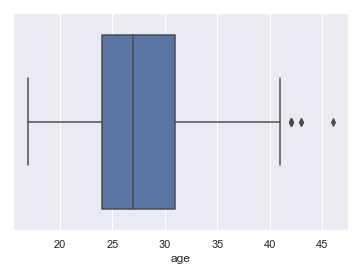

In [8]:
sns.set(style="darkgrid")
boxplot = sns.boxplot(x="age", data=players_age)
boxplot

#### Frequency of players with different ages

In [9]:
table_freq=players_age.groupby('age').size()
#table-freq=table_freq.reset_index(drop=True)
df= pd.DataFrame(table_freq)
serial_no=list(range(14))
df=df.reset_index()
df.columns=['age','frequency']
df.head()

age  frequency
0   17          3
1   18         19
2   19         64
3   20        150
4   21        188

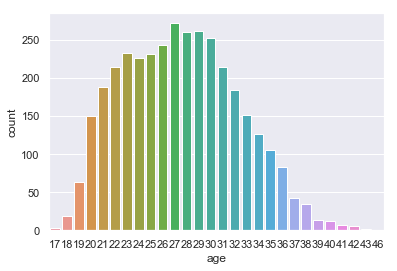

In [10]:
sns.set(style="darkgrid")
ax = sns.countplot(x="age", data=players_age)
plt.show()

In [11]:
player_eff=pd.read_json(r'C:\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw2\final_player_ratio.json')
player_eff


birthDate  PlayerId          shortName  AccuratePassesNumber  \
0    1989-03-02        36    T. Alderweireld                   598   
1    1987-04-24        48      J. Vertonghen                  1129   
2    1992-02-14        54         C. Eriksen                   869   
3    1993-07-28      8717            H. Kane                   246   
4    1990-09-19      8945        K. Trippier                   601   
..          ...       ...                ...                   ...   
236  1988-07-11     25798          E. Capoue                   196   
237  1991-02-02      3351  Kiko Femen\u00eda                   547   
238  1989-07-22       160         D. Janmaat                   161   
239  1989-08-12      7929       T. Cleverley                   830   
240  1993-01-01     28292   A. Doucour\u00e9                  1010   

     Efficiency  TotalPassesNumber  
0      0.665924                898  
1      0.476371               2370  
2      0.395719               2196  
3      0.414141                594  
4      0.458429               1311  
..          ...                ...  
236    0.236429                829  
237    0.649644                842  
238    0.195864                822  
239    0.767808               1081  
240    0.463728               2178  

[241 rows x 6 columns]

In [12]:
player_ex_dob=player_eff.drop(columns=['birthDate'])
player_ex_dob

PlayerId          shortName  AccuratePassesNumber  Efficiency  \
0          36    T. Alderweireld                   598    0.665924   
1          48      J. Vertonghen                  1129    0.476371   
2          54         C. Eriksen                   869    0.395719   
3        8717            H. Kane                   246    0.414141   
4        8945        K. Trippier                   601    0.458429   
..        ...                ...                   ...         ...   
236     25798          E. Capoue                   196    0.236429   
237      3351  Kiko Femen\u00eda                   547    0.649644   
238       160         D. Janmaat                   161    0.195864   
239      7929       T. Cleverley                   830    0.767808   
240     28292   A. Doucour\u00e9                  1010    0.463728   

     TotalPassesNumber  
0                  898  
1                 2370  
2                 2196  
3                  594  
4                 1311  
..                 ...  
236                829  
237                842  
238                822  
239               1081  
240               2178  

[241 rows x 5 columns]

In [13]:
player_eff['age'] = pd.to_datetime(player_eff['birthDate'], errors='coerce')
now = pd.to_datetime('now')
now=(now - player_eff['age']).astype('<m8[Y]') 
age=now.astype(int)
age=pd.DataFrame(age)
age

age
0     30
1     32
2     27
3     26
4     29
..   ...
236   31
237   28
238   30
239   30
240   26

[241 rows x 1 columns]

In [14]:
players_age_eff=pd.concat([player_ex_dob,age],axis=1).drop(columns=['Efficiency'])
players_age_eff

PlayerId          shortName  AccuratePassesNumber  TotalPassesNumber  age
0          36    T. Alderweireld                   598                898   30
1          48      J. Vertonghen                  1129               2370   32
2          54         C. Eriksen                   869               2196   27
3        8717            H. Kane                   246                594   26
4        8945        K. Trippier                   601               1311   29
..        ...                ...                   ...                ...  ...
236     25798          E. Capoue                   196                829   31
237      3351  Kiko Femen\u00eda                   547                842   28
238       160         D. Janmaat                   161                822   30
239      7929       T. Cleverley                   830               1081   30
240     28292   A. Doucour\u00e9                  1010               2178   26

[241 rows x 5 columns]

# Research Question: Does age group influence acuracy:

#### dividing the player with respect to the age groups

In [15]:
# Age group 20.5-25.5
table1= players_age_eff.query('20.5<=age<=25.5')
table1.head()

PlayerId        shortName  AccuratePassesNumber  TotalPassesNumber  age
6     210044          E. Dier                  1073               2147   25
7      13484          D. Alli                   451               1184   23
11    240070         H. Winks                   568                628   23
12    257762  D. S\u00e1nchez                   617               1803   23
46    247248         S. March                   336                689   25

In [16]:
# Age group 25.5-30.5
table2=players_age_eff.query('25.5<=age<=30.5')
table2

PlayerId          shortName  AccuratePassesNumber  TotalPassesNumber  age
0          36    T. Alderweireld                   598                898   30
2          54         C. Eriksen                   869               2196   27
3        8717            H. Kane                   246                594   26
4        8945        K. Trippier                   601               1311   29
8       14911      Son Heung-Min                   363                938   27
..        ...                ...                   ...                ...  ...
232     20593         R. Pereyra                   248                682   28
237      3351  Kiko Femen\u00eda                   547                842   28
238       160         D. Janmaat                   161                822   30
239      7929       T. Cleverley                   830               1081   30
240     28292   A. Doucour\u00e9                  1010               2178   26

[134 rows x 5 columns]

In [17]:
# Age group 30.5-35.5
table3=players_age_eff.query('30.5<=age<=35.5')
table3.head()

PlayerId             shortName  AccuratePassesNumber  TotalPassesNumber  \
1         48         J. Vertonghen                  1129               2370   
5      11152  M. Demb\u00e9l\u00e9                   558               1365   
9      25381             H. Lloris                   347                815   
18      8433               S. Ward                   412                999   
21     70092             S. Defour                   684               1019   

    age  
1    32  
5    32  
9    32  
18   34  
21   31

In [18]:
s11=table1['AccuratePassesNumber'].sum()
s12=table1['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 20.5-25.5
s13=s12-s11
#The list contains total number of inaccurate passes and inaccurate passes
L1=list([round(s11/len(table1)),round(s13/len(table1))])
L1

[401.0, 579.0]

In [19]:
s21=table2['AccuratePassesNumber'].sum()
s22=table2['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 25.5-30.5
s23=s22-s21
#The list contains total number of inaccurate passes and inaccurate passes
L2=list([round(s21/len(table2)),round(s23/len(table2))])
L2

[475.0, 633.0]

In [20]:
s31=table3['AccuratePassesNumber'].sum()
s32=table3['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 30.5-35.5
s33=s32-s31
#The list contains total number of inaccurate passes and inaccurate passes
L3=list([round(s31/len(table3)),round(s33/len(table3))])
L3

[551.0, 617.0]

In [21]:
table=[L1,L2,L3]
table

[[401.0, 579.0], [475.0, 633.0], [551.0, 617.0]]

In [22]:
# Generating the contingency table
data = [['20.5-25.5', *L1], ['25.5-30.5', *L2], ['30.5-35.5', *L3]] 
df_data = pd.DataFrame(data, columns = ['Age_group', 'Average accurate passes','Average inaccurate passes'])
df_data = df_data.set_index(df_data.Age_group).drop('Age_group', axis = 1)

### Chi-Squared Test 
A chi-squared test with significance level $\alpha = 0.05$ will now be performed on the above contingency table.

H0 : The null Hypothesis is that there's no statistically significant relationship between age of the players and the efficiency of the players 

H1: The alternative hypotesis is that there's significant relationship between age of the players and the efficiency of the players.

In [23]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
[[429.502457  550.497543 ]
 [485.6007371 622.3992629]
 [511.8968059 656.1031941]]
probability=0.950, critical=5.991, stat=9.097
Dependent (reject H0)
significance=0.050, p=0.011
Dependent (reject H0)


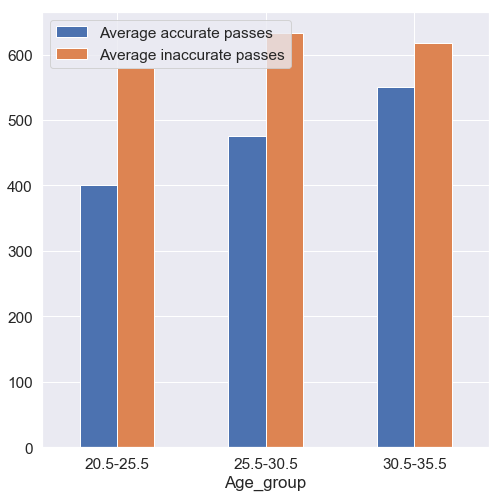

In [24]:
sns.set(font_scale=1.4)
df_data.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
plt.xticks(rotation=0)
plt.show()

#### Consider the level of significance $\alpha$ be 0.05. From the chi square test, we observe that the p-value is 0.001. Which is indeed less than the level of significance $\alpha$. As, $p<\alpha$, we reject the null hypothesis and can claim that there is significant statistical relationship between the age of a player and his efficiency. In particular, the barplot shows that accuracy increases with age, suggesting that years of experience influence the accuracy of players.

# CRQ1

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

CRQ1 was performed over premier league

In [103]:
df = pd.read_json('events_England.json')

### Cleaning data

Informetion about goals is stored in de column 'tags', the element stored them are lists of dictionaries. In order to performe our analisy we break the list and than we break the dictionary.

In [104]:
df.head()

eventId eventName   eventSec         id  matchId matchPeriod  playerId  \
0        8      Pass   2.758649  177959171  2499719          1H     25413   
1        8      Pass   4.946850  177959172  2499719          1H    370224   
2        8      Pass   6.542188  177959173  2499719          1H      3319   
3        8      Pass   8.143395  177959174  2499719          1H    120339   
4        8      Pass  10.302366  177959175  2499719          1H    167145   

                                  positions subEventId subEventName  \
0  [{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]         85  Simple pass   
1  [{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]         83    High pass   
2  [{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]         82    Head pass   
3  [{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]         82    Head pass   
4  [{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]         85  Simple pass   

             tags  teamId  
0  [{'id': 1801}]    1609  
1  [{'id': 1801}]    1609  
2  [{'id': 1801}]    1609  
3  [{'id': 1801}]    1609  
4  [{'id': 1801}]    1609

In [105]:
df = pd.concat([df,pd.DataFrame(list(df['tags']))],axis = 1).drop('tags',axis = 1)  # breack the lists inside a tags column

df = df.rename(columns = {0: 'tag0', 1: 'tag1', 2: 'tag2', 3: 'tag3', 4: 'tag4', 5: 'tag5'}) #rename the new columns

#information about goals is stored in column 'tag0', so i remove the columns 'tag1' and above
for value in df.columns[12:]:       
    df = df.drop(value, axis = 1)

# Now some elements are setted as None, i replace it with the value 0 than i drop thata row
df = df.replace([None], 0)   # replacement
df = df[(df.tag0 != 0)]   # drop row
df = df.reset_index(drop = True)

# te elements of column 'tag0' are dictionarie {'id': tag_value}. break it mean create a new column named 'id'.
# There is already a column called 'id', where are stored unique value that identify the events. 
# We change its name to 'unicEventId'
df = df.rename(columns = {'id': 'unicEventId' }) 

df = pd.concat([df, pd.DataFrame(list(df.tag0))], axis = 1).drop('tag0', axis = 1) # breack the dictionaries

In [106]:
df.head()

eventId eventName   eventSec  unicEventId  matchId matchPeriod  playerId  \
0        8      Pass   2.758649    177959171  2499719          1H     25413   
1        8      Pass   4.946850    177959172  2499719          1H    370224   
2        8      Pass   6.542188    177959173  2499719          1H      3319   
3        8      Pass   8.143395    177959174  2499719          1H    120339   
4        8      Pass  10.302366    177959175  2499719          1H    167145   

                                  positions subEventId subEventName  teamId  \
0  [{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]         85  Simple pass    1609   
1  [{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]         83    High pass    1609   
2  [{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]         82    Head pass    1609   
3  [{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]         82    Head pass    1609   
4  [{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]         85  Simple pass    1609   

     id  
0  1801  
1  1801  
2  1801  
3  1801  
4  1801

### barplot with the absolute frequency of goals in all the time slots.

Now we can select all the goal events, they are cassifide with 'id' = 101. Every goals is stored doubles in the dataframe, becouse of a single goal event is seen by point of view of the goal keeper and the attaker. If the goal keeper performe a save attempt  and fail it,  its a goal. This event is stored with 'id' = 101 and 'eventId' = 9

In [107]:
# we create two data frame, one for the first half and another for the second half.
# H1_Goals stored all the goal during the first half of the match, cleaned from the doubles. Similary for H2_Goals

H1_Goals = df[(df.id == 101) & (df.eventId != 9) & (df.matchPeriod == '1H')] 
H2_Goals = df[(df.id == 101) & (df.eventId != 9) & (df.matchPeriod == '2H')]

H1 = []  # will be stored all goals performed in each intervals
for i in range(5):
    # count the goals performed in each interval
    H1.append(len(H1_Goals[(H1_Goals.eventSec >= i*60*9) & (H1_Goals.eventSec < (i+1)*60*9)])) 
    
H1.append(len(H1_Goals[H1_Goals.eventSec >= 45*60])) # count the goal performed during the stoppage time


H2 = [] # similary to H1
for i in range(5):
    # count the goals performed in each interval
    H2.append(len(H2_Goals[(H2_Goals.eventSec >= i*60*9) & (H2_Goals.eventSec < (i+1)*60*9)])) 
    
H2.append(len(H2_Goals[H2_Goals.eventSec >= 45*60])) # count the goal performed during the stoppage time

we make a double bar plot in order to compare the Goals performed during each half time

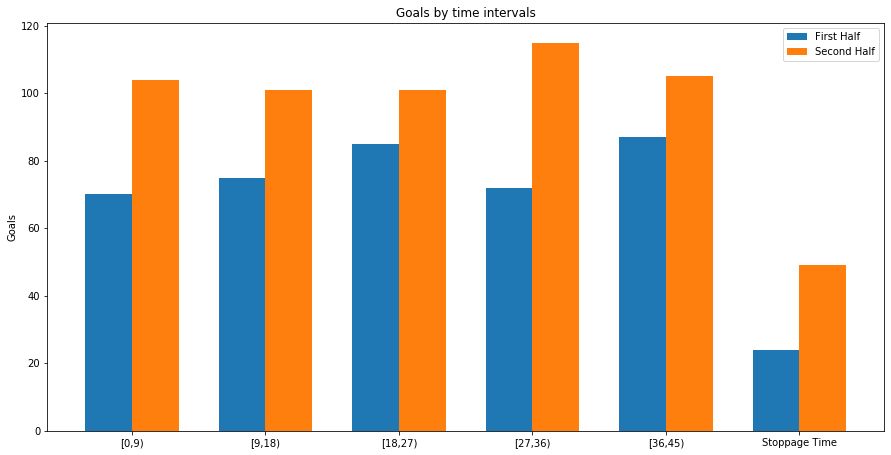

In [108]:
# The plot
labels = ['[0,9)', '[9,18)', '[18,27)', '[27,36)', '[36,45)', 'Stoppage Time']
w = 0.35

plot = plt.subplot()
fig =plt.gcf()
fig.set_size_inches(15, 7.5)
plot1 = plot.bar(np.arange(len(labels)) - w/2 , H1, w, label = 'First Half')
plot2 = plot.bar(np.arange(len(labels)) + w/2 , H2, w, label = 'Second Half')

plot.set_ylabel('Goals')
plot.set_title('Goals by time intervals')
plot.set_xticks(np.arange(len(labels)))
plot.set_xticklabels(labels)
plot.legend()

### Find the top 10 teams that score the most in the interval "81-90"

In order to finde the top 10 team who score the mosts in the interva [81-90], we select all the goals that fall in this amount of  time from 'H2_Goals', and we store it in a new data frame called 'interva'. After calculate the ammount of goal performed by a team we stor it and the team id in a new dataframe called 'scores'.

In [109]:
interval = H2_Goals[(H2_Goals['eventSec'] >= 60*36) & (H2_Goals['eventSec'] <= 60*45)]

scores = pd.DataFrame() # will be store the team id and the number of goals performed
Teams = pd.read_json('../teams.json')

for value in set(interval.teamId):
    team = list(Teams[Teams.wyId == value].name)[0]
    # we store the team id, the team name, and its score 
    scores = pd.concat([scores, pd.DataFrame([[value, team, len(interval[interval.teamId == value])]])], axis = 0)
    
scores = scores.rename(columns = {0: 'teamId', 1: 'Team', 2 : 'Goals'}) 
scores = scores.sort_values(['Goals'], ascending= False) # we organize the team in descending order
scores = scores.reset_index(drop = True)

In [110]:
scores[:10] # we print the top 10 teams that score the most in the interval "81-90"

teamId               Team  Goals
0    1625    Manchester City     13
1    1609            Arsenal     11
2    1610            Chelsea      9
3    1611  Manchester United      9
4    1612          Liverpool      7
5    1644            Watford      7
6    1628     Crystal Palace      7
7    1633    West Ham United      6
8    1624  Tottenham Hotspur      5
9    1659    AFC Bournemouth      5

### Show if there are players that were able to score at least one goal in 8 different intervals

We collect the id of the players who performed goals in a set. We scroll throu the set and for each player whe caount in how many intervals he performed a goal, if the number of intervals is eight or above we score the value and the player id in a dataframe called Players  

In [111]:
Players = pd.DataFrame() # will be stored the player 

all_Team = set(df[(df.id == 101) & (df.eventId != 9)].playerId) # are stored the id of the player who performed a goal
all_Players = pd.read_json('../players.json')

for value in all_Team:
    
    Ser1 = H1_Goals[H1_Goals.playerId == value] # the goal performed by a player during the first half
    Ser2 = H2_Goals[H2_Goals.playerId == value] # the goal performed by a player during the second half
    
    count = 0 # counter of the number of intervals of time in wich goals are performend by the player
     
    for i in range(5):
        
        if len(Ser1[(Ser1.eventSec >= i*60*9) & (Ser1.eventSec < (i + 1)*60*9)]) != 0: # check the first half
            count += 1
        if len(Ser2[(Ser2.eventSec >= i*60*9) & (Ser2.eventSec < (i + 1)*60*9)]) != 0: # check the second half
            count += 1
    if any(Ser1.eventSec > 45*60): # check the first half (stoppage time)
        count += 1
    if any(Ser2.eventSec > 45*60): # check the second half (stoppage time)
        count += 1
    if count >= 8:                                          # we replace the special character
        player_name = list(all_Players[all_Players.wyId == value].shortName)[0].encode('ascii').decode('unicode escape')
        Players = pd.concat([Players, pd.DataFrame([[value, player_name, count]])], axis = 0) #store the player id and its name
                            
Players = Players.rename(columns = {0 : 'playerId', 1 : 'shortName', 2: 'Goals'})
Players = Players.sort_values('Goals', ascending = False)
Players = Players.reset_index(drop = True)

In [112]:
Players # we print players that were able to score at least one goal in 8 different intervals

playerId        shortName  Goals
0       8717          H. Kane     11
1      12829         J. Vardy     11
2     120353    Mohamed Salah     11
3      11066      R. Sterling     11
4      26150        R. Mahrez      9
5       7905        R. Lukaku      9
6       3324    Álvaro Morata      9
7     340386    Gabriel Jesus      9
8       8422          W. Zaha      8
9      25413     A. Lacazette      8
10     14703    M. Arnautović      8
11     15808  Roberto Firmino      8

# CRQ 2

To visualize movements and passes of a player on the pitch, I will take the code for drawing a football pitch from **[Towards Data Science](https://towardsdatascience.com/advanced-sports-visualization-with-pandas-matplotlib-and-seaborn-9c16df80a81b)**, and apply some small changes to enhance the result

In [48]:

def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = True, color = (0.3, 1, 0, .2))
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False, color = 'white')
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False, color = 'white')
    midline = ConnectionPatch([60,0], [60,80], "data", "data",  color = 'white')

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False, color = 'white')
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False, color = 'white')


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="white", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="white")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="white")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="white")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="white")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="white")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

In [49]:
events = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\events\events_Spain.json")
events = events.drop(['eventSec', 'id', 'matchPeriod', 'subEventId', 'subEventName', 'teamId'], axis = 1)

In [50]:
Spa_match = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\matches\matches_Spain.json")

Retrieving the match on which we want to elaborate the analysis from the dpsin mstches database. We need the match wyId to retrieve corresponding event information from the events database

In [51]:
Spa_match[Spa_match.label == 'Barcelona - Real Madrid, 2 - 2']

competitionId                             date              dateutc  \
23            795  May 6, 2018 at 8:45:00 PM GMT+2  2018-05-06 18:45:00   

   duration  gameweek                           label  \
23  Regular        36  Barcelona - Real Madrid, 2 - 2   

                                             referees  roundId  seasonId  \
23  [{'refereeId': 378950, 'role': 'referee'}, {'r...  4406122    181144   

    status                                          teamsData     venue  \
23  Played  {'675': {'scoreET': 0, 'coachId': 275283, 'sid...  Camp Nou   

    winner     wyId  
23       0  2565907

In [52]:
match_Id = Spa_match[Spa_match.label == 'Barcelona - Real Madrid, 2 - 2'].wyId.iloc[0]

In [53]:
Bar_ReM = events[events.matchId == match_Id]

In [54]:
Bar_ReM.head()

eventId eventName  matchId  playerId  \
593455        8      Pass  2565907      3321   
593456        8      Pass  2565907     14723   
593457        8      Pass  2565907      3306   
593458        8      Pass  2565907      3309   
593459        8      Pass  2565907      3915   

                                       positions            tags  
593455  [{'y': 49, 'x': 50}, {'y': 40, 'x': 37}]  [{'id': 1801}]  
593456  [{'y': 40, 'x': 37}, {'y': 23, 'x': 30}]  [{'id': 1801}]  
593457  [{'y': 23, 'x': 30}, {'y': 57, 'x': 26}]  [{'id': 1801}]  
593458   [{'y': 57, 'x': 26}, {'y': 40, 'x': 8}]  [{'id': 1801}]  
593459   [{'y': 40, 'x': 8}, {'y': 14, 'x': 11}]  [{'id': 1801}]

We want to visualize with a heatmap the activity areas of Cristiano Ronaldo and Lionel Messi on the pitch during this match, so we need to retrieve their player Id's.

In [55]:
players = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\players.json")

To be sure to find them, we'll search the database by their last names, which I found on Wikipedia.

In [56]:
# Messi
players[players.lastName == 'Messi Cuccittini']

birthArea   birthDate  \
207  {'name': 'Argentina', 'id': '32', 'alpha3code'...  1987-06-24   

    currentNationalTeamId currentTeamId           firstName  foot  height  \
207                 12274           676  Lionel Andr\u00e9s  left     170   

             lastName middleName  \
207  Messi Cuccittini              

                                          passportArea  \
207  {'name': 'Spain', 'id': '724', 'alpha3code': '...   

                                                  role shortName  weight  wyId  
207  {'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...  L. Messi      72  3359

In [57]:
# Ronaldo
players[players.lastName == 'dos Santos Aveiro']

birthArea   birthDate  \
185  {'name': 'Portugal', 'id': '620', 'alpha3code'...  1985-02-05   

    currentNationalTeamId currentTeamId          firstName   foot  height  \
185                  9905          3159  Cristiano Ronaldo  right     187   

              lastName middleName  \
185  dos Santos Aveiro              

                                          passportArea  \
185  {'name': 'Portugal', 'id': '620', 'alpha3code'...   

                                                  role          shortName  \
185  {'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...  Cristiano Ronaldo   

     weight  wyId  
185      83  3322

## Ronaldo

In [58]:
Ron = players[players.lastName == 'dos Santos Aveiro'].wyId.iloc[0]

Extracting the activity information related to Ronaldo from the Events database

In [59]:
Ron_ev = Bar_ReM[Bar_ReM.playerId == Ron]

Of all the events, we only want to select passes, shoots, duels and free kicks

In [60]:
Ron_act = Ron_ev[Ron_ev.eventName.isin(['Pass', 'Shot', 'Duel', 'Free Kick'])]

In [61]:
Ron_act.head()

eventId eventName  matchId  playerId  \
593473        1      Duel  2565907      3322   
593475        1      Duel  2565907      3322   
593497        1      Duel  2565907      3322   
593552        1      Duel  2565907      3322   
593554        8      Pass  2565907      3322   

                                        positions  \
593473   [{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]   
593475   [{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]   
593497   [{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]   
593552    [{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]   
593554  [{'y': 8, 'x': 97}, {'y': 100, 'x': 100}]   

                                            tags  
593473               [{'id': 702}, {'id': 1801}]  
593475               [{'id': 701}, {'id': 1802}]  
593497               [{'id': 701}, {'id': 1802}]  
593552  [{'id': 502}, {'id': 703}, {'id': 1801}]  
593554  [{'id': 401}, {'id': 801}, {'id': 1802}]

With a quick glance, we see that the position indicators have two coordinates (x,y), both ranging between 0 and 100. Since length and width of a football pitch should be different, and in our scaled-down version of the pitch we have set the width $"x"$ (long edge) at 120, and the heigth $"y"$ (short edge) at 80, position coordinates from the dataframe must be rescaled.

Moreover, since we have two position values for each event, i.e. the starting and ending point, we must select only the first values, because those are the positions of the player during the game. 

In [62]:
Ron_pos = Ron_act.positions

In [63]:
Ron_pos = [Ron_pos.iloc[i][0] for i in range(len(Ron_pos))]

Assigning $"y"$ and $"x"$ coordinates to two different lists, and rescaling values as above said.

In [64]:
y_coord_Ron = [Ron_pos[i]['y']*80/100 for i in range(len(Ron_pos))]

In [65]:
x_coord_Ron = [Ron_pos[i]['x']*120/100 for i in range(len(Ron_pos))]

In [66]:
pd.DataFrame({'y': y_coord_Ron, 'x': x_coord_Ron}).head()

y      x
0  15.2   58.8
1  13.6   58.8
2  10.4   78.0
3   9.6  111.6
4   6.4  116.4

### Plotting the heatmap

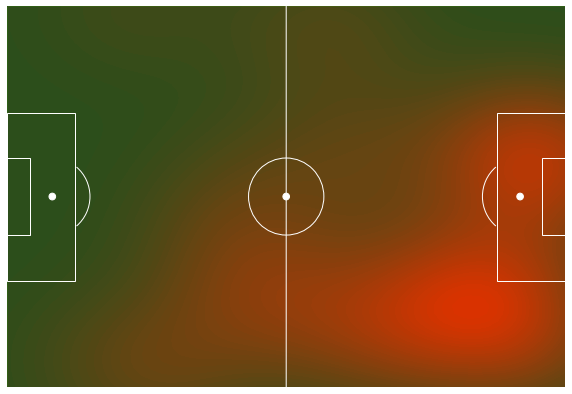

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.kdeplot(x_coord_Ron, y_coord_Ron,  cmap = sns.dark_palette("red", as_cmap = True),  n_levels=60, shade=True)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.show()
plt.close()

#### The heatmap shows that Ronaldo was active mostly on the right wing and in front of the net

## Messi

In [68]:
Mes = players[players.lastName == 'Messi Cuccittini'].wyId.iloc[0]

Extracting the activity information related to Messi from the Events database

In [69]:
Mes_ev = Bar_ReM[Bar_ReM.playerId == Mes]

Of all the events, we only want to select passes, shoots, duels and free kicks

In [70]:
Mes_act = Mes_ev[Mes_ev.eventName.isin(['Pass', 'Shot', 'Duel', 'Free Kick'])]

Same as above, we must rescale the coordinates and select only the first values in Positions, to have the positions of Messi on our pitch.

In [74]:
Mes_pos = Mes_act.positions
Mes_pos = [Mes_pos.iloc[i][0] for i in range(len(Mes_pos))]

y_coord_Mes = [Mes_pos[i]['y']*80/100 for i in range(len(Mes_pos))]

x_coord_Mes = [Mes_pos[i]['x']*120/100 for i in range(len(Mes_pos))]

pd.DataFrame({'y': y_coord_Mes, 'x': x_coord_Mes}).tail()

y      x
87  60.8  100.8
88  57.6  115.2
89  66.4   52.8
90   6.4   52.8
91  37.6   46.8

Messi has accomplished more than twice the actions of Cristiano Ronaldo. Good job, Leo!

### Plotting the heatmap

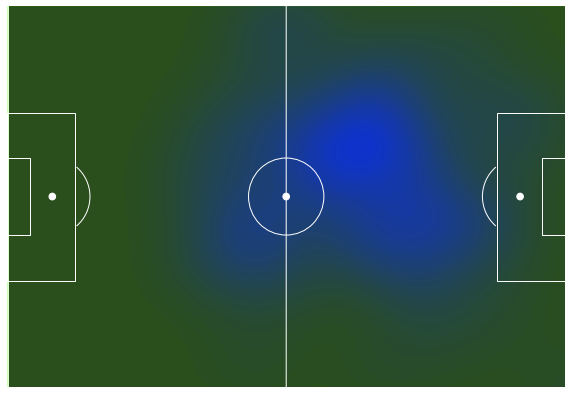

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.kdeplot(x_coord_Mes, y_coord_Mes,  cmap = sns.dark_palette("blue", as_cmap = True),  n_levels= 60, shade=True, cut = 5)
draw_pitch(ax)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.show()
plt.close(fig)

#### The heatmap shows that Messi was active mostly at the center and in central area of the opponent's half of the pitch.

## Mes-aldo






Heatmap of both players. To obtain it, we must reverse the coordinates of one of the players, so that they fall in the right half of the pitch. Ronaldo's coordinates will be reversed.

In [76]:
xRon = [120 - i for i in x_coord_Ron]
yRon = [80 - i for i in y_coord_Ron]

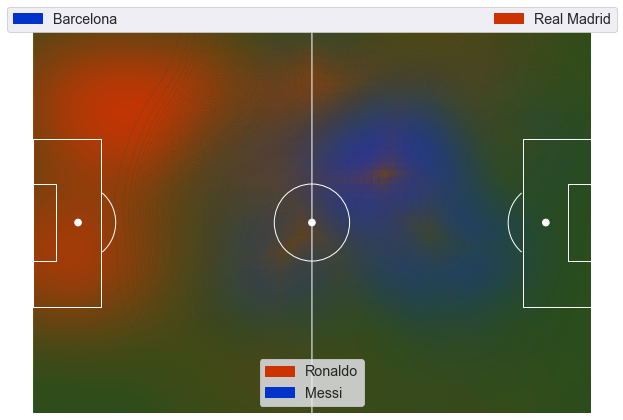

In [77]:

fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.kdeplot(xRon, yRon,  cmap = sns.dark_palette("red", as_cmap = True),  n_levels= 50, shade=True, alpha = 1)
sns.kdeplot(x_coord_Mes, y_coord_Mes,  cmap = sns.dark_palette("blue", as_cmap = True),  n_levels= 800, shade=True, cut = 5, alpha = 0.15)
draw_pitch(ax)
sns.set(font_scale=1.3)
leg1 = plt.legend(handles=[mpatches.Patch(color= (.8,.2,0), label='Ronaldo'), mpatches.Patch(color= (0, .2, .8), label='Messi')], loc = 'lower center')
ax = plt.gca().add_artist(leg1)
plt.legend(handles = [mpatches.Patch(color= (0,.2,.8), label='Barcelona'),mpatches.Patch(color= (.8,.2,0), label='Real Madrid')], loc='upper left',
           ncol=2, mode="expand", borderaxespad=-1.8)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.show()
plt.close(fig)


#### As this map shows, Ronaldo's positions are mostly offensive, and almost equally divided between the right wing and the the front of the net. Messi's positions, on the other hand, are mostly central and cover uniformly the  central zone of the opponent's half of the pitch. 

## Juventus - Napoli

In [78]:
Ita_events = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\events\events_Italy.json")
Ita_events = Ita_events.drop(['eventSec', 'id', 'matchPeriod', 'subEventId', 'subEventName', 'teamId'], axis = 1)

In [79]:
Ita_match = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\matches\matches_Italy.json")

Now we want to visualize passes made by Jorginho and Pjanic during the match Juventus-Napoli through a map of arrows.

In [80]:
Ita_match = Ita_match[Ita_match.label == 'Juventus - Napoli, 0 - 1']

With its wyId we can now retrieve the events related to this match

In [81]:
imatch_Id = Ita_match.wyId.iloc[0]

In [82]:
Juv_Nap = Ita_events[Ita_events.matchId == imatch_Id]

Retrieving playerId's for Jorginho and Pjanic.

In [83]:
players[players.lastName == 'Frello Filho']

birthArea   birthDate  \
1658  {'name': 'Brazil', 'id': '76', 'alpha3code': '...  1991-12-20   

     currentNationalTeamId currentTeamId   firstName   foot  height  \
1658                  3757          3187  Jorge Luiz  right     180   

          lastName middleName  \
1658  Frello Filho              

                                           passportArea  \
1658  {'name': 'Italy', 'id': '380', 'alpha3code': '...   

                                                   role shortName  weight  \
1658  {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...  Jorginho      65   

       wyId  
1658  21315

Problem with the encoding of the database characters didn't make possible to find Pjanic through his last name, so we use his first name Miralem, which is luckily quite uncommon.

In [84]:
players[players.firstName == 'Miralem']

birthArea   birthDate  \
1482  {'name': 'Bosnia-Herzegovina', 'id': '70', 'al...  1990-04-02   

     currentNationalTeamId currentTeamId firstName   foot  height  \
1482                  null          3159   Miralem  right     180   

         lastName middleName  \
1482  Pjani\u0107              

                                           passportArea  \
1482  {'name': 'Luxembourg', 'id': '442', 'alpha3cod...   

                                                   role       shortName  \
1482  {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...  M. Pjani\u0107   

      weight   wyId  
1482      74  20443

In [85]:
Pja = players[players.firstName == 'Miralem'].wyId.iloc[0]

In [86]:
Jor = players[players.lastName == 'Frello Filho'].wyId.iloc[0]

## Jorginho

In [87]:
Jor_ev = Juv_Nap[Juv_Nap.playerId == Jor]
Jor_passes = Jor_ev[Jor_ev.eventName == 'Pass']
Jor_pas = Jor_passes.positions
Jor_pas = pd.DataFrame({'location' : [i[0] for i in Jor_pas], 'pass_end_location' : [i[1] for i in Jor_pas]})
Jor_pas.head()

location   pass_end_location
0  {'y': 75, 'x': 47}  {'y': 71, 'x': 62}
1  {'y': 44, 'x': 71}  {'y': 42, 'x': 69}
2  {'y': 72, 'x': 47}  {'y': 96, 'x': 61}
3  {'y': 28, 'x': 57}  {'y': 33, 'x': 77}
4  {'y': 25, 'x': 61}  {'y': 13, 'x': 74}

In [88]:
def draw_pitch1(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = True, color = (0.3, 1, 0, .7))
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False, color = 'white')
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False, color = 'white')
    midline = ConnectionPatch([60,0], [60,80], "data", "data",  color = 'white')

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False, color = 'white')
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False, color = 'white')



    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="white", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="white")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="white")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="white")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="white")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="white")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

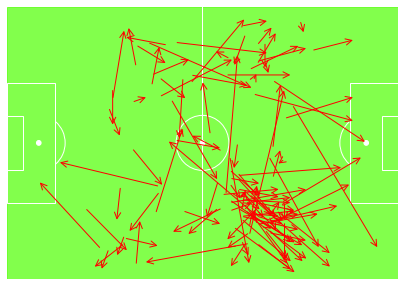

In [89]:
fig=plt.figure() 
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch1(ax)
for i in range(len(Jor_pas)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Jor_pas.iloc[i]['pass_end_location']['x']*120/100, Jor_pas.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Jor_pas.iloc[i]['location']['x']*120/100, Jor_pas.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.show()
ax.clear()
plt.close(fig)


### Jorginho's completed passes

In [90]:
Jor_complete = []
for i in range(len(Jor_passes)):
    if {'id': 1801} in Jor_passes.tags.iloc[i]:
        Jor_complete.append(Jor_passes.iloc[i])

In [91]:
Jor_complete = pd.DataFrame(Jor_complete)
Jor_cpos = pd.DataFrame({'location' : [i[0] for i in Jor_complete.positions], 'pass_end_location' : [i[1] for i in Jor_complete.positions]})

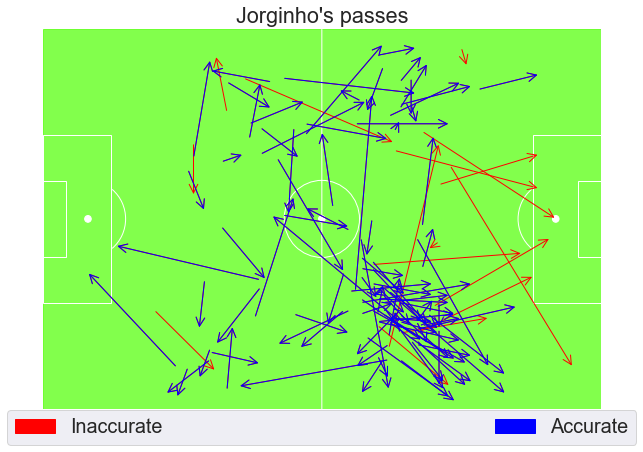

In [92]:
fig=plt.figure() 
fig.set_size_inches(10, 7)
ax=fig.add_subplot(1,1,1)
sns.set(font_scale=1.8)
draw_pitch1(ax)
for i in range(len(Jor_pas)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Jor_pas.iloc[i]['pass_end_location']['x']*120/100, Jor_pas.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Jor_pas.iloc[i]['location']['x']*120/100, Jor_pas.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))
for i in range(len(Jor_cpos)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Jor_cpos.iloc[i]['pass_end_location']['x']*120/100, Jor_cpos.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Jor_cpos.iloc[i]['location']['x']*120/100, Jor_cpos.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
plt.title("Jorginho's passes")
plt.legend(handles = [mpatches.Patch(color= "red", label='Inaccurate'),mpatches.Patch(color= "blue", label='Accurate')], loc='lower left',
           ncol=2, mode="expand", borderaxespad=-1.8)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.show()
ax.clear()
plt.close(fig)


As this graph shows, Jorginho had a good percentage of completed passes over his total passes. It also appears that his passes were mostly succesful on the wings and in short passes, but quite unsuccesful towards the opponent's goal and in longer passes.

## Pjanic

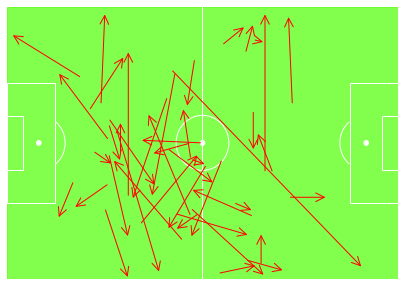

In [93]:
Pja_ev = Juv_Nap[Juv_Nap.playerId == Pja]
Pja_passes = Pja_ev[Pja_ev.eventName == 'Pass']
Pja_pas = Pja_passes.positions
Pja_pas = pd.DataFrame({'location' : [i[0] for i in Pja_pas], 'pass_end_location' : [i[1] for i in Pja_pas]})

fig=plt.figure() 
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch1(ax)
for i in range(len(Pja_pas)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Pja_pas.iloc[i]['pass_end_location']['x']*120/100, Pja_pas.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Pja_pas.iloc[i]['location']['x']*120/100, Pja_pas.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))

plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.show()
ax.clear()
plt.close(fig)


The map of Pjanic's passes looks less dense than Jorginho's. As a matter of fact, Pjanic has carried out less than half of Jorginho's passes.

In [94]:
print("Jorginho's passes : {}".format(len(Jor_passes)), "\nPjanic's passes : {}".format(len(Pja_passes)))

Jorginho's passes : 114 
Pjanic's passes : 44


### Pjanic's completed passes

In [95]:
Pja_complete = []
for i in range(len(Pja_passes)):
    if {'id': 1801} in Pja_passes.tags.iloc[i]:
        Pja_complete.append(Pja_passes.iloc[i])

In [96]:
Pja_complete = pd.DataFrame(Pja_complete)
Pja_cpos = pd.DataFrame({'location' : [i[0] for i in Pja_complete.positions], 'pass_end_location' : [i[1] for i in Pja_complete.positions]})

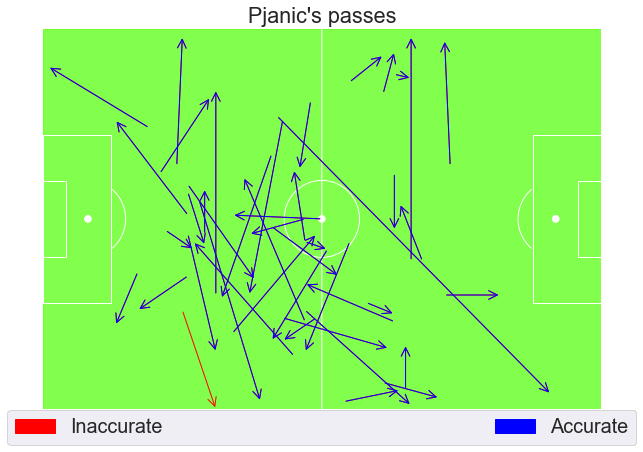

In [97]:
fig=plt.figure() 
fig.set_size_inches(10, 7)
ax=fig.add_subplot(1,1,1)
draw_pitch1(ax)
sns.set(font_scale=1.8)
for i in range(len(Pja_pas)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Pja_pas.iloc[i]['pass_end_location']['x']*120/100, Pja_pas.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Pja_pas.iloc[i]['location']['x']*120/100, Pja_pas.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))

for i in range(len(Pja_cpos)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Pja_cpos.iloc[i]['pass_end_location']['x']*120/100, Pja_cpos.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Pja_cpos.iloc[i]['location']['x']*120/100, Pja_cpos.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.title("Pjanic's passes")
plt.legend(handles = [mpatches.Patch(color= "red", label='Inaccurate'),mpatches.Patch(color= "blue", label='Accurate')], loc='lower left',
           ncol=2, mode="expand", borderaxespad=-1.8)
plt.show()
ax.clear()
plt.close(fig)


### Now a comparison between Pjanic and Jorginho

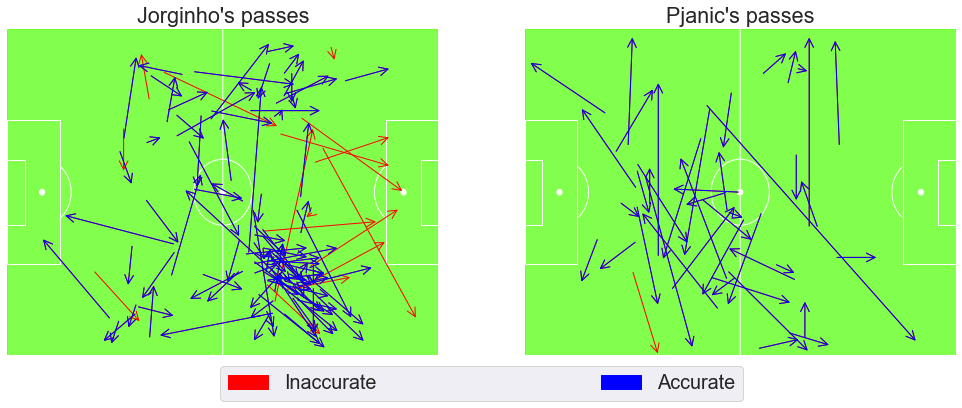

In [98]:
fig=plt.figure() 
fig.set_size_inches(17, 6)
ax=fig.add_subplot(1,2,1)
draw_pitch1(ax)
sns.set(font_scale=1.8)

plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
for i in range(len(Jor_pas)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Jor_pas.iloc[i]['pass_end_location']['x']*120/100, Jor_pas.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Jor_pas.iloc[i]['location']['x']*120/100, Jor_pas.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))
for i in range(len(Jor_cpos)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Jor_cpos.iloc[i]['pass_end_location']['x']*120/100, Jor_cpos.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Jor_cpos.iloc[i]['location']['x']*120/100, Jor_cpos.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
plt.title("Jorginho's passes")
plt.legend(handles = [mpatches.Patch(color= "red", label='Inaccurate'),mpatches.Patch(color= "blue", label='Accurate')], loc='lower center',
           ncol=2, mode = 'expand', borderaxespad=-2.3, bbox_to_anchor=(0.6, 0, 1, 1))

ax1=fig.add_subplot(1,2,2)

for i in range(len(Pja_pas)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax1.annotate("", xy = (Pja_pas.iloc[i]['pass_end_location']['x']*120/100, Pja_pas.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Pja_pas.iloc[i]['location']['x']*120/100, Pja_pas.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))

for i in range(len(Pja_cpos)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax1.annotate("", xy = (Pja_cpos.iloc[i]['pass_end_location']['x']*120/100, Pja_cpos.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Pja_cpos.iloc[i]['location']['x']*120/100, Pja_cpos.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
draw_pitch1(ax1)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.title("Pjanic's passes")
plt.show()
ax.clear()
ax1.clear()
plt.close(fig)


### Although sparser and not localized to a specific area of the pitch, Pjanic had a completion rate of almost 100% for his passes, having carried out only one inaccurate pass during the match. It also appears that Pjanic carried out mostly long passes through the central area of the pitch, often aiming backwards, while Jorginho carried out mostly short passes in the advanced area of the pitch, often aiming onwards. 